# Análisis exploratorio de datos

## Importacion de Librerias

In [1]:
import time
tiempo_inicio = time.time()

In [3]:
import pandas as pd
import os
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from datetime import datetime, timedelta
import calendar

## Juntamos los archivos csv para construir un solo dataframe

In [8]:
relative_path  = "../data/beijing+multi+site+air+quality+data/PRSA_Data_20130301-20170228"

In [9]:
archivos_csv = [archivo for archivo in os.listdir(relative_path) if archivo.endswith('.csv')]
dataframes = []

In [10]:
# Leer cada archivo CSV y almacenarlo en la lista de dataframes
for archivo_csv in archivos_csv:
    ruta_archivo = os.path.join(relative_path, archivo_csv)
    dataframe = pd.read_csv(ruta_archivo)
    dataframes.append(dataframe)

In [11]:
df = pd.concat(dataframes)

In [12]:
df.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin

### Calculaos el AQI

In [ ]:
def calculate_aqi(row):
    pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
    max_value = row[pollutants].max()
    
    if max_value <= 50:
        return 'Excelent'
    elif max_value <= 100:
        return 'Good'
    elif max_value <= 150:
        return 'Slightly Polluted'
    elif max_value <= 200:
        return 'Lightly Polluted'
    elif max_value <= 250:
        return 'Moderately Polluted'
    elif max_value <= 300:
        return 'Heavily Polluted'
    else:
        return 'Severely Polluted'
    
df['AQI'] = df.apply(calculate_aqi, axis=1)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
print(f'No Entradas: {df.shape[0]}, No Columnas: {df.shape[1]}')

In [ ]:
df.isnull().sum()

In [ ]:
print('Porcentaje de Nulos\n',round(df.isnull().sum()/len(df.index), 2)*100)

In [16]:
df['wd'].unique()

array(['NNW', 'N', 'NW', 'NNE', 'ENE', 'E', 'NE', 'W', 'SSW', 'WSW', 'SE',
       'WNW', 'SSE', 'ESE', 'S', 'SW', nan], dtype=object)

In [17]:
df['station'].unique()

array(['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan',
       'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan',
       'Wanliu', 'Wanshouxigong'], dtype=object)

In [18]:
df['AQI'].unique()

array(['Heavily Polluted', 'Severely Polluted', 'Good',
       'Moderately Polluted', 'Slightly Polluted', 'Excelent',
       'Lightly Polluted'], dtype=object)

In [19]:
columnas_a_excluir = ['wd', 'station','AQI']
df1 = df
df = df.drop(columnas_a_excluir, axis=1)


In [20]:
sesgo = df.mean() - df.median()
print("Segos Positivos y Negavitos\n",sesgo)

Segos Positivos y Negavitos
 No         0.000000
year      -0.337440
month     -0.477070
day       -0.270363
hour       0.000000
PM2.5     24.793428
PM10      22.602618
SO2        8.830835
NO2        7.638586
CO       330.766454
O3        12.372271
TEMP      -0.961024
PRES       0.346982
DEWP      -0.609178
RAIN       0.064476
WSPM       0.329711
dtype: float64


In [21]:
moda = df.mode().iloc[0]
media = df.mean()
mediana = df.median()

## Distribucion

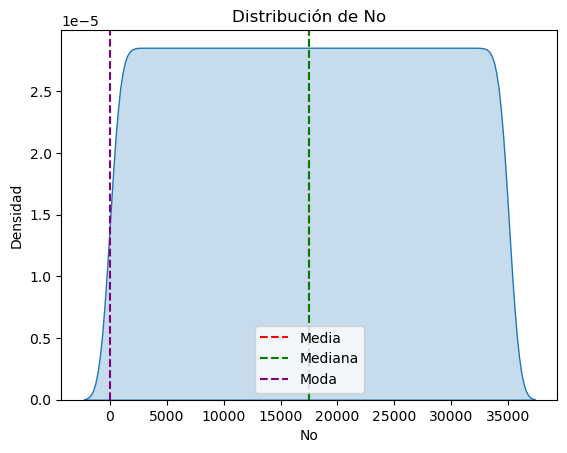

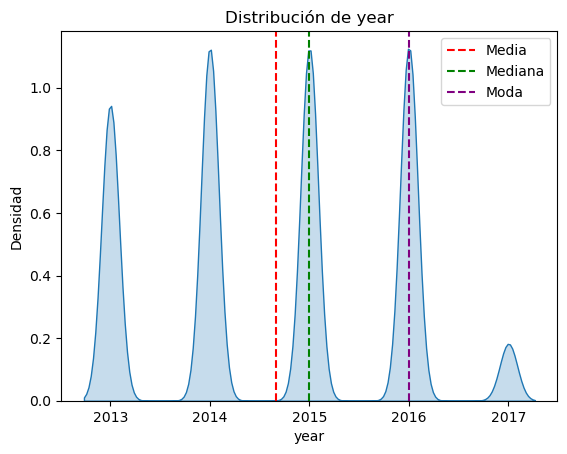

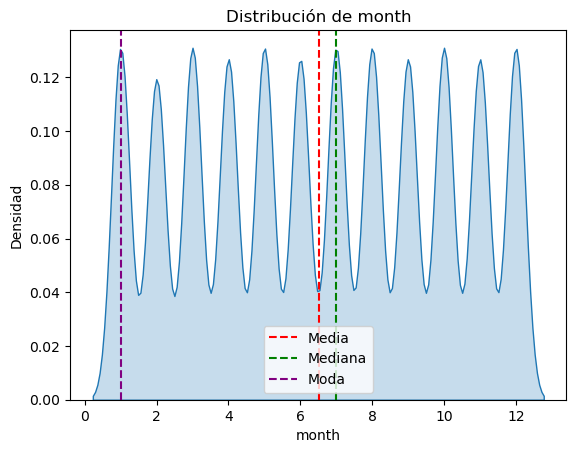

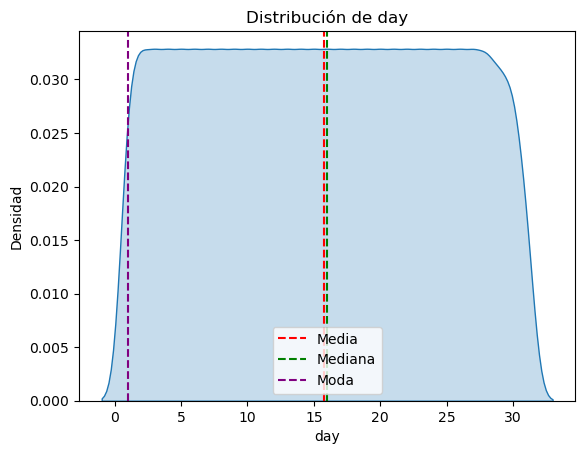

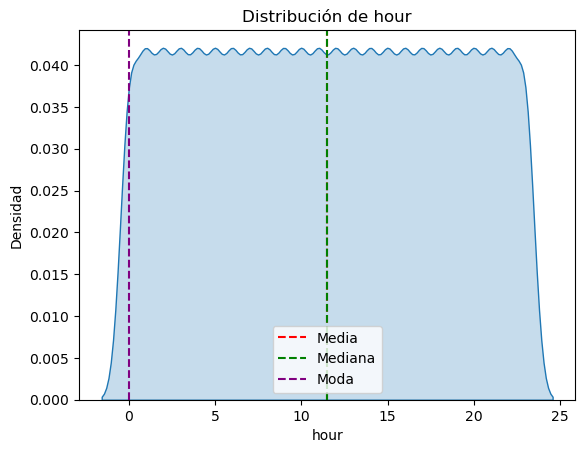

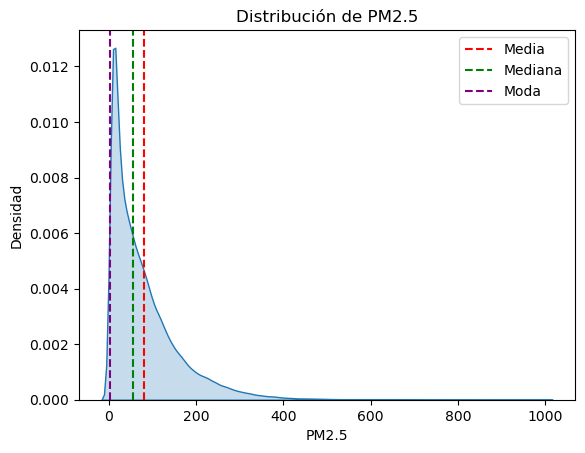

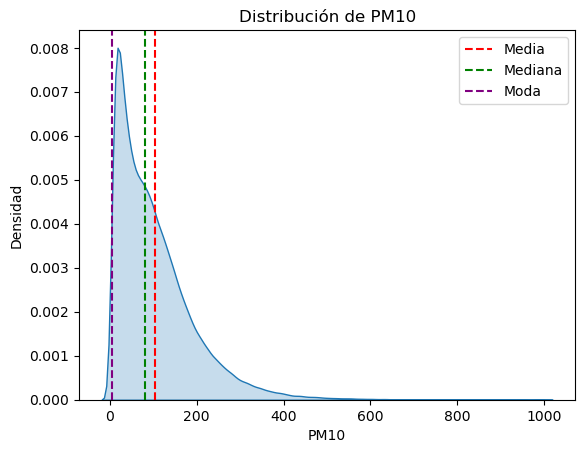

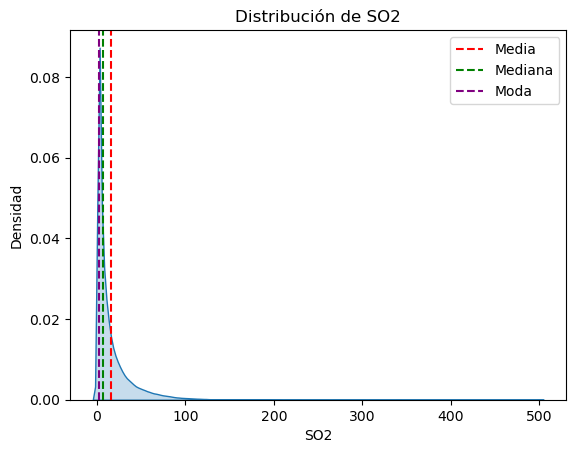

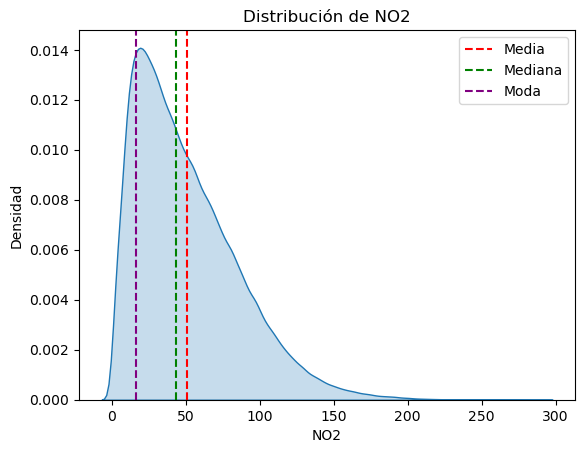

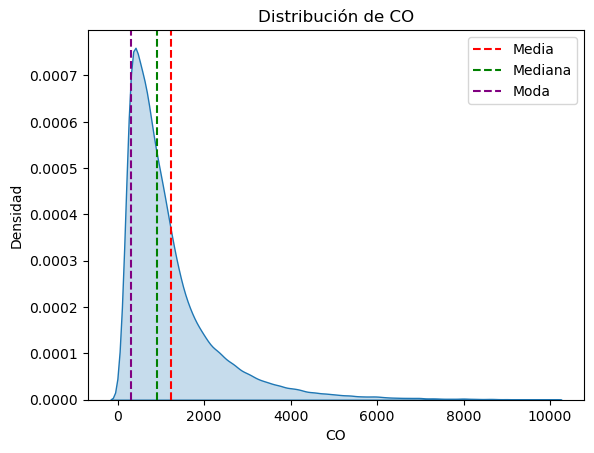

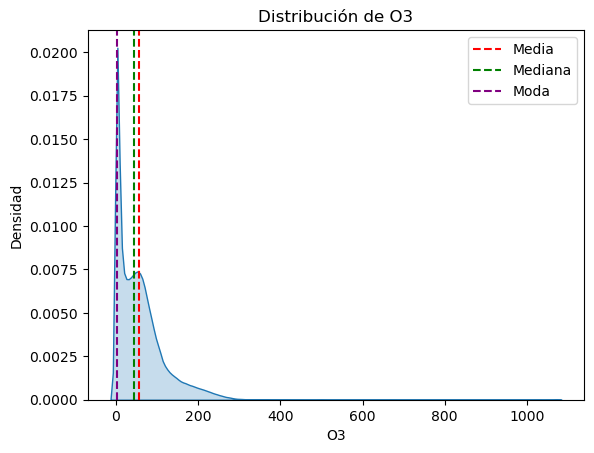

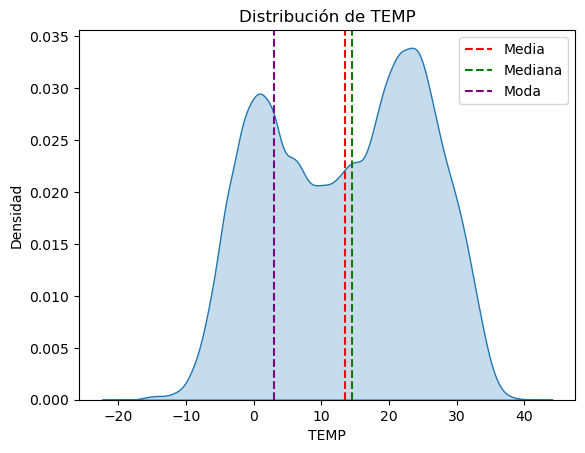

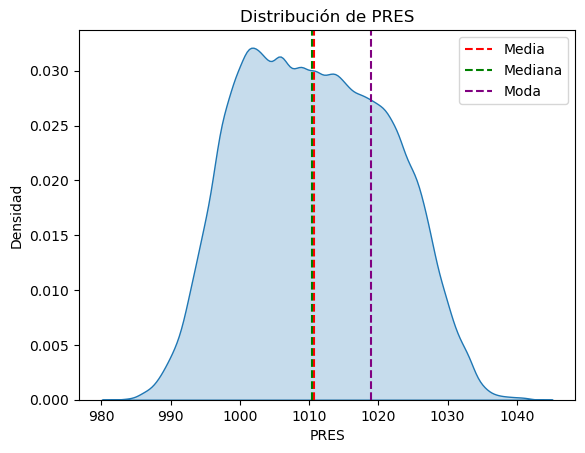

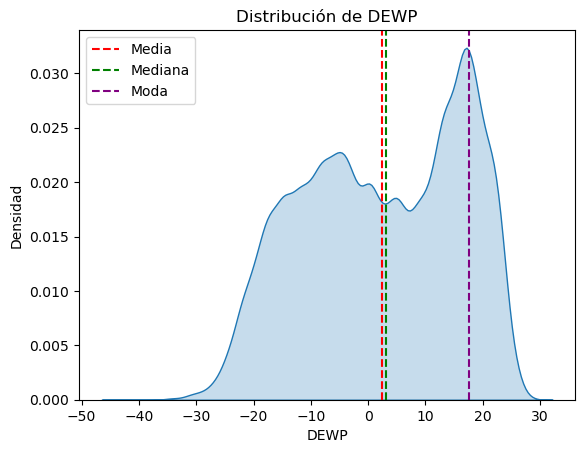

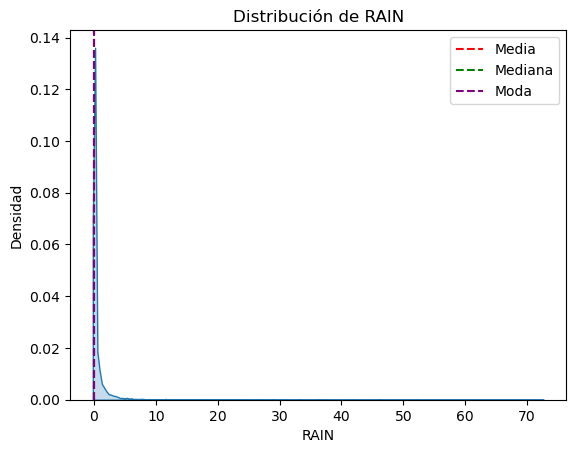

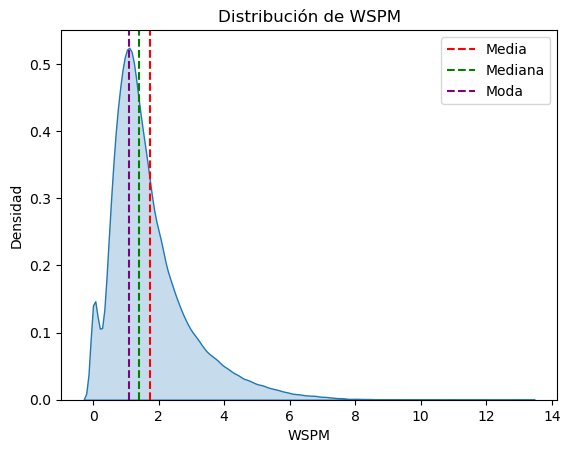

In [22]:
for columna in df.columns:
    plt.figure()
    sns.kdeplot(df[columna], fill=True)
    plt.axvline(x=media[columna], color='red', linestyle='--', label='Media')
    plt.axvline(x=mediana[columna], color='green', linestyle='--', label='Mediana')
    plt.axvline(x=moda[columna], color='purple', linestyle='--', label='Moda')
    plt.xlabel(columna)
    plt.ylabel('Densidad')
    plt.title(f'Distribución de {columna}')
    plt.legend()
    plt.show()

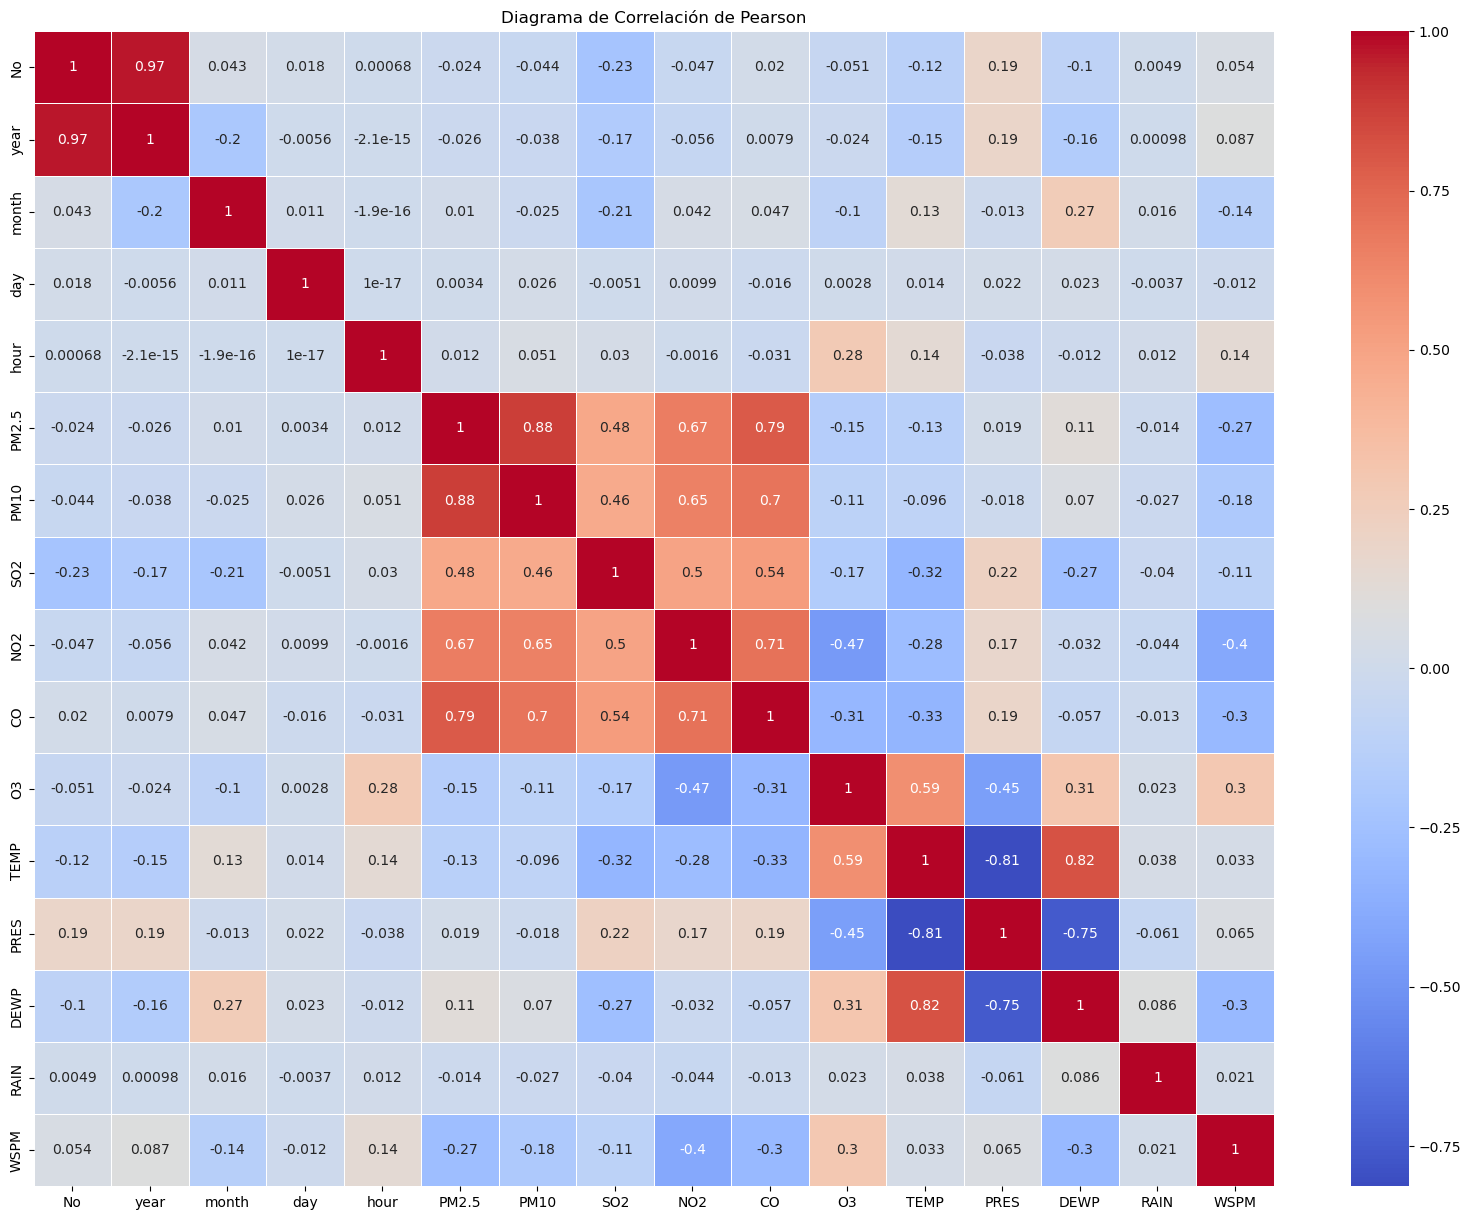

In [23]:
# Calcular la matriz de correlación de Pearson
correlation_matrix = df.corr(method='pearson')

# Crear un mapa de calor
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Diagrama de Correlación de Pearson')
plt.show()

In [24]:
print(correlation_matrix)

             No          year         month           day          hour  \
No     1.000000  9.695331e-01  4.318051e-02  1.776442e-02  6.838683e-04   
year   0.969533  1.000000e+00 -2.020099e-01 -5.569082e-03 -2.115260e-15   
month  0.043181 -2.020099e-01  1.000000e+00  1.052232e-02 -1.905981e-16   
day    0.017764 -5.569082e-03  1.052232e-02  1.000000e+00  1.013388e-17   
hour   0.000684 -2.115260e-15 -1.905981e-16  1.013388e-17  1.000000e+00   
PM2.5 -0.023569 -2.583578e-02  1.043824e-02  3.428114e-03  1.170939e-02   
PM10  -0.044217 -3.772263e-02 -2.537989e-02  2.601467e-02  5.142637e-02   
SO2   -0.226739 -1.702462e-01 -2.138978e-01 -5.145818e-03  2.994683e-02   
NO2   -0.046553 -5.627017e-02  4.229308e-02  9.877839e-03 -1.558836e-03   
CO     0.019660  7.861472e-03  4.664755e-02 -1.569193e-02 -3.135823e-02   
O3    -0.050868 -2.438435e-02 -1.036914e-01  2.829179e-03  2.822873e-01   
TEMP  -0.122409 -1.517906e-01  1.313233e-01  1.439033e-02  1.419834e-01   
PRES   0.188280  1.866617

In [25]:
df = df1

In [26]:
df['PM2.5'].describe()

count    412029.000000
mean         79.793428
std          80.822391
min           2.000000
25%          20.000000
50%          55.000000
75%         111.000000
max         999.000000
Name: PM2.5, dtype: float64

In [27]:
df['PM2.5'].fillna(df['PM2.5'].median(), inplace=True)

C:\Users\JalipEmpire\AppData\Local\Temp\ipykernel_73160\3014581552.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PM2.5'].fillna(df['PM2.5'].median(), inplace=True)


In [28]:
print('Porcentaje de Nulos\n',round(df.isnull().sum()/len(df.index), 2)*100)

Porcentaje de Nulos
 No         0.0
year       0.0
month      0.0
day        0.0
hour       0.0
PM2.5      0.0
PM10       2.0
SO2        2.0
NO2        3.0
CO         5.0
O3         3.0
TEMP       0.0
PRES       0.0
DEWP       0.0
RAIN       0.0
wd         0.0
WSPM       0.0
station    0.0
AQI        0.0
dtype: float64


### Sustitución de nulos 

In [ ]:
df['PM10'].fillna(df['PM10'].median(), inplace=True)
df['SO2'].fillna(df['SO2'].median(), inplace=True)
df['NO2'].fillna(df['NO2'].median(), inplace=True)
df['CO'].fillna(df['CO'].median(), inplace=True)
df['O3'].fillna(df['O3'].median(), inplace=True)

In [ ]:
print('Porcentaje de Nulos\n',round(df.isnull().sum()/len(df.index), 2)*100)

In [ ]:
df.info()

## Analisis de todos los años

In [ ]:
columns_all = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'gray', 'brown']

In [ ]:
for i, colum in enumerate(columns_all):
    df_aux = df[[colum,'year']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
    f,ax=plt.subplots(figsize=(15,5))
    sns.pointplot(x='year', y=str(colum), data=df_aux, markers='o', color=colors[i % len(colors)])

In [ ]:
df.info()

## Analisis por Mes

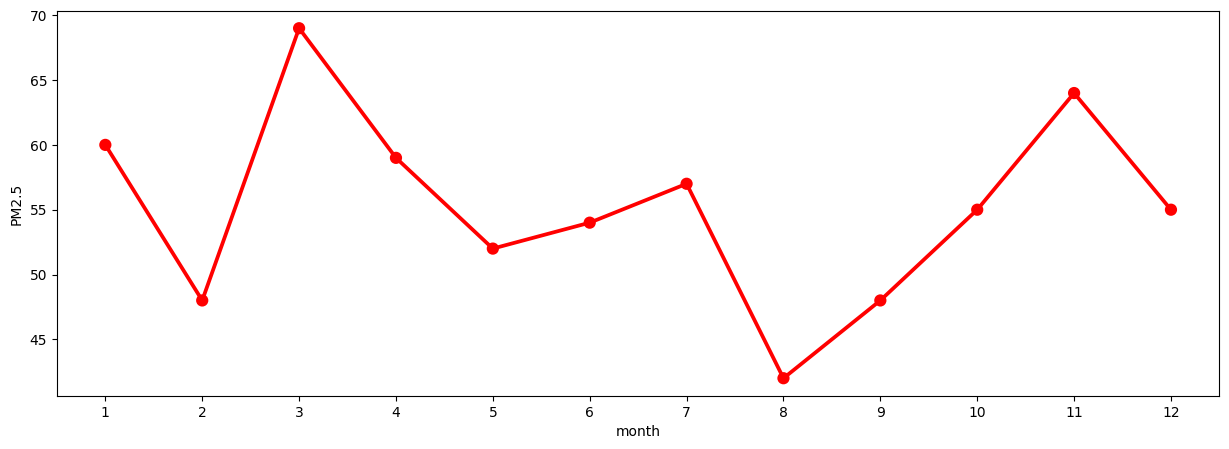

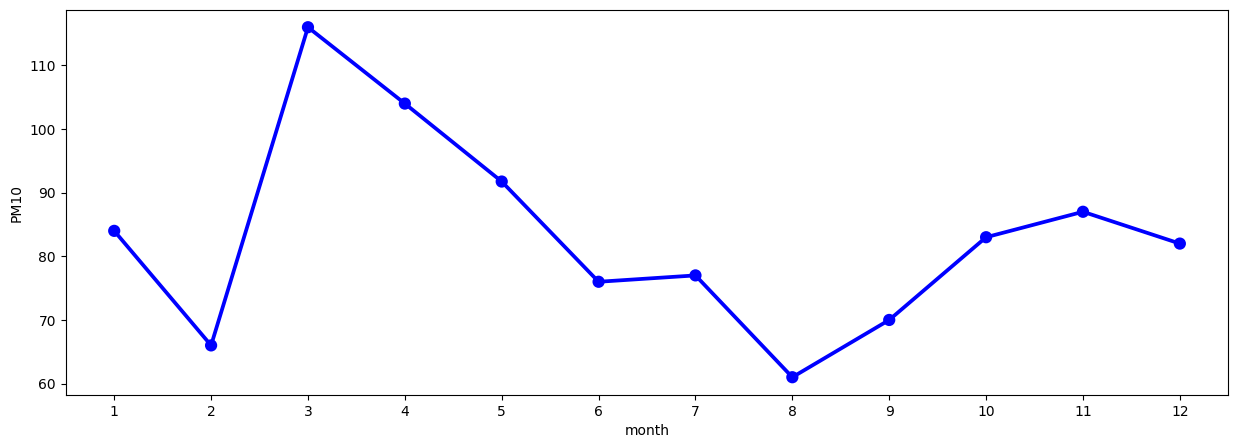

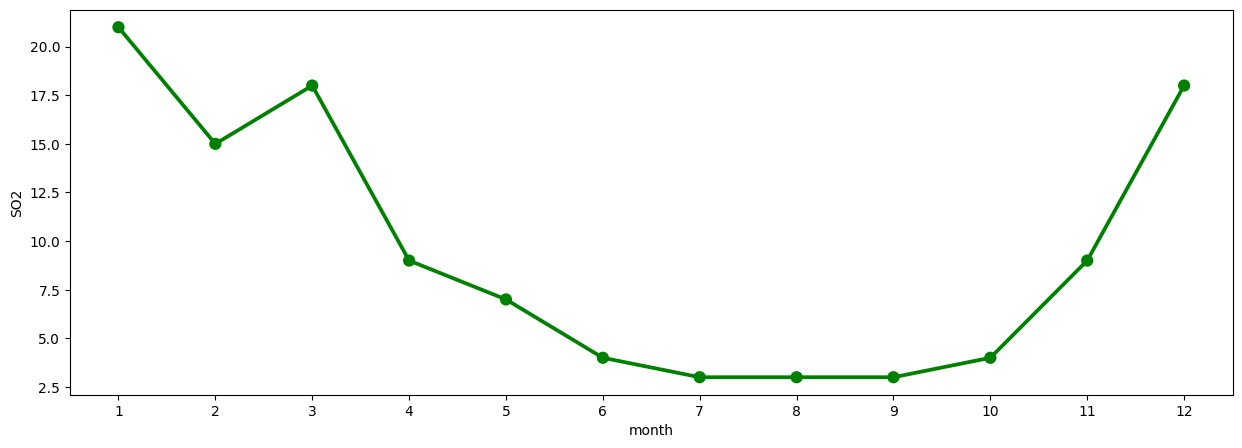

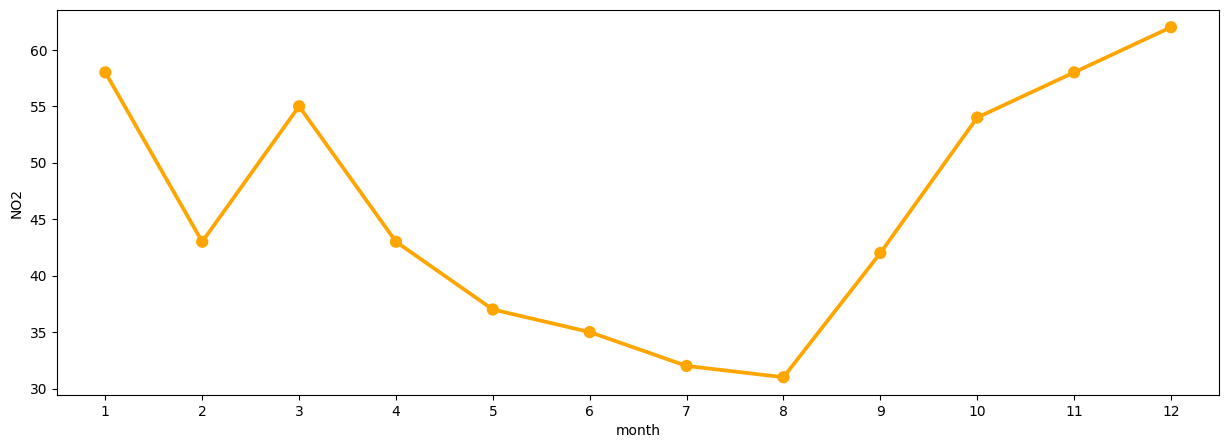

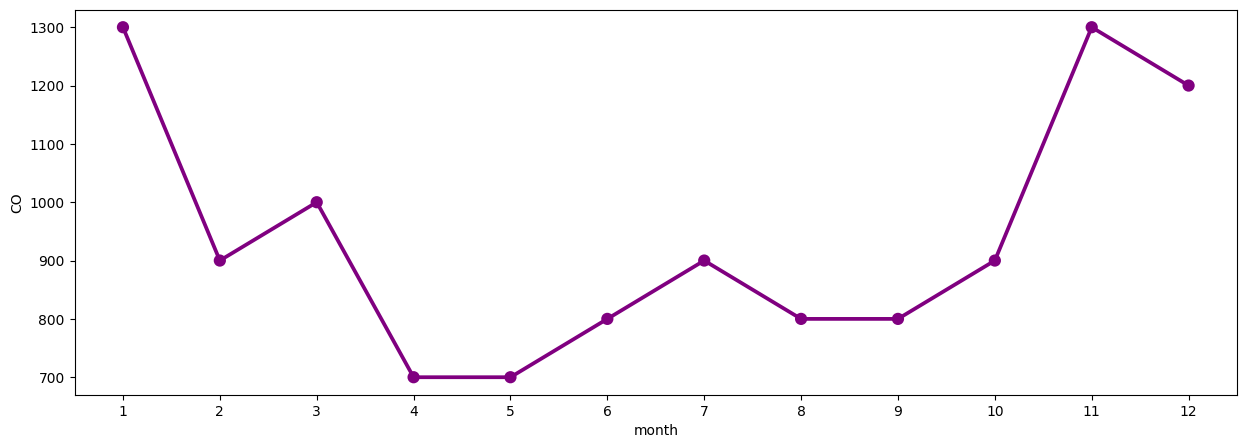

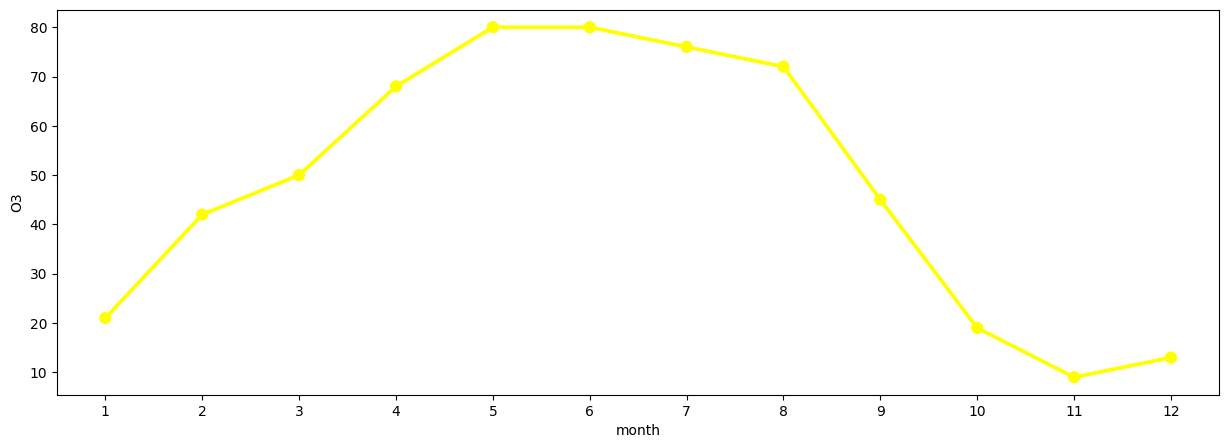

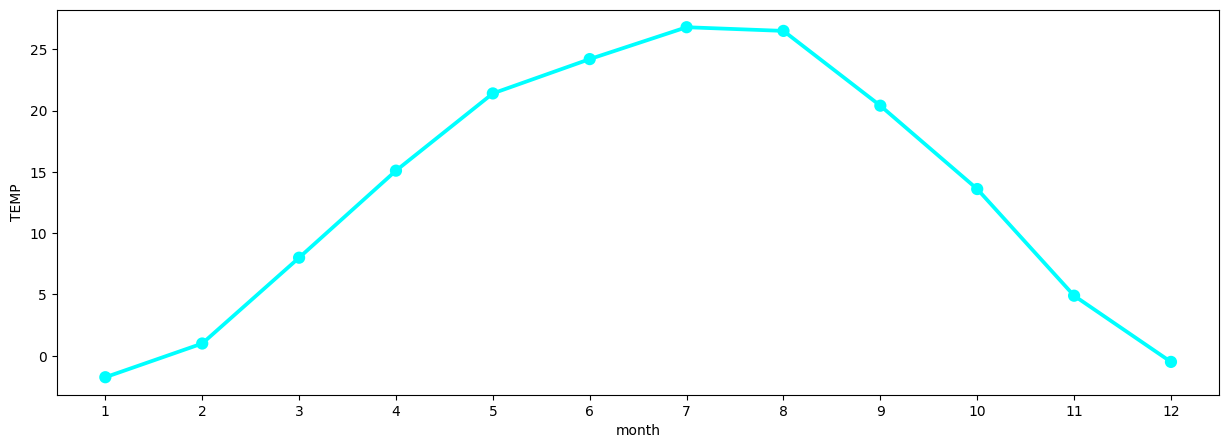

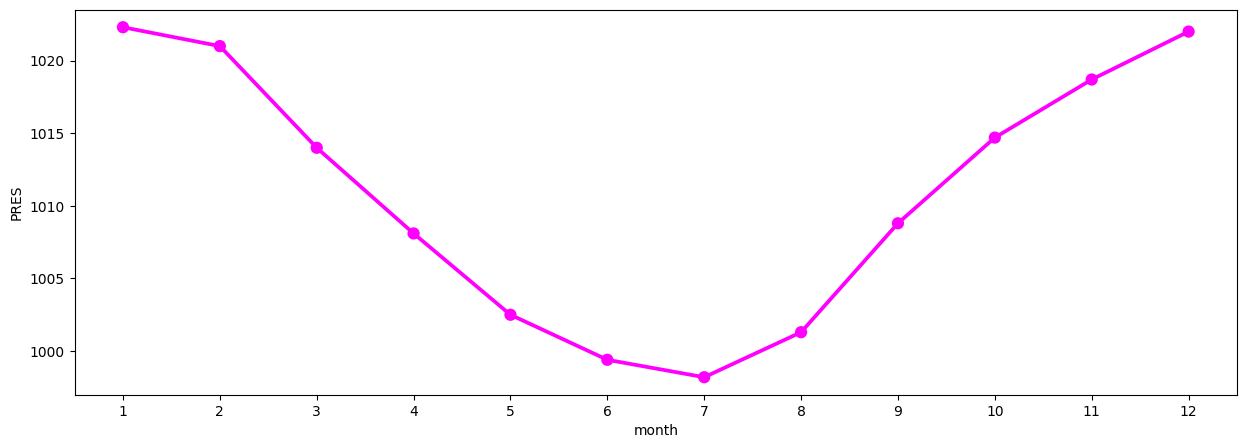

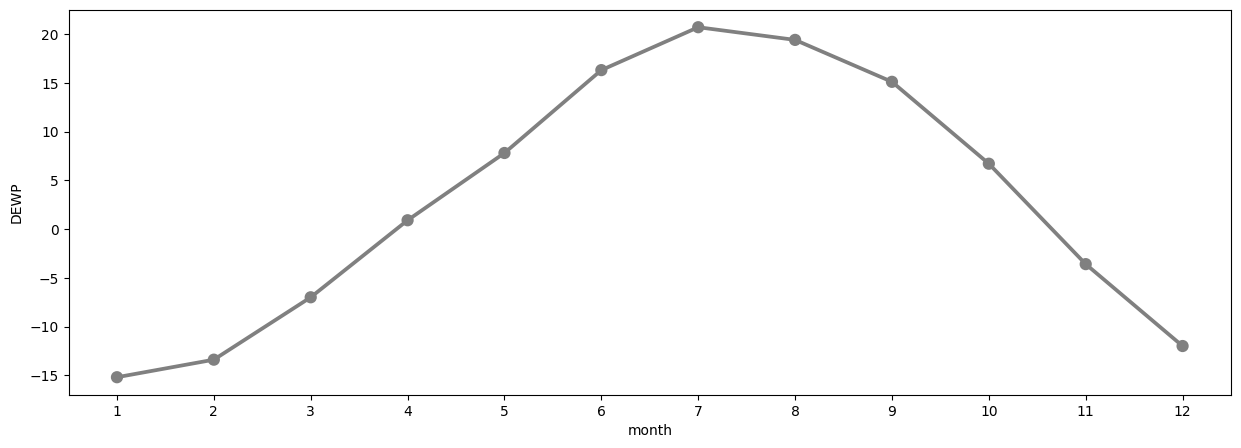

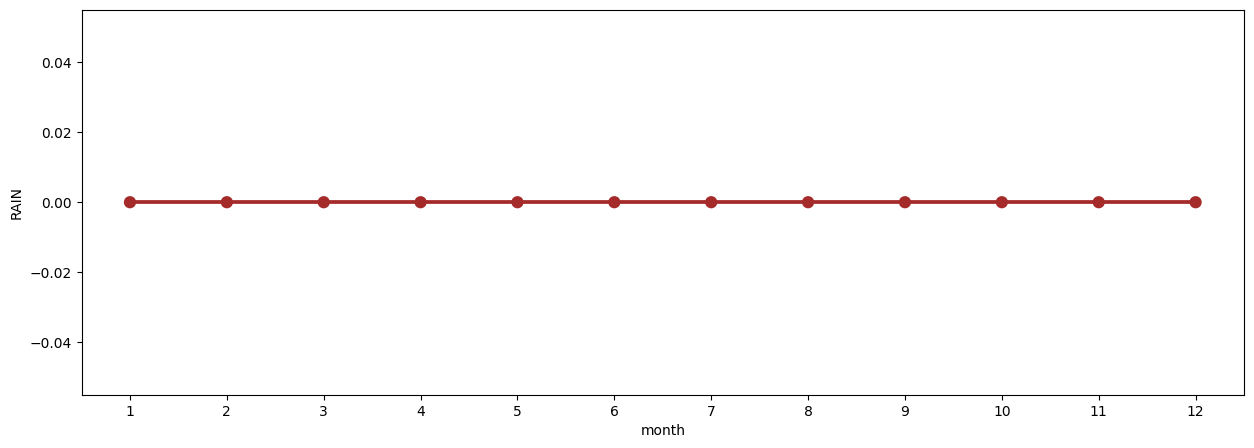

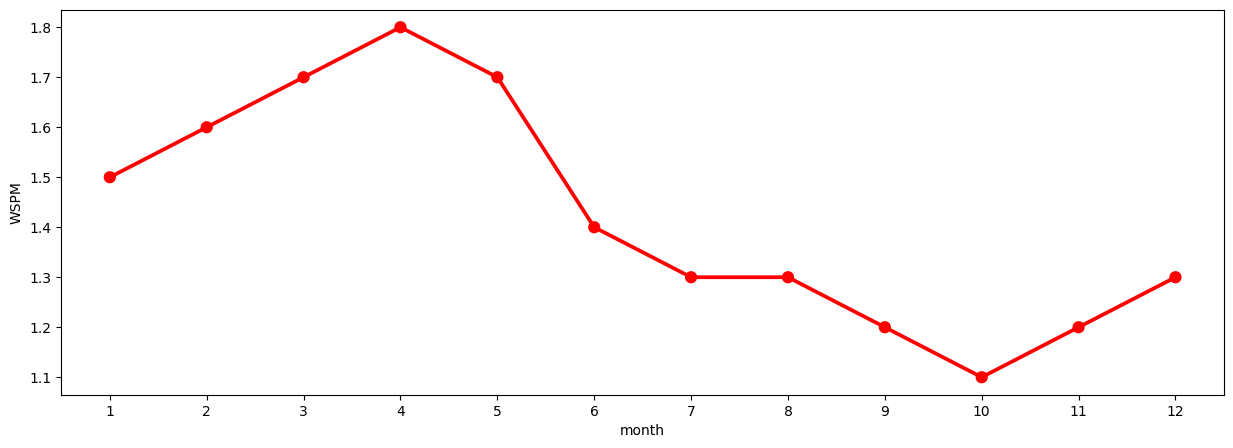

In [141]:
for i, colum in enumerate(columns_all):
    df_aux = df[[colum,'month']].groupby(["month"]).median().reset_index().sort_values(by='month',ascending=False)
    f,ax=plt.subplots(figsize=(15,5))
    sns.pointplot(x='month', y=str(colum), data=df_aux, markers='o', color=colors[i % len(colors)])

## Analisis por Hora

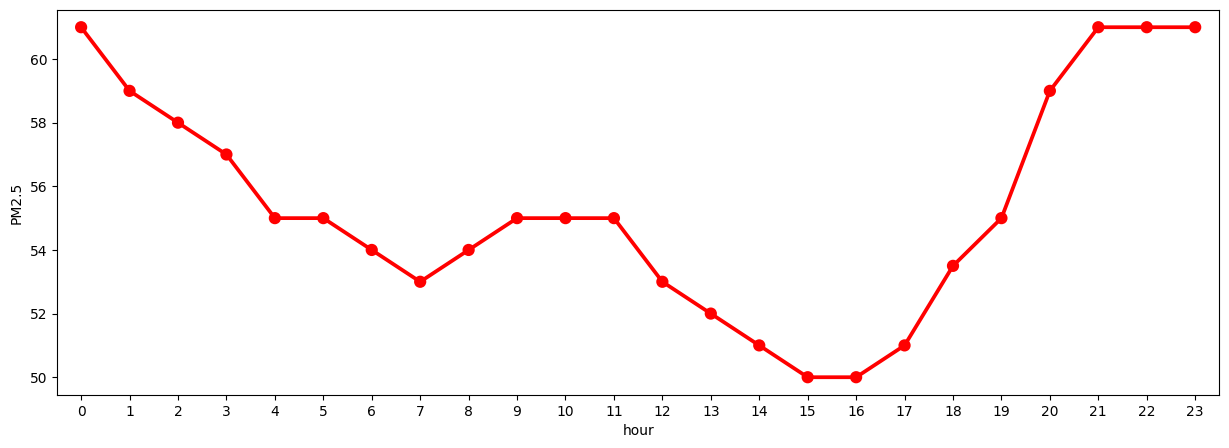

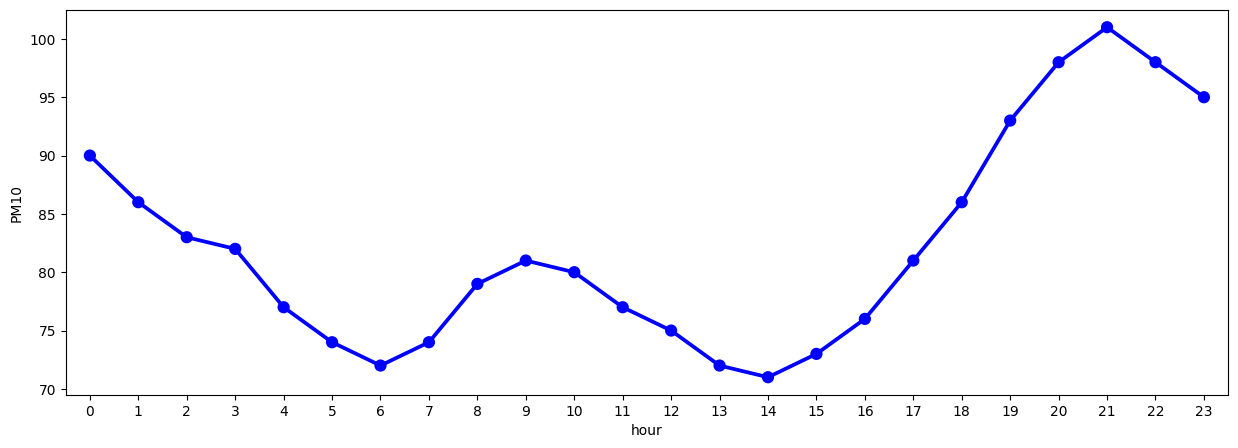

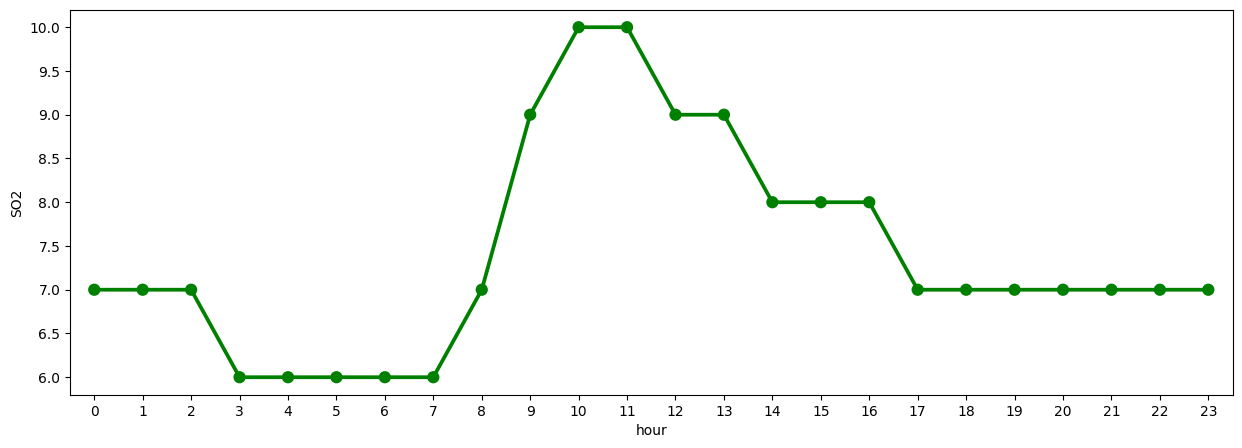

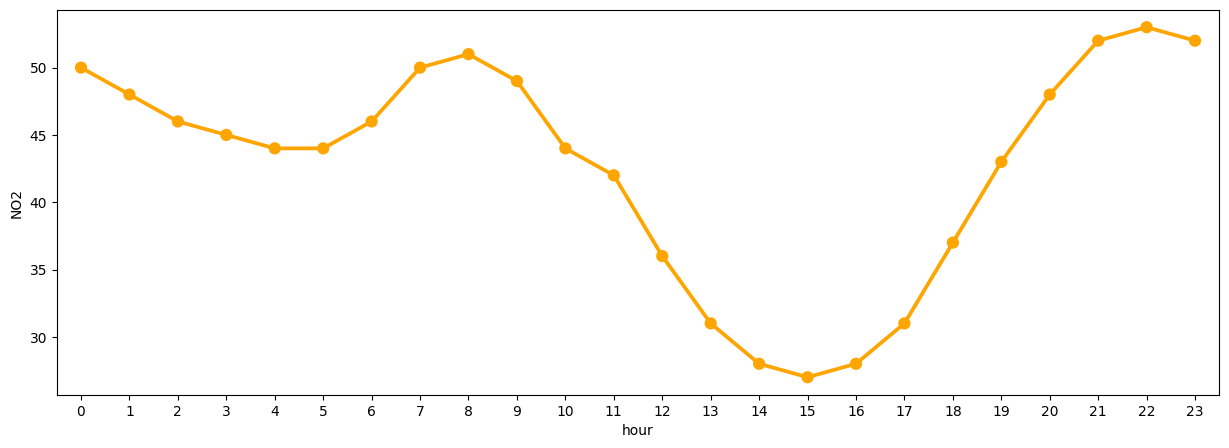

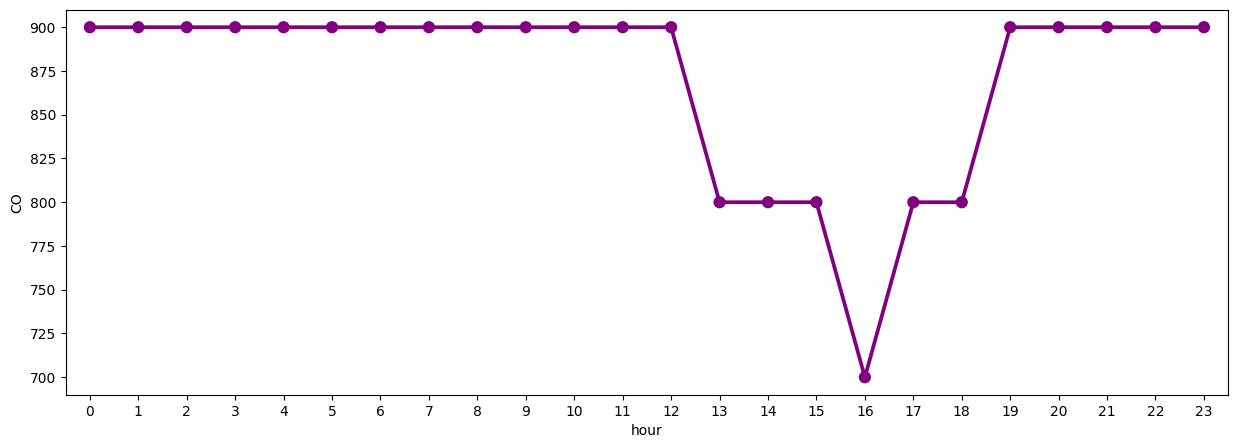

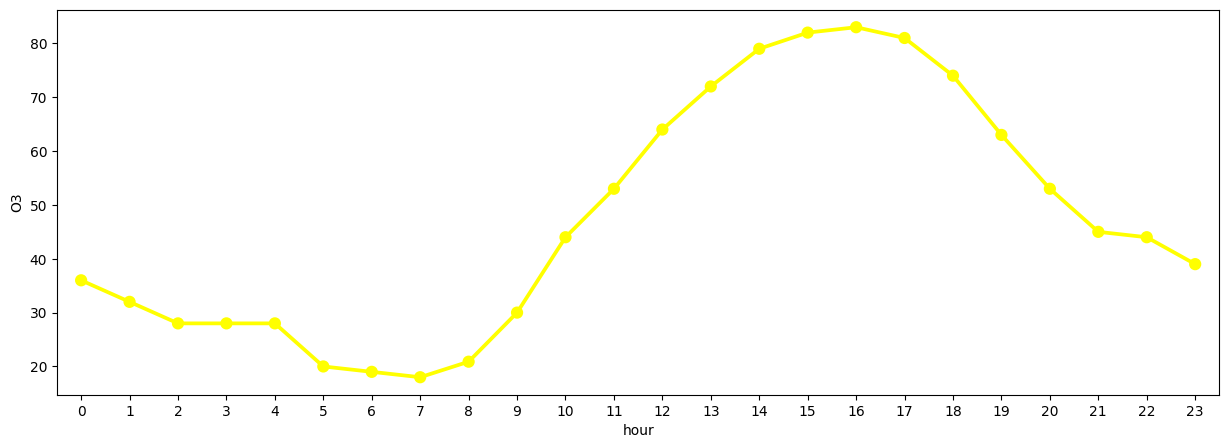

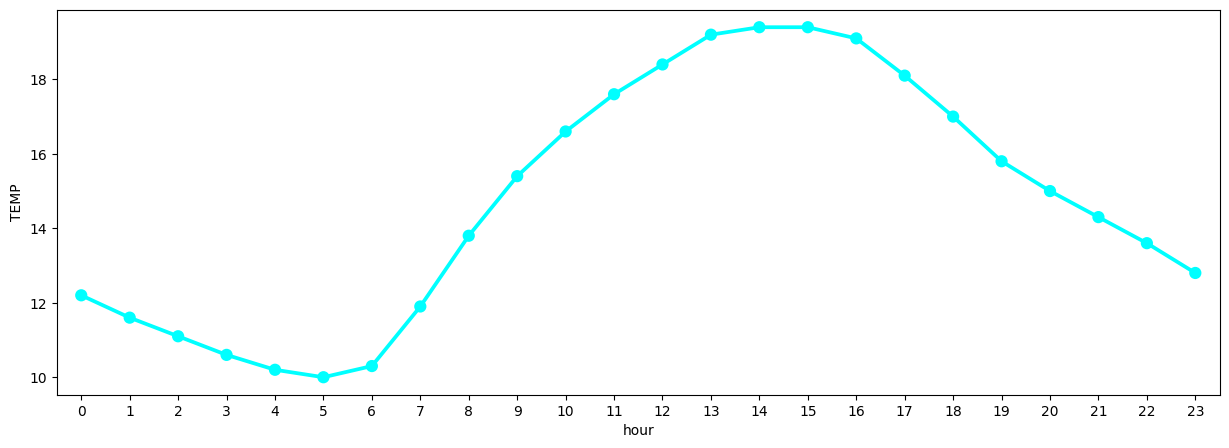

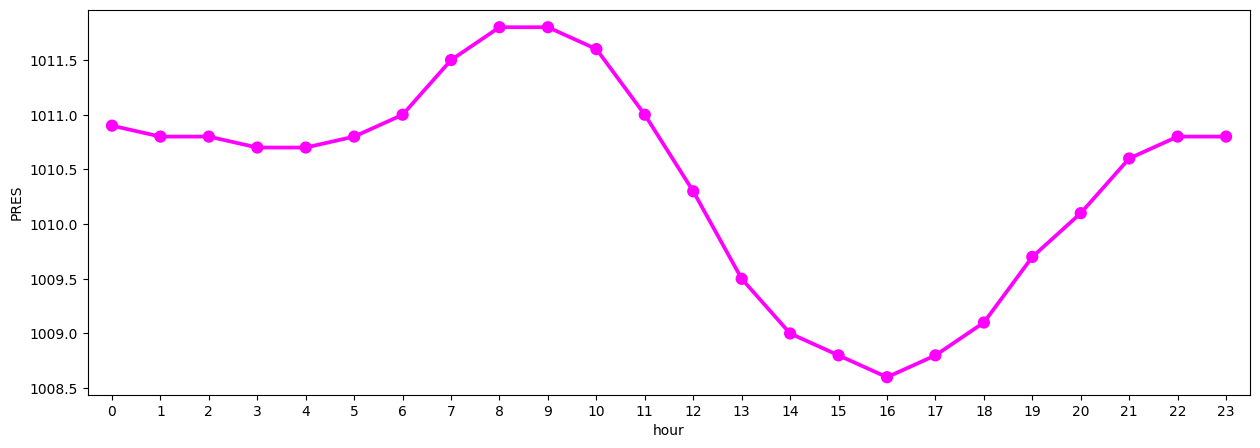

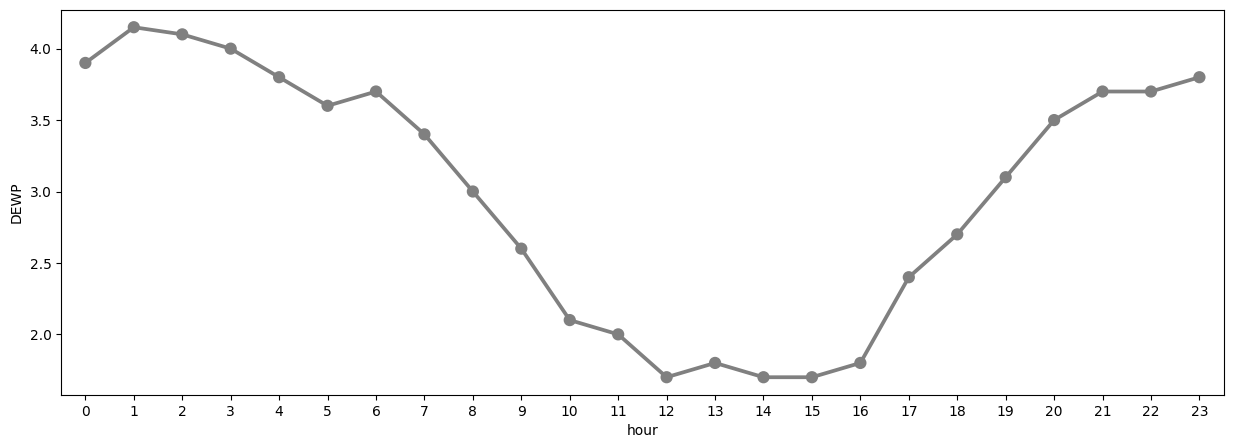

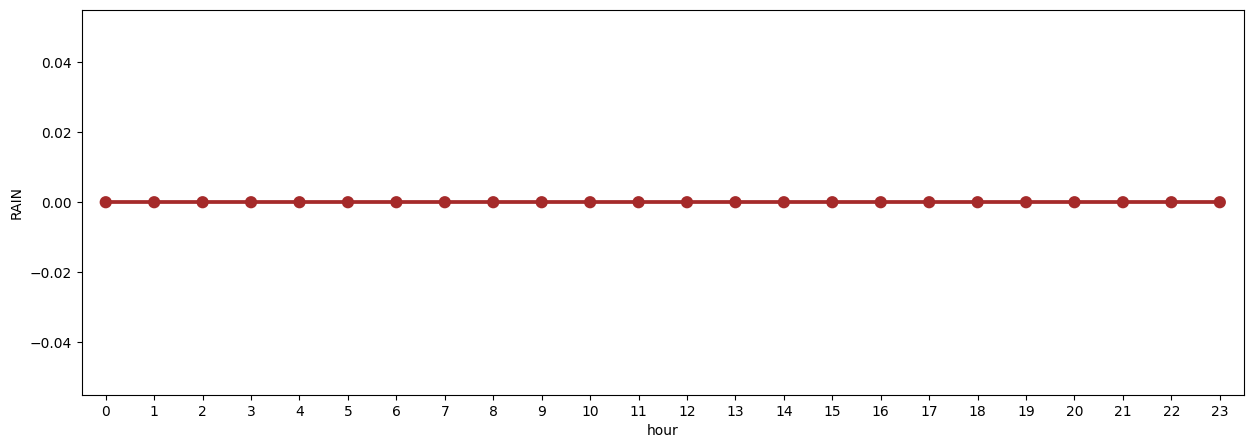

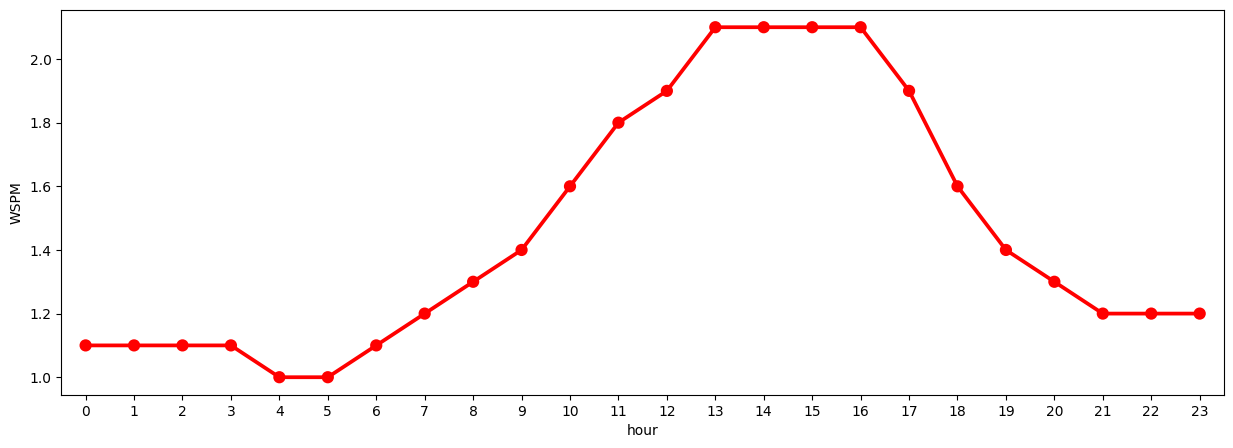

In [142]:
for i, colum in enumerate(columns_all):
    df_aux = df[[colum,'hour']].groupby(["hour"]).median().reset_index().sort_values(by='hour',ascending=False)
    f,ax=plt.subplots(figsize=(15,5))
    sns.pointplot(x='hour', y=str(colum), data=df_aux, markers='o', color=colors[i % len(colors)])

## Analisis por Mes de todos los año

In [143]:
df2 = df

In [144]:
years = df['year'].unique()
print("Years: ", years)

Years:  [2013 2014 2015 2016 2017]


C:\Users\aleja\AppData\Local\Temp\ipykernel_2104\1134257978.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f,ax=plt.subplots(figsize=(15,5))


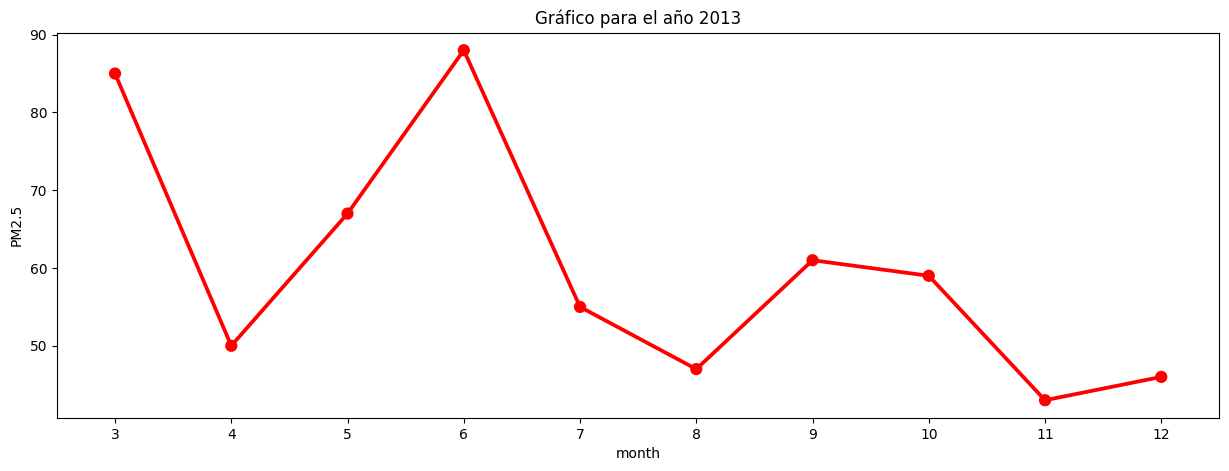

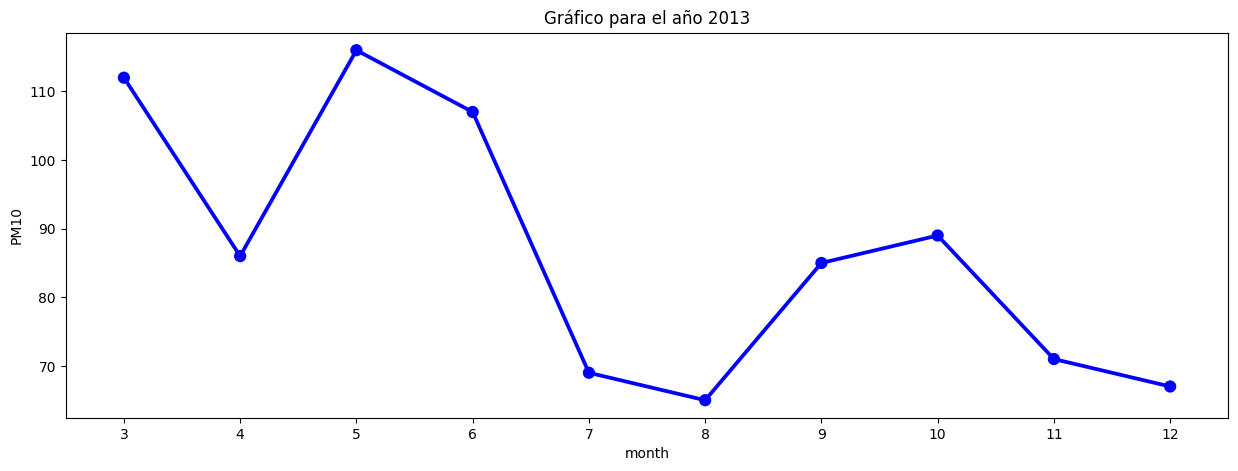

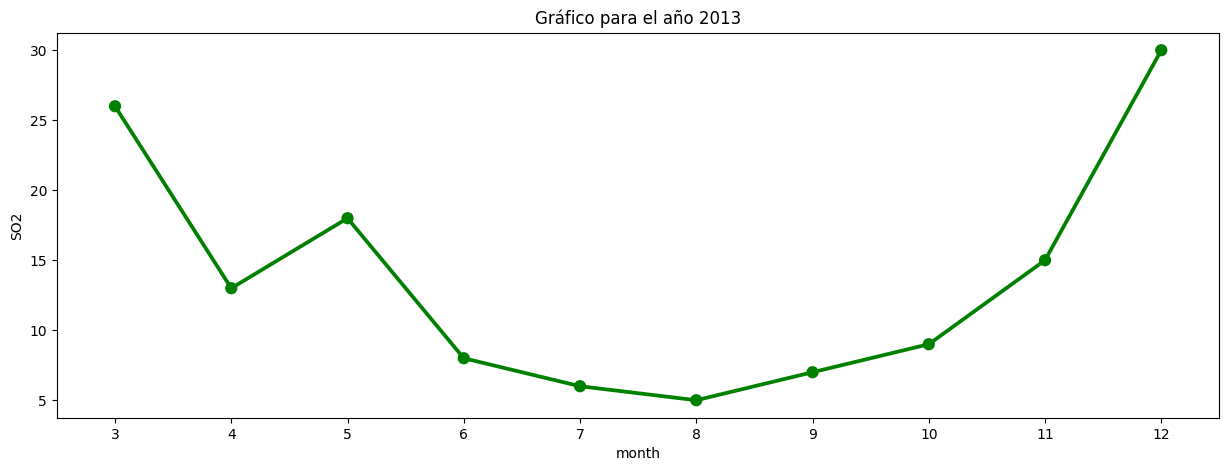

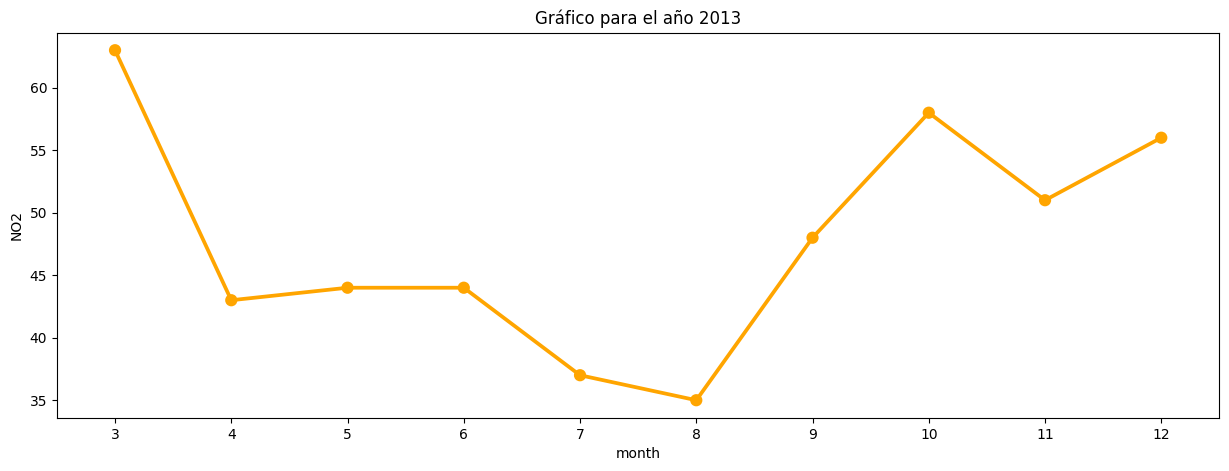

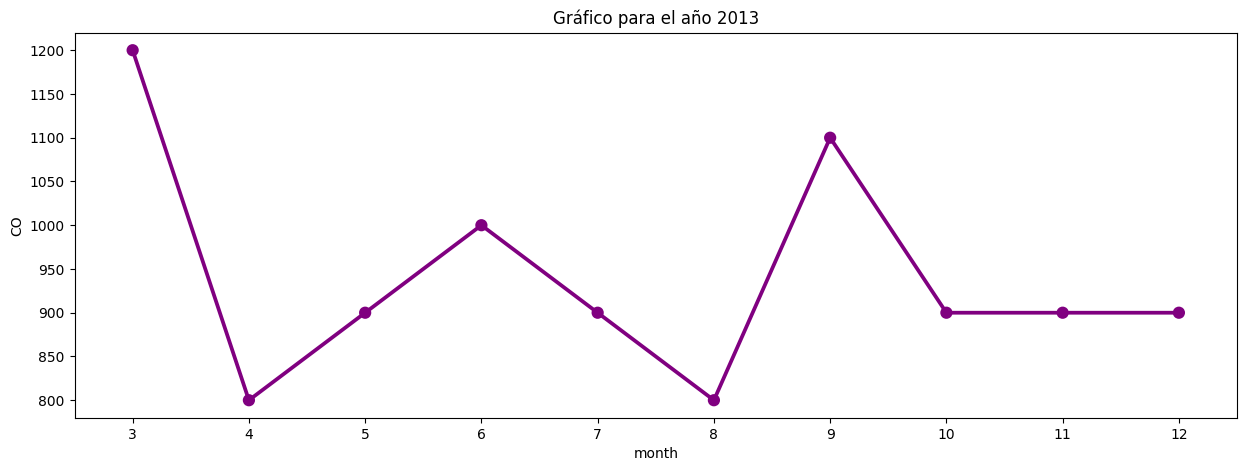

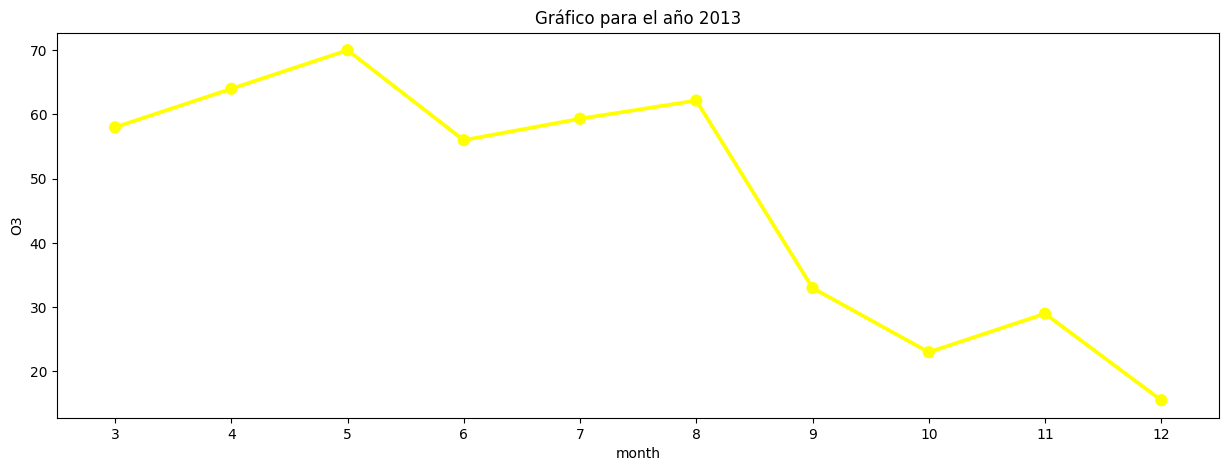

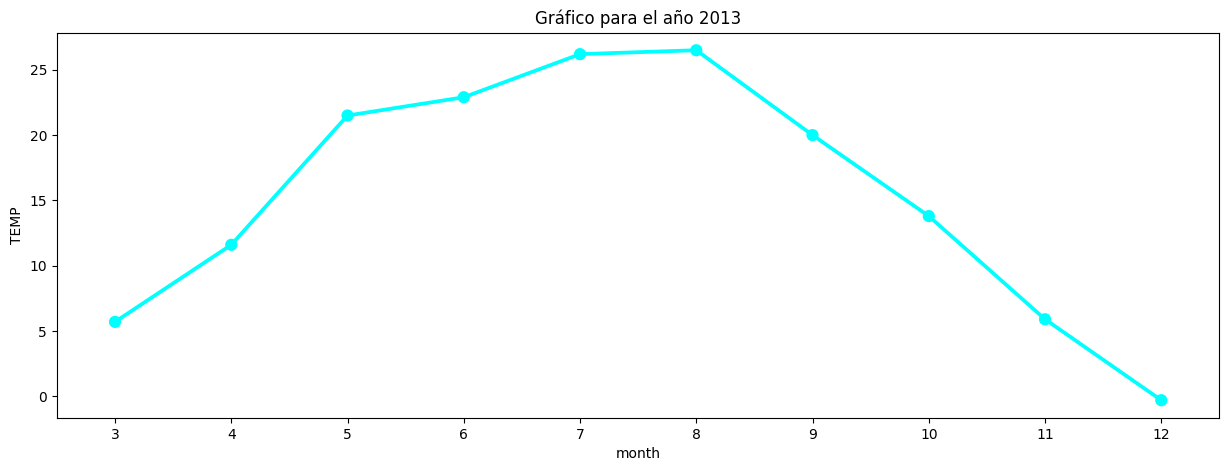

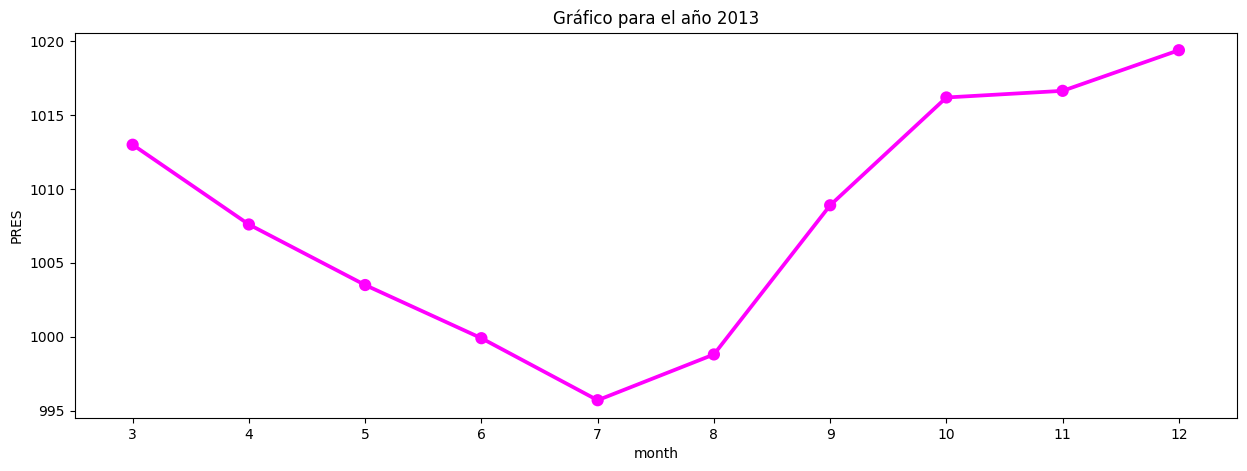

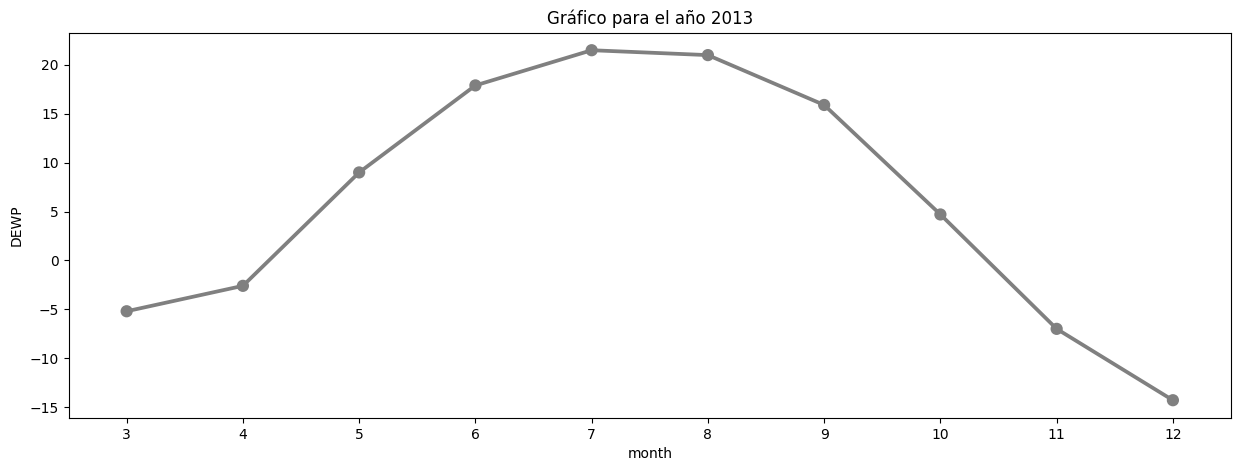

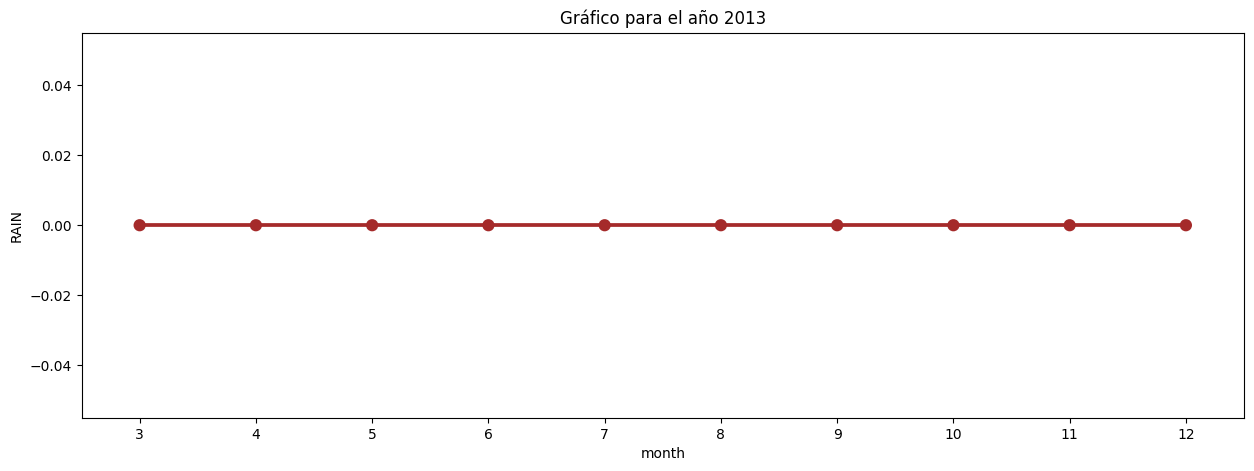

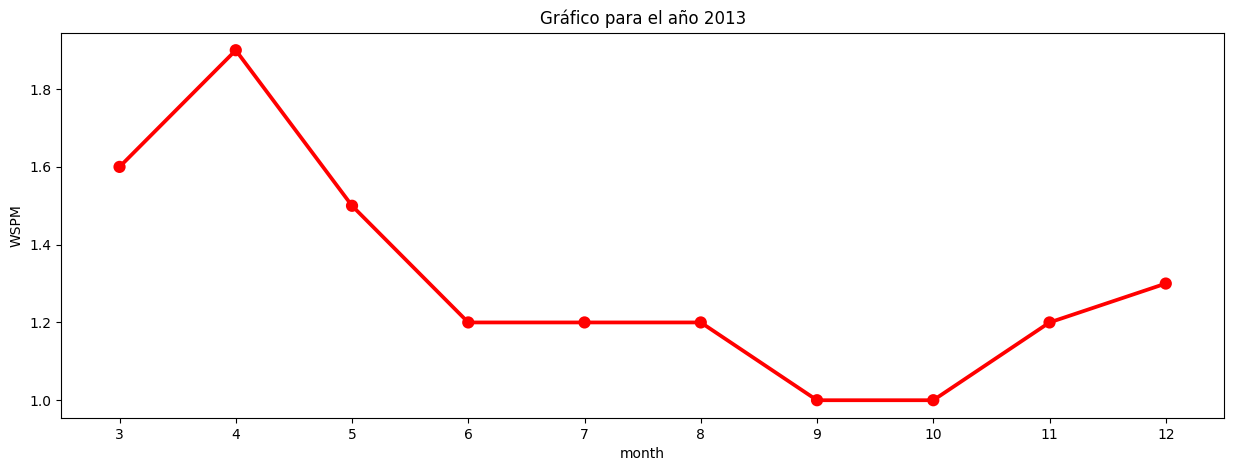

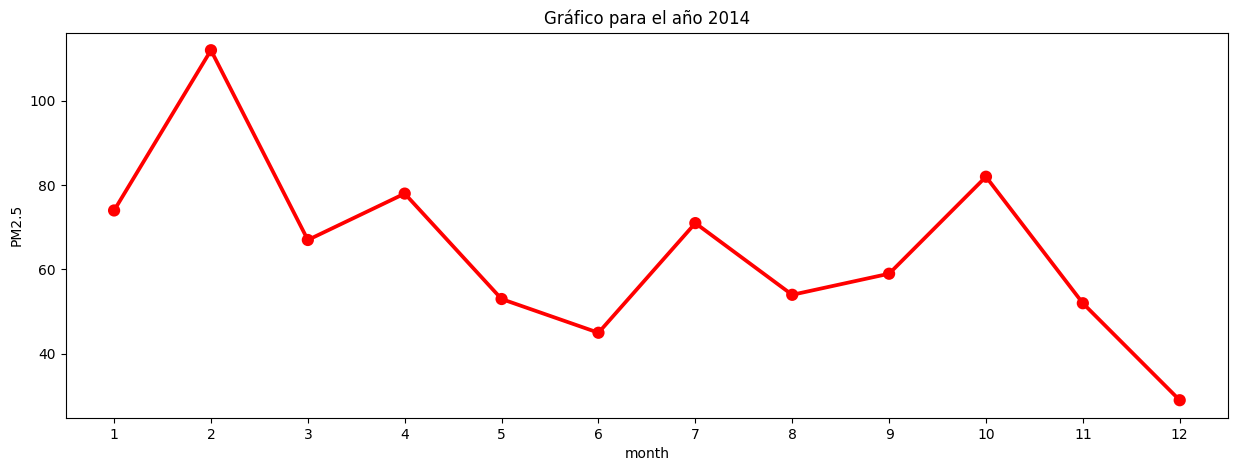

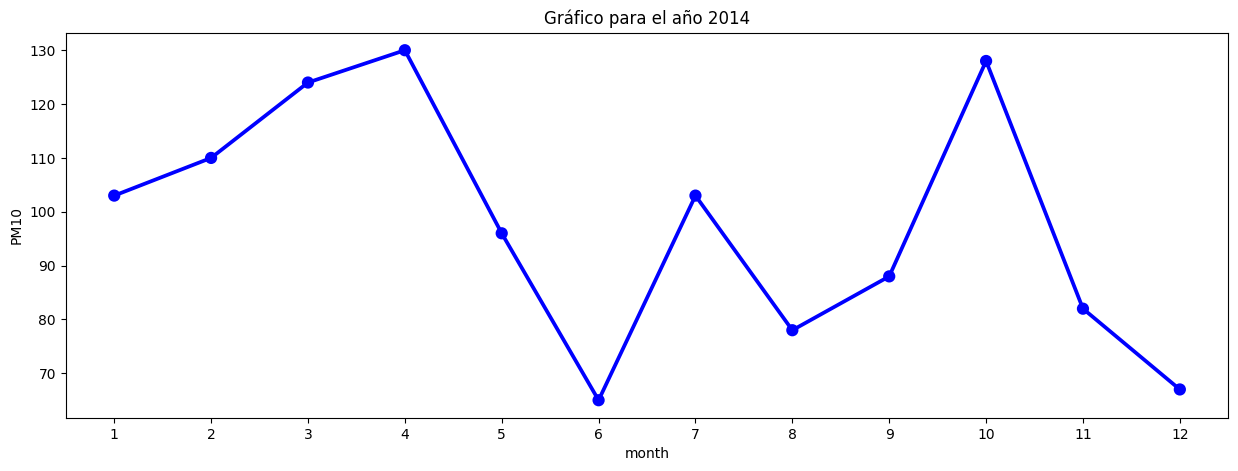

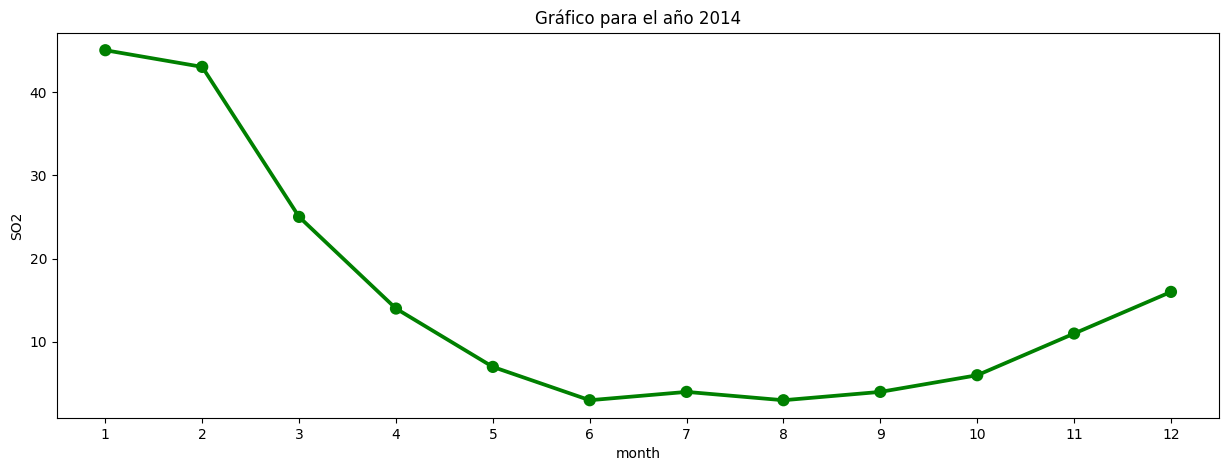

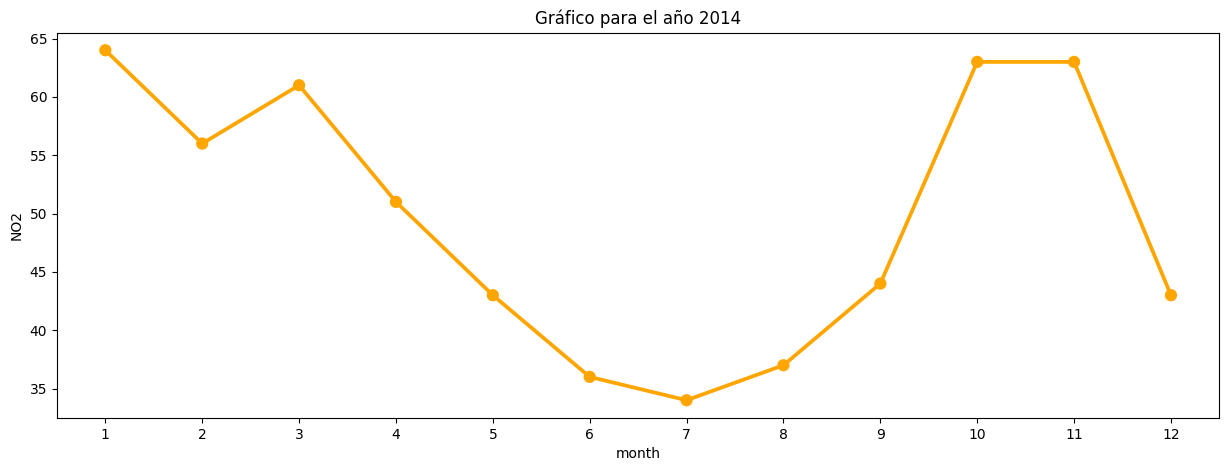

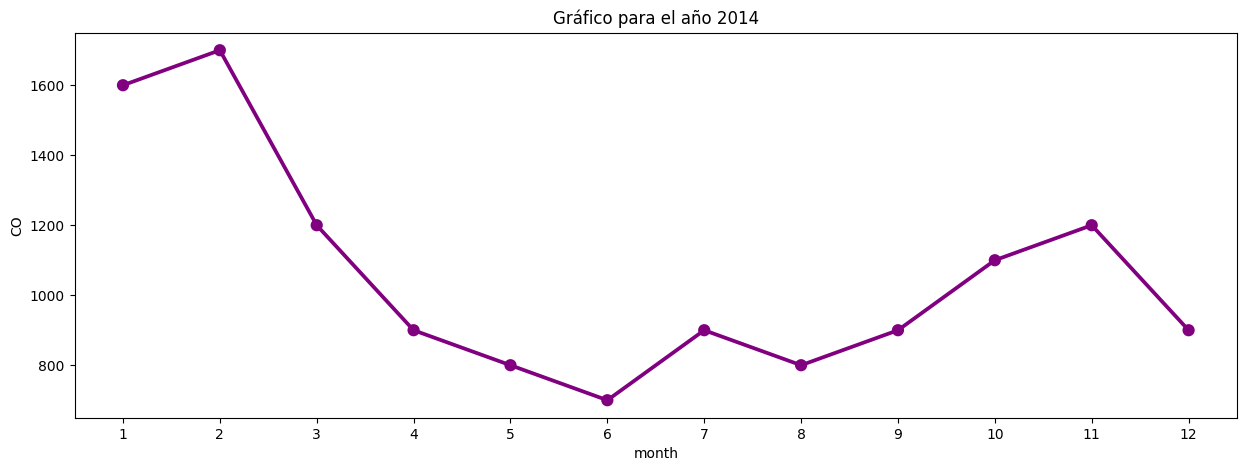

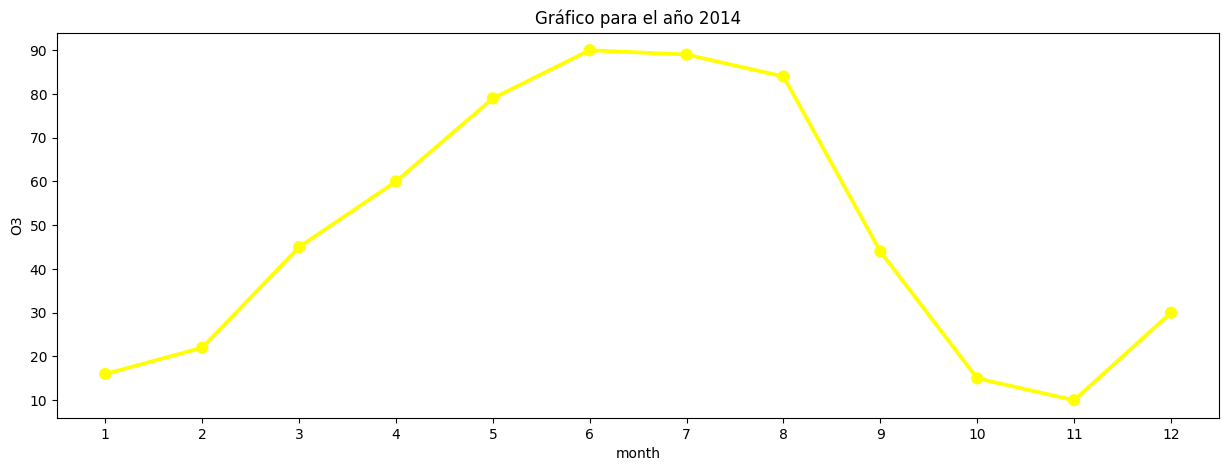

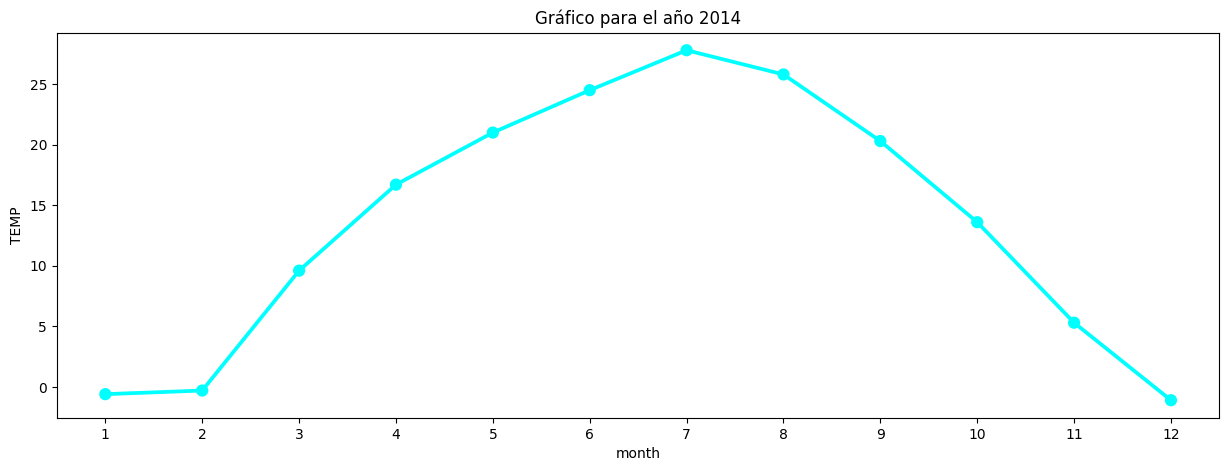

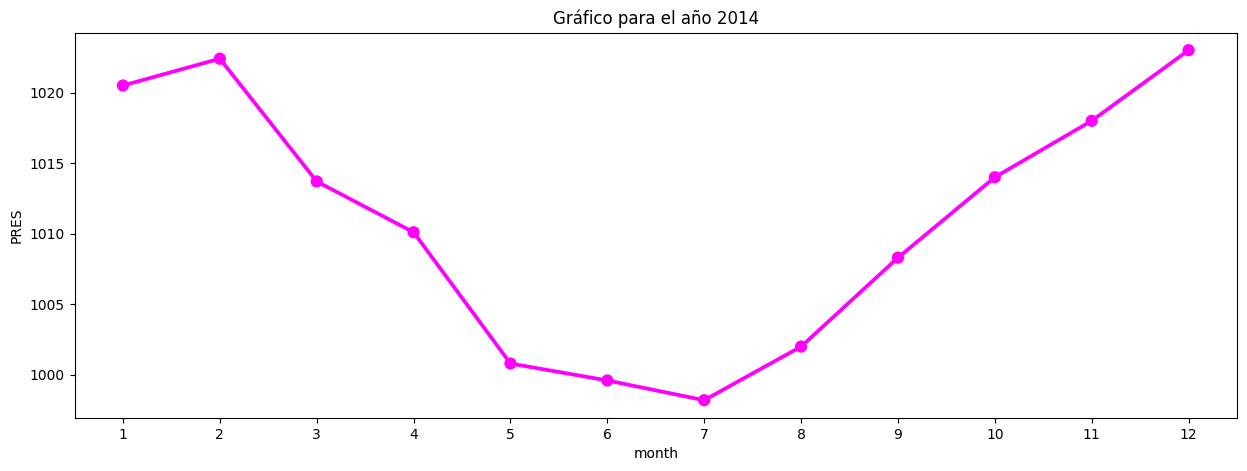

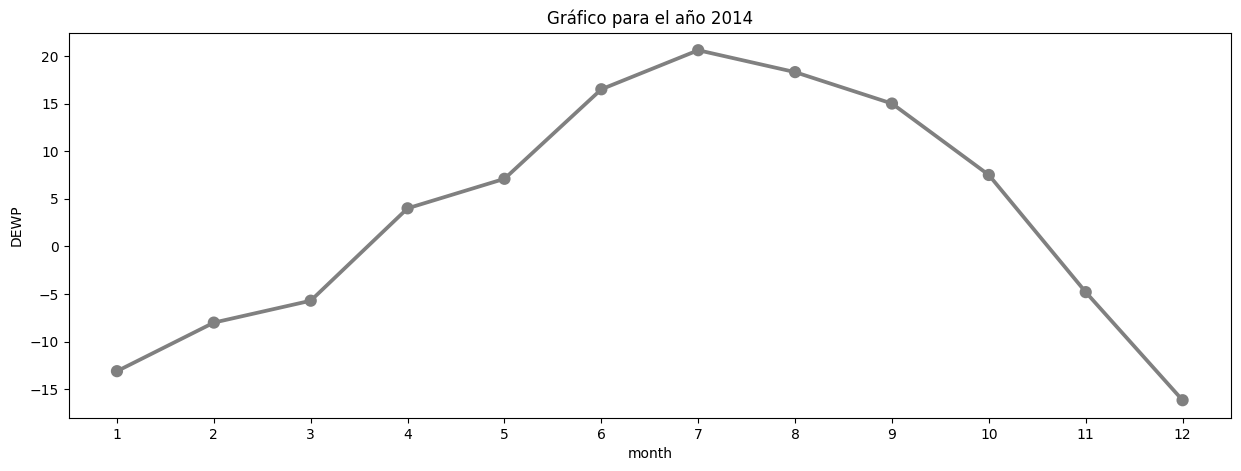

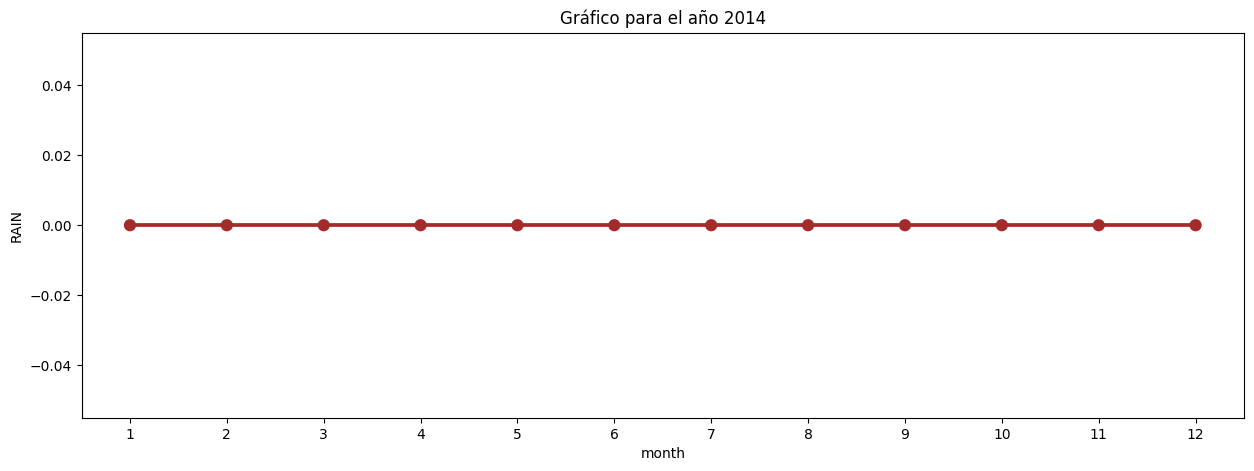

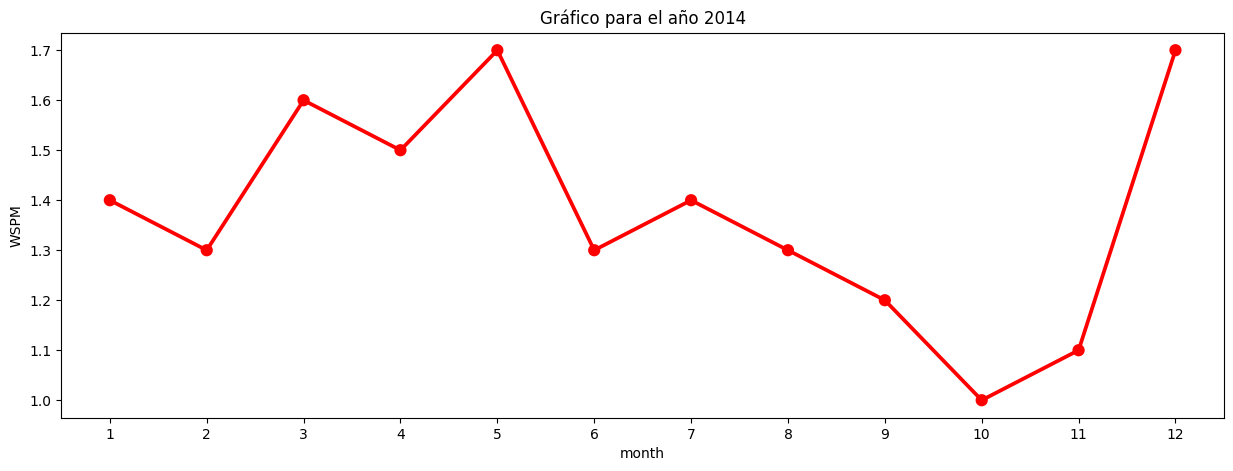

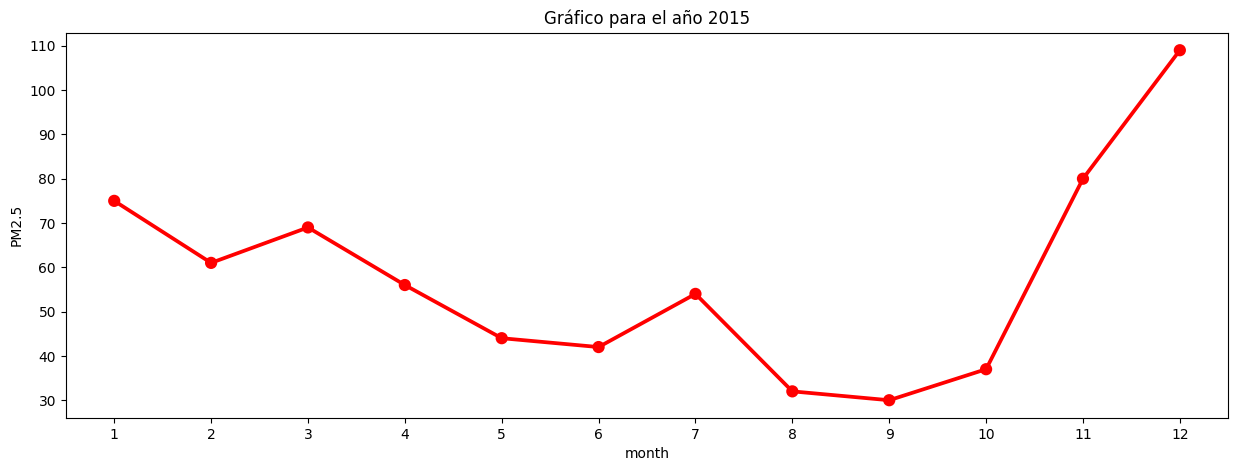

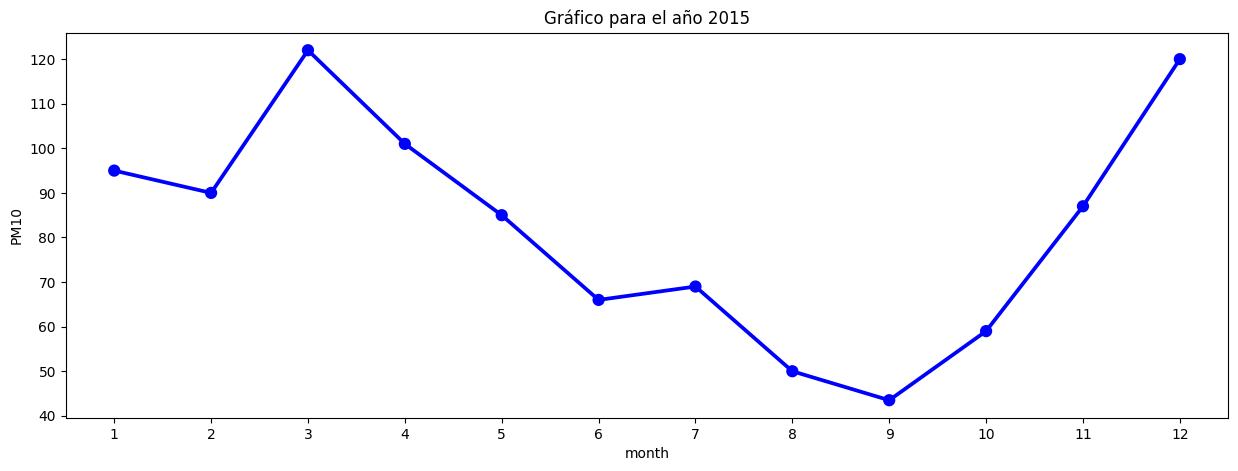

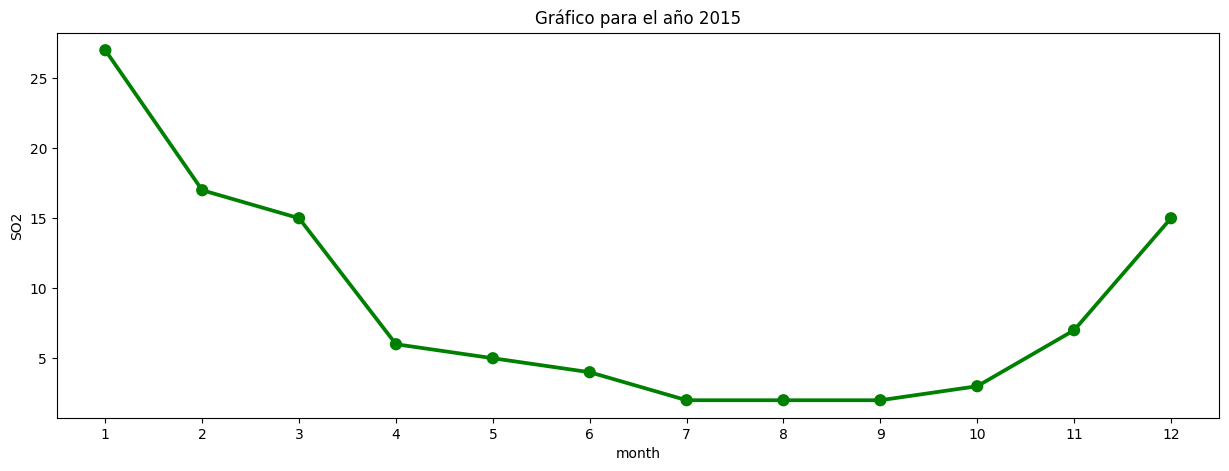

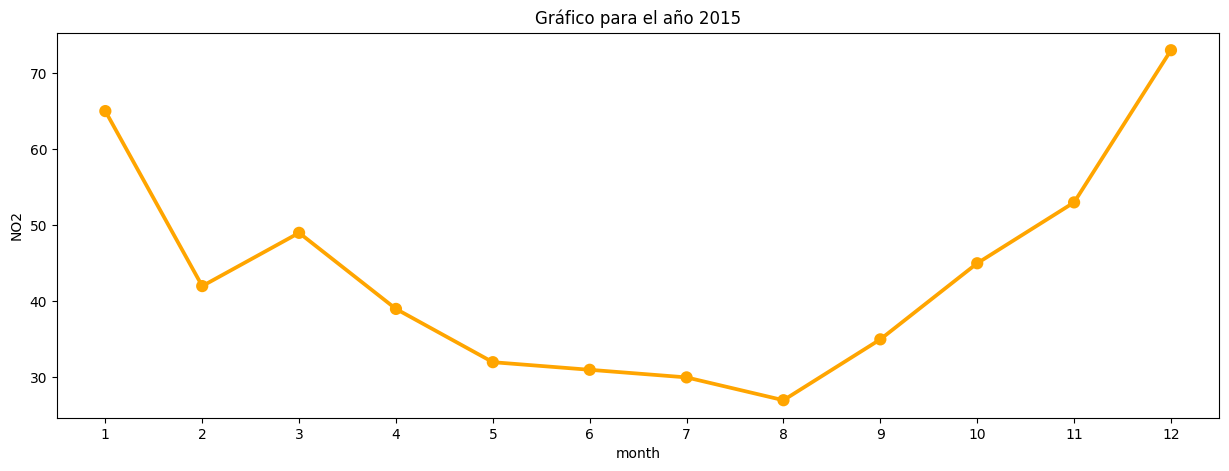

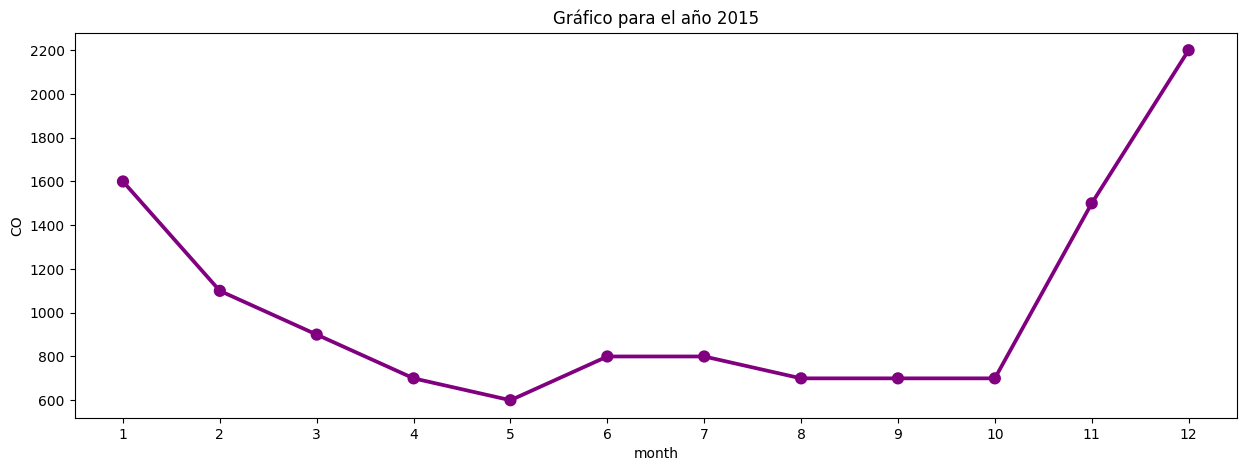

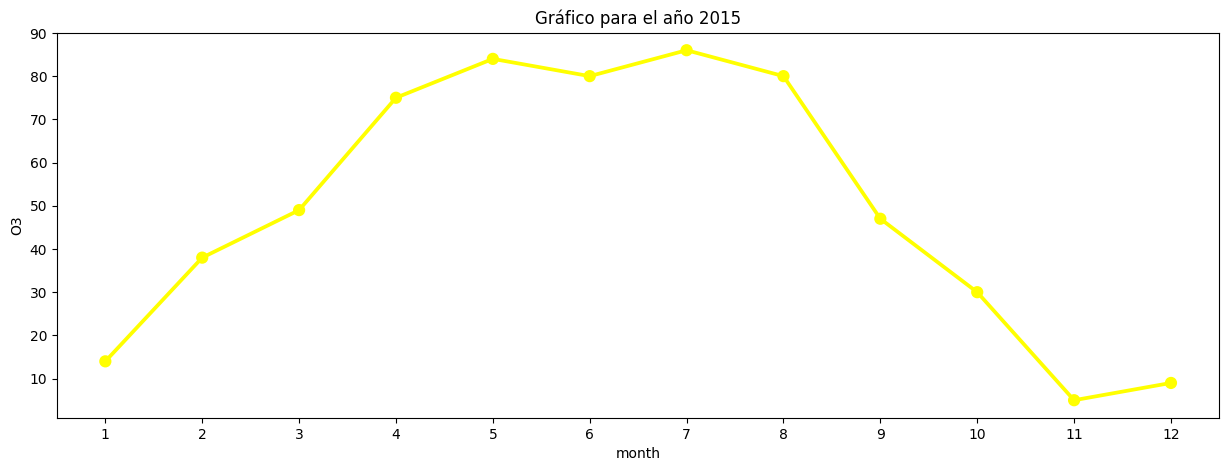

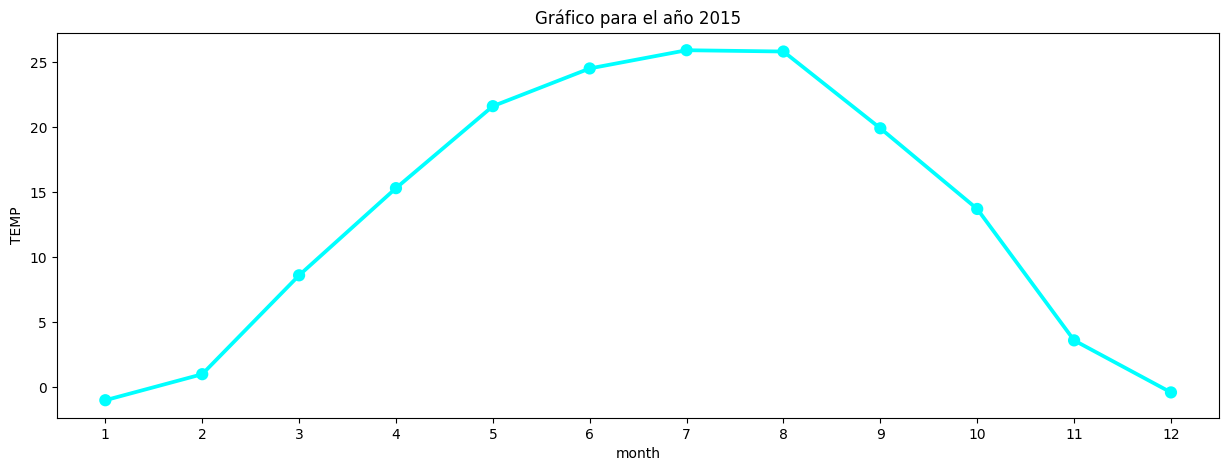

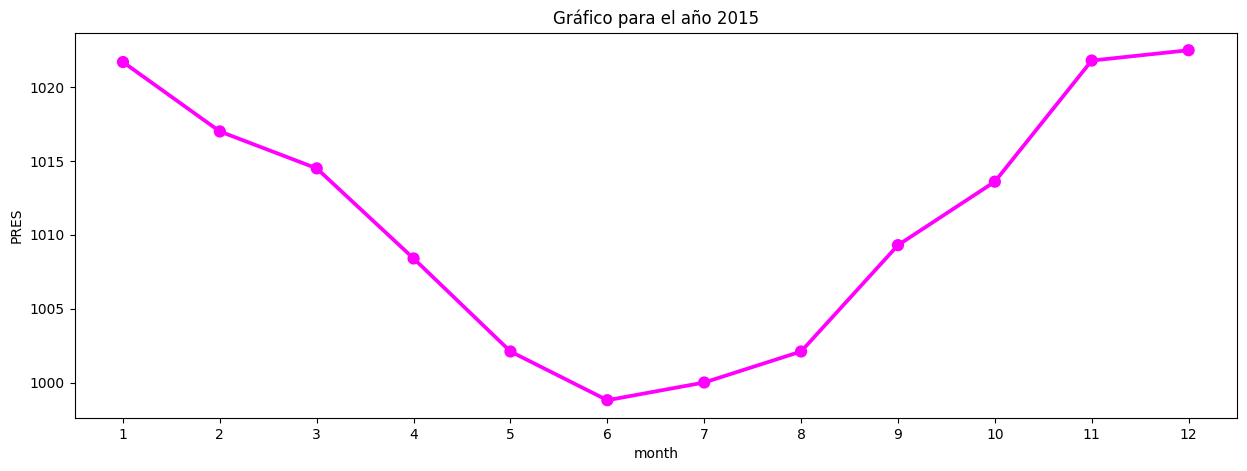

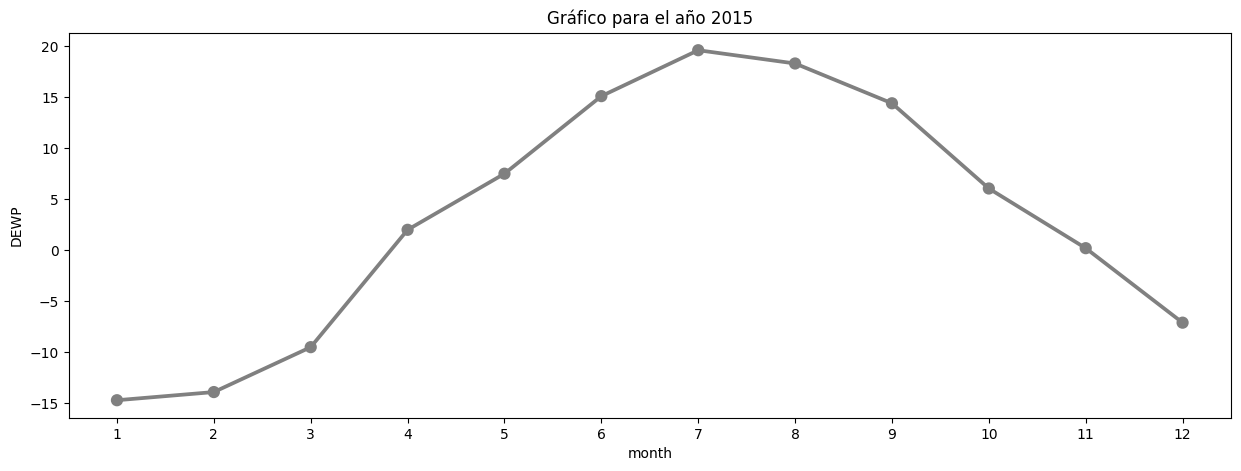

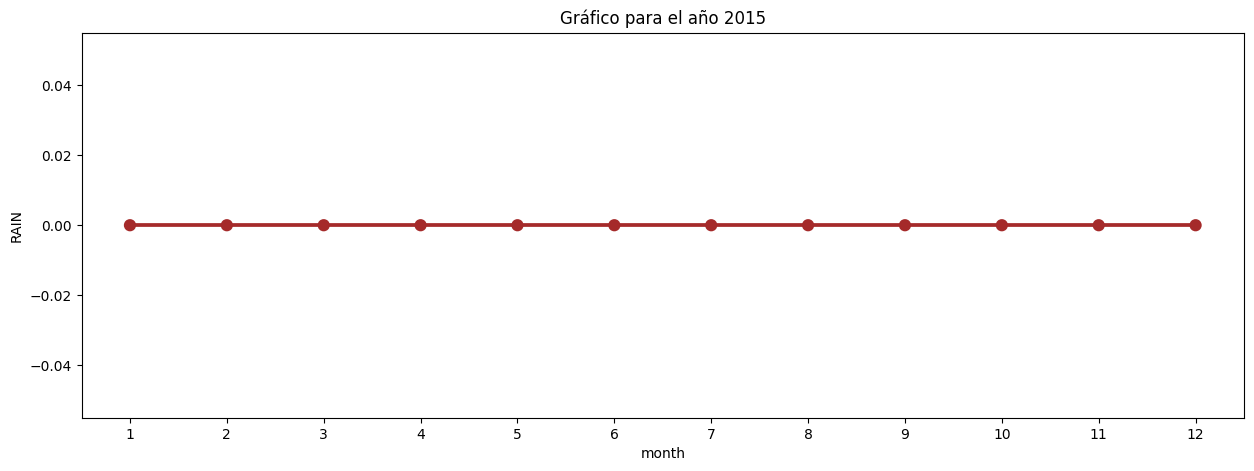

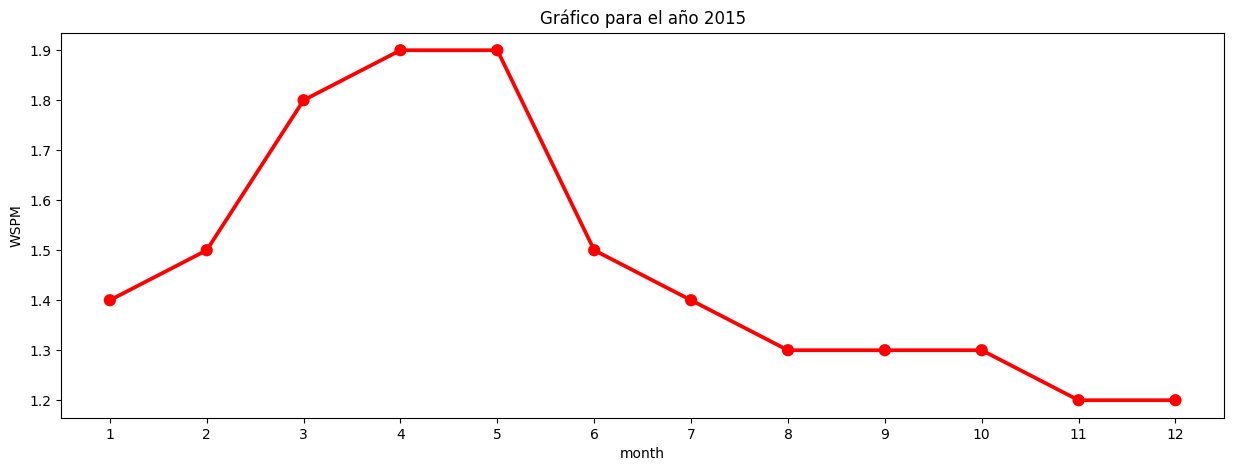

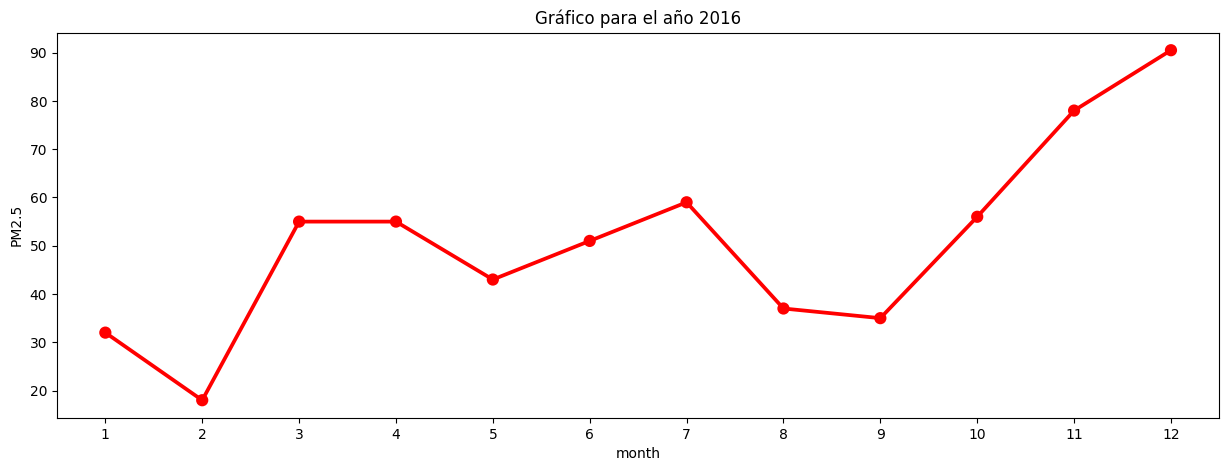

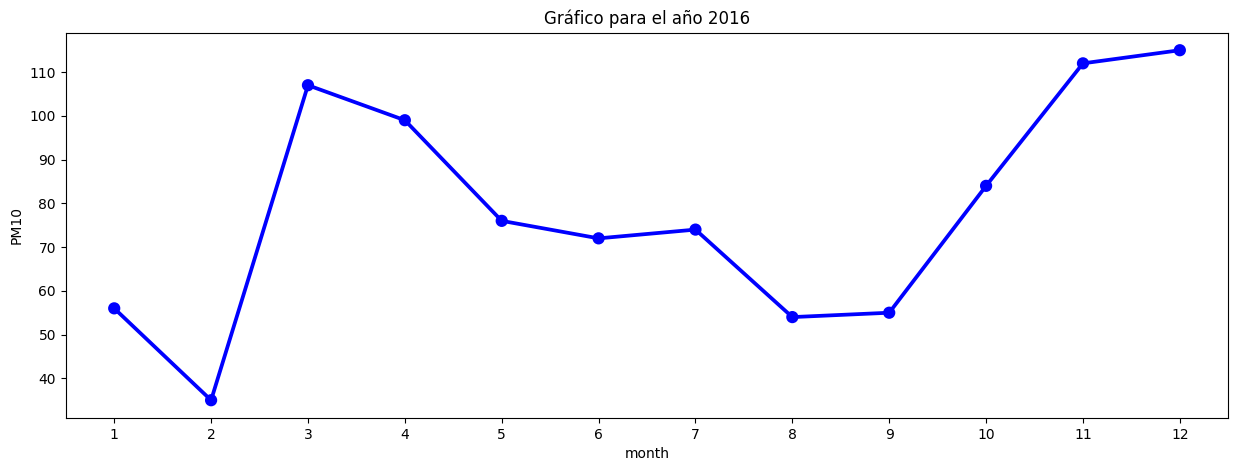

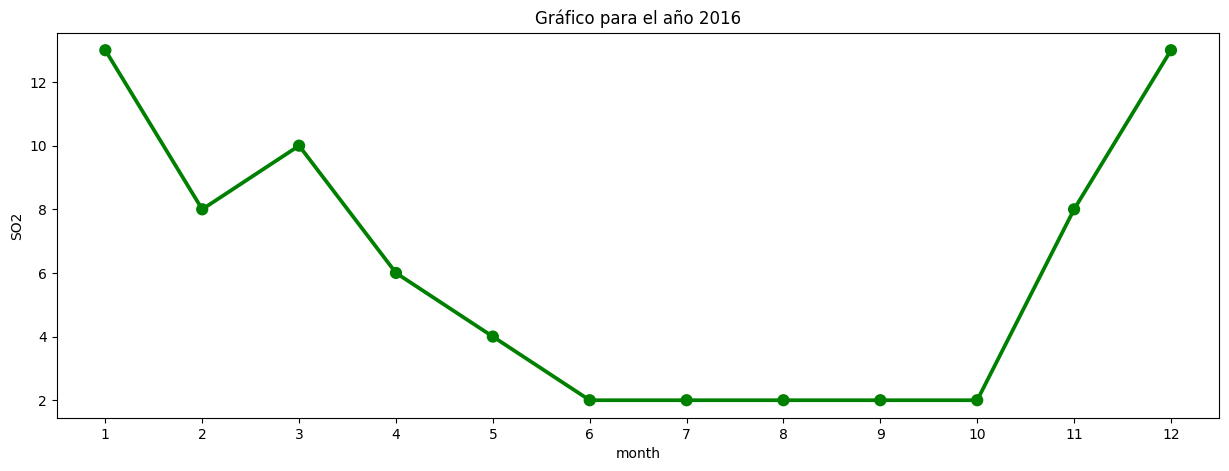

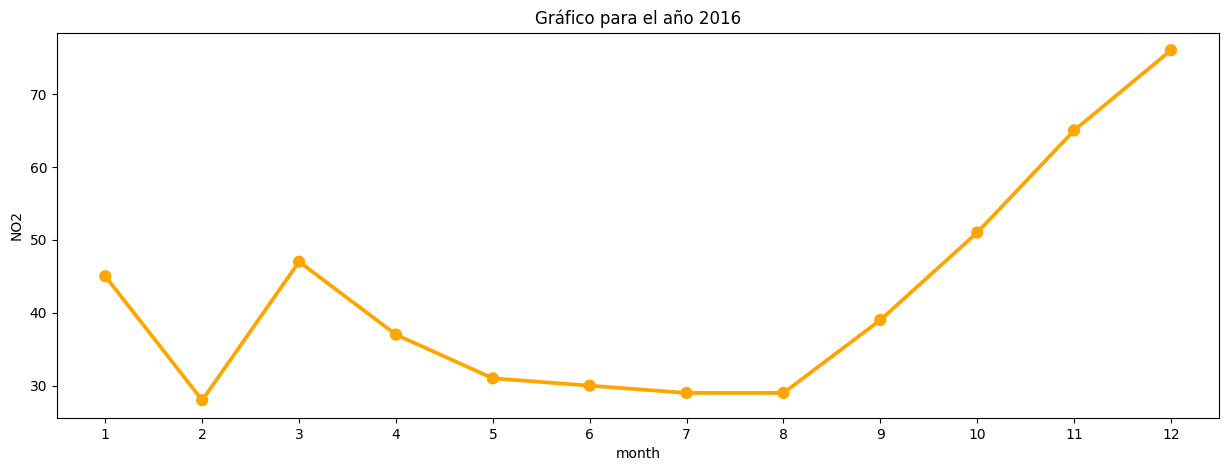

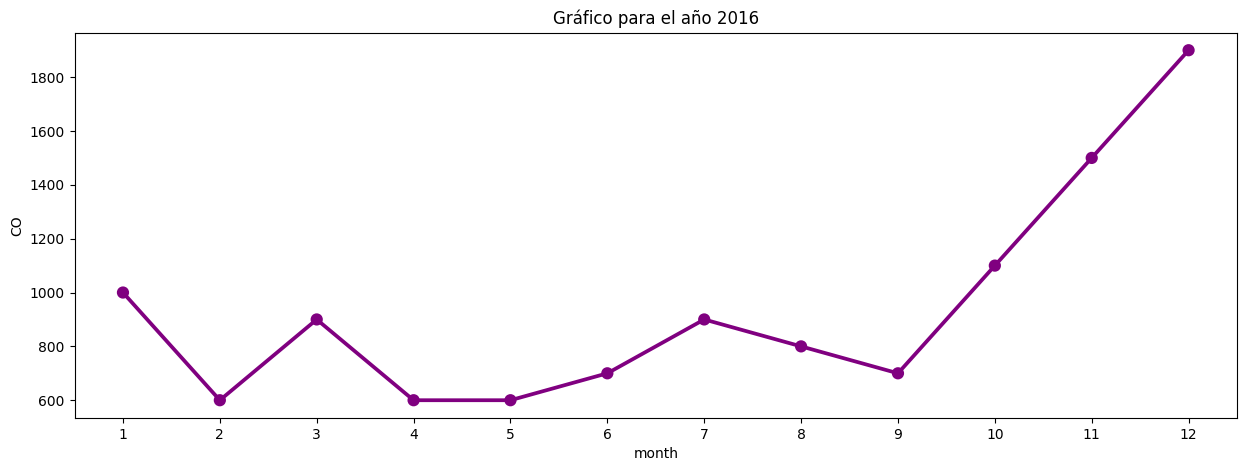

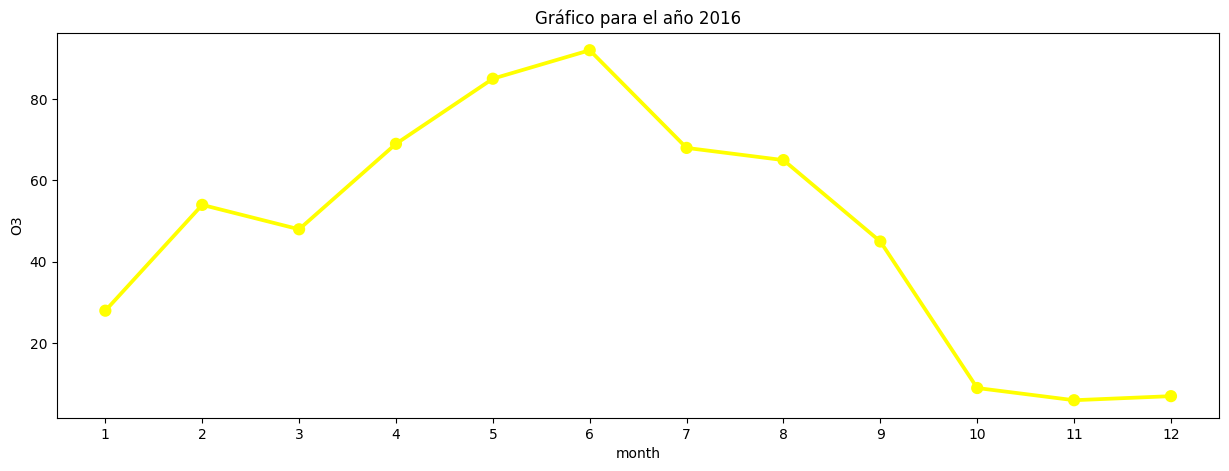

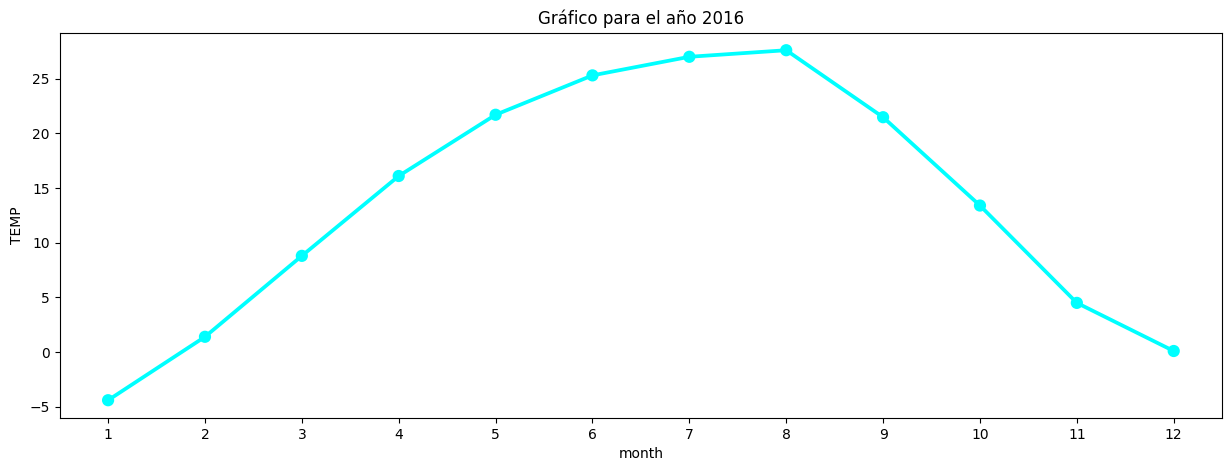

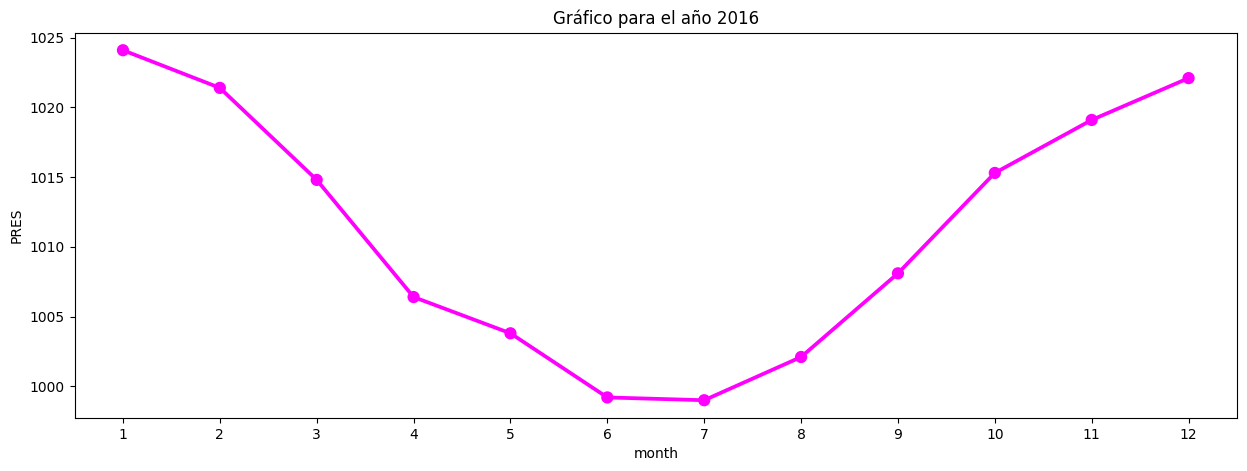

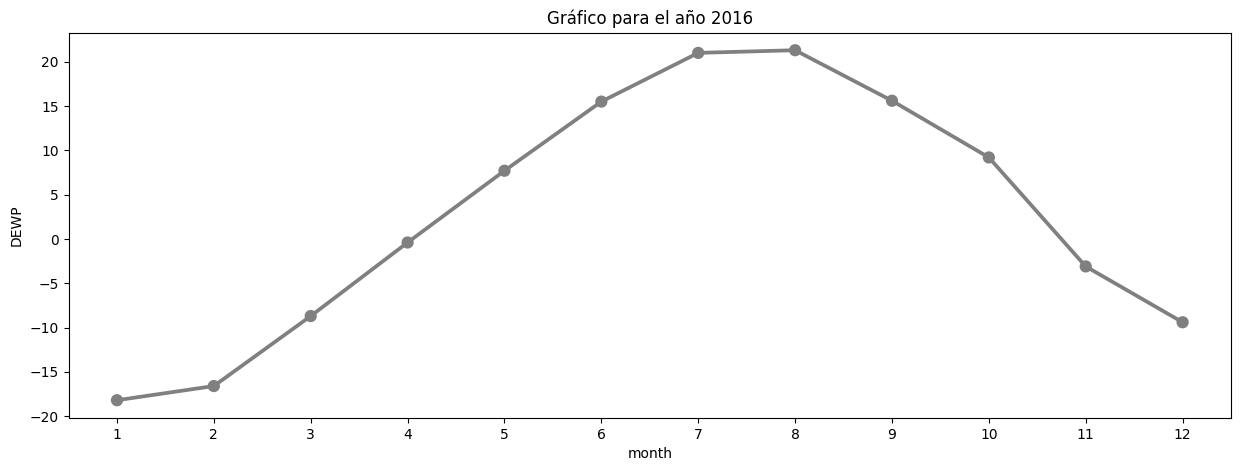

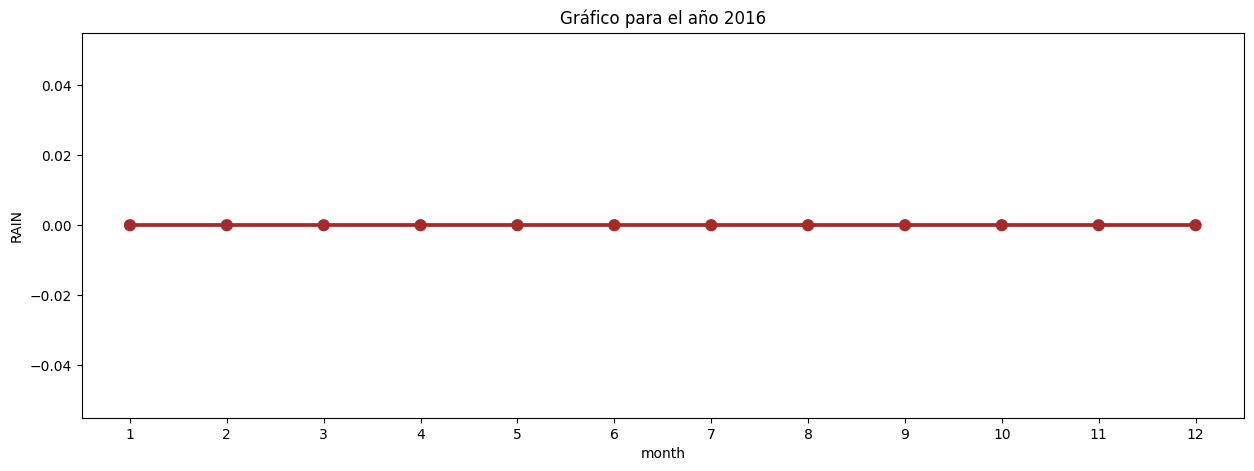

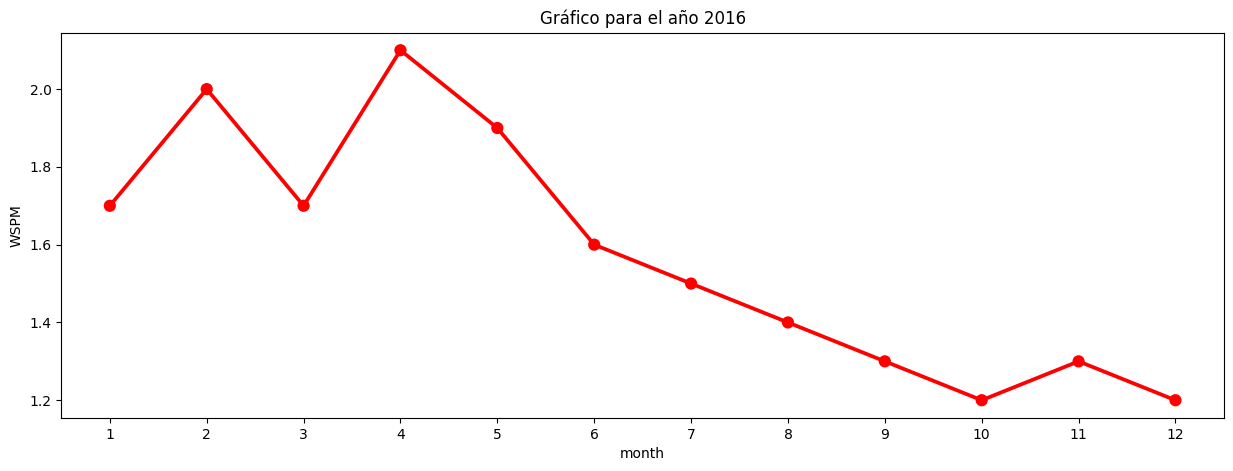

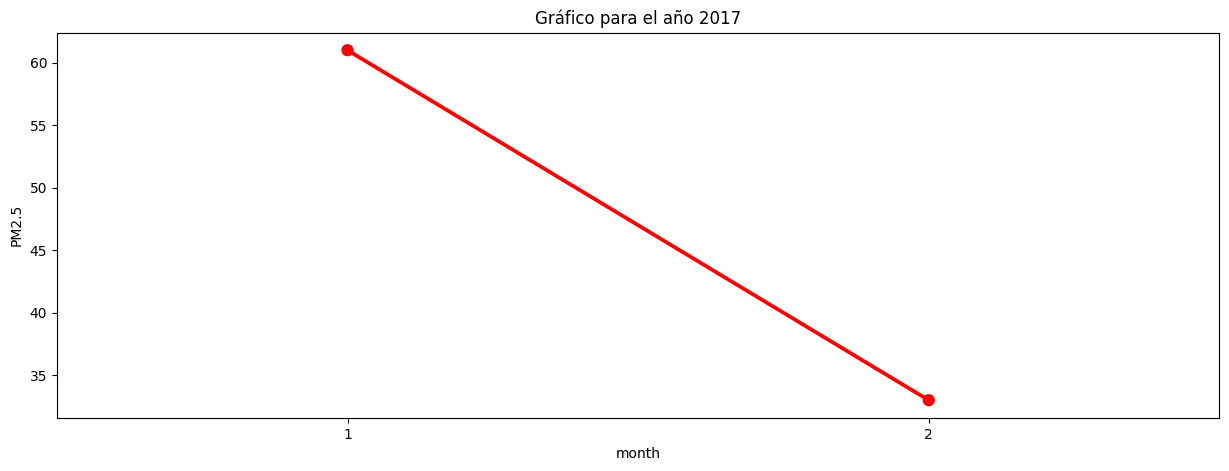

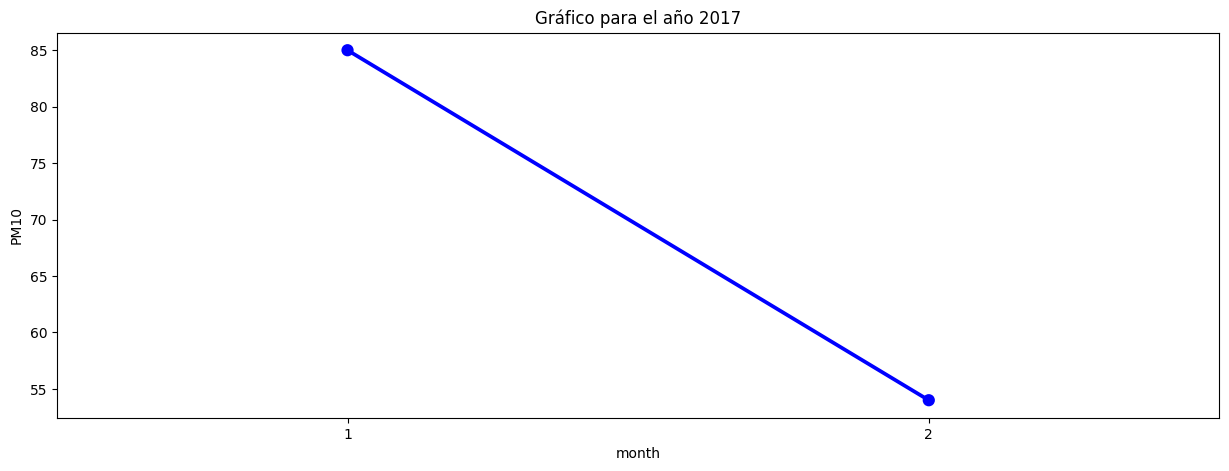

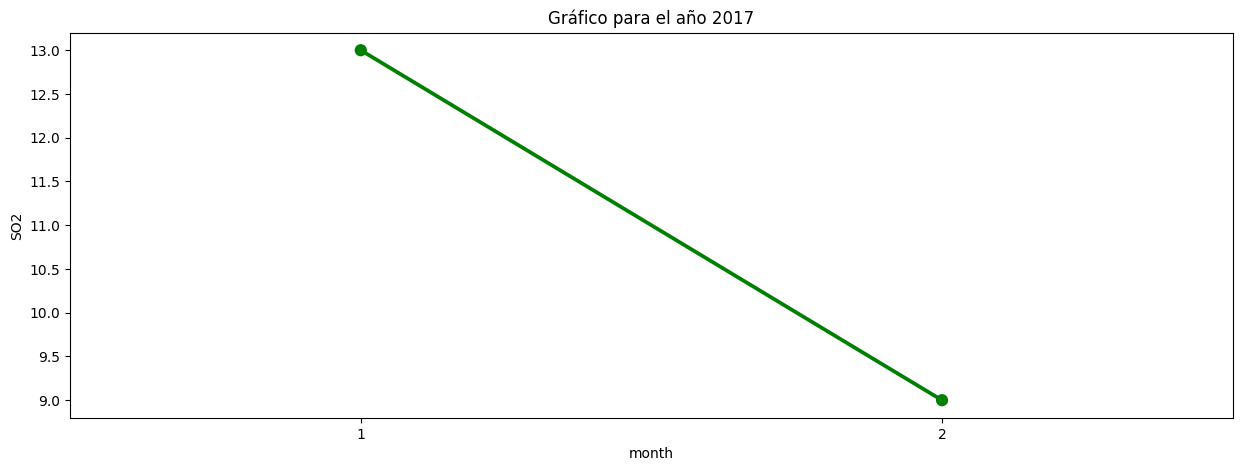

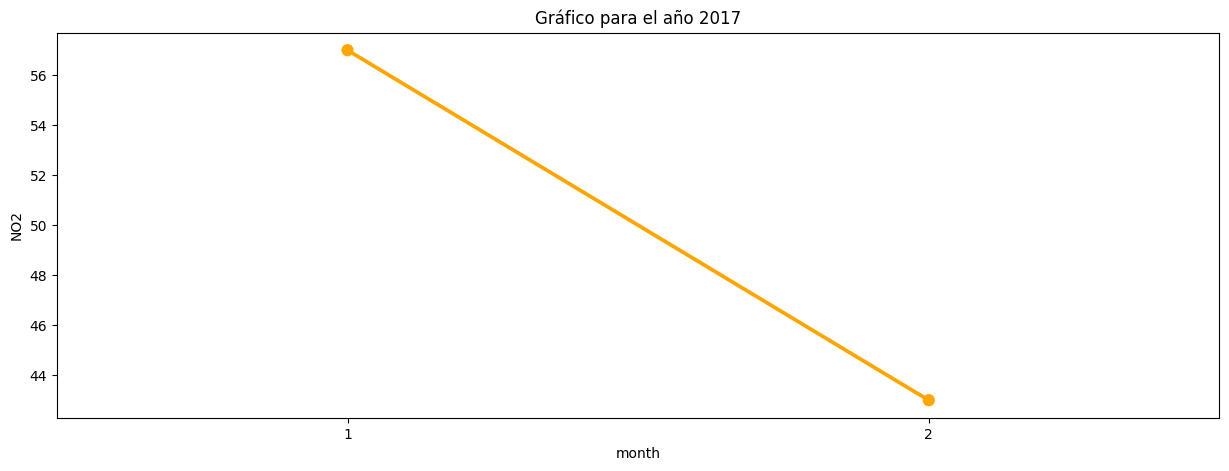

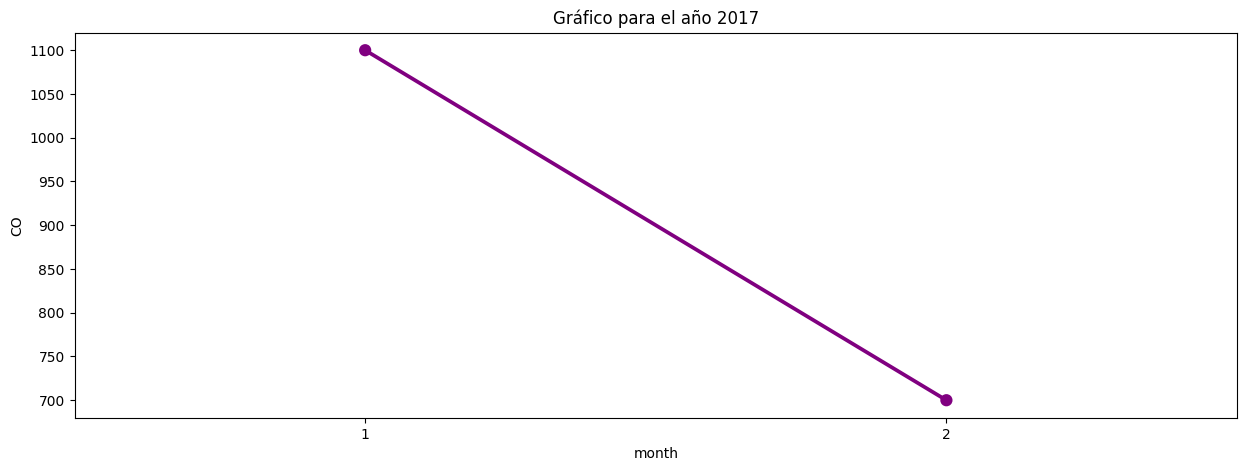

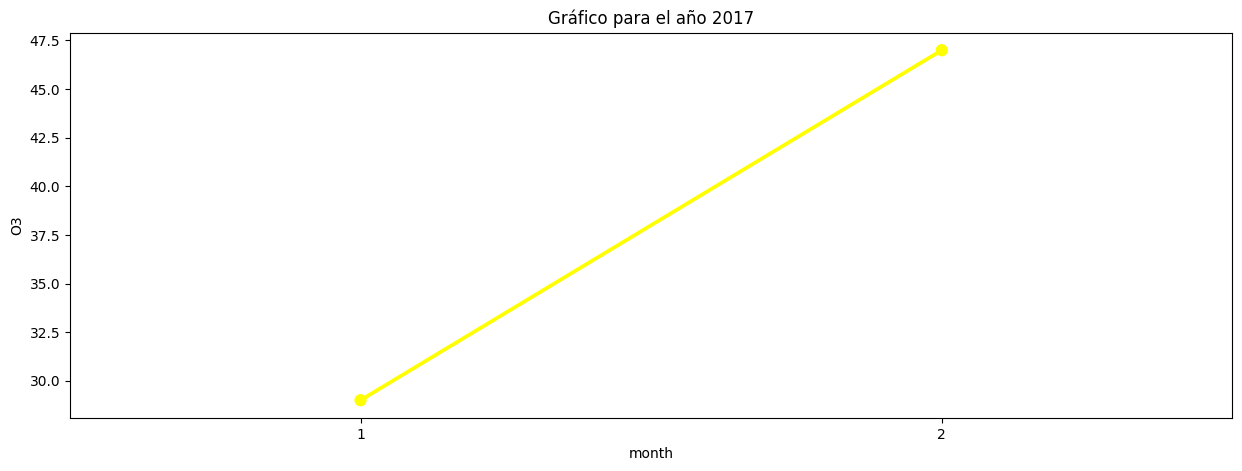

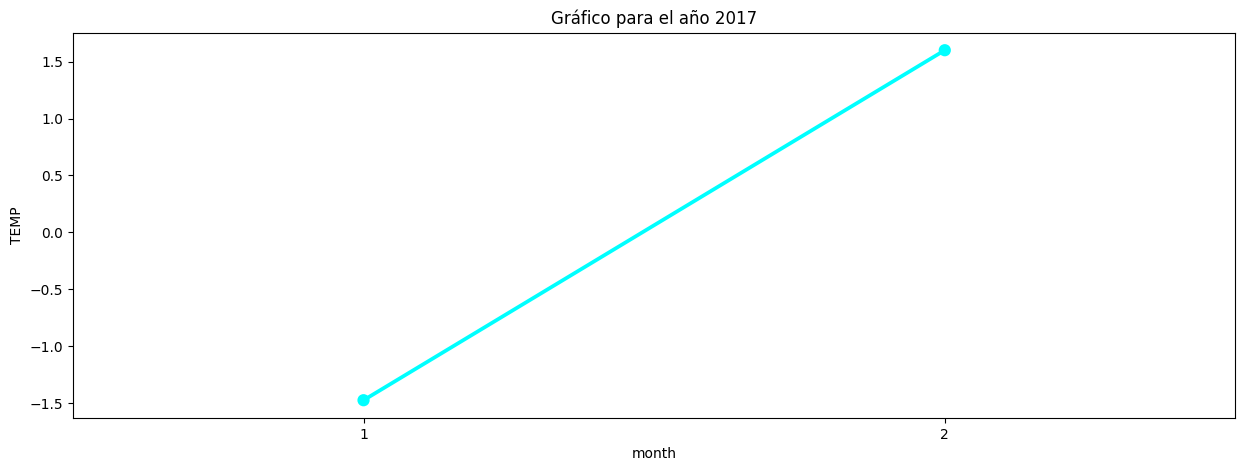

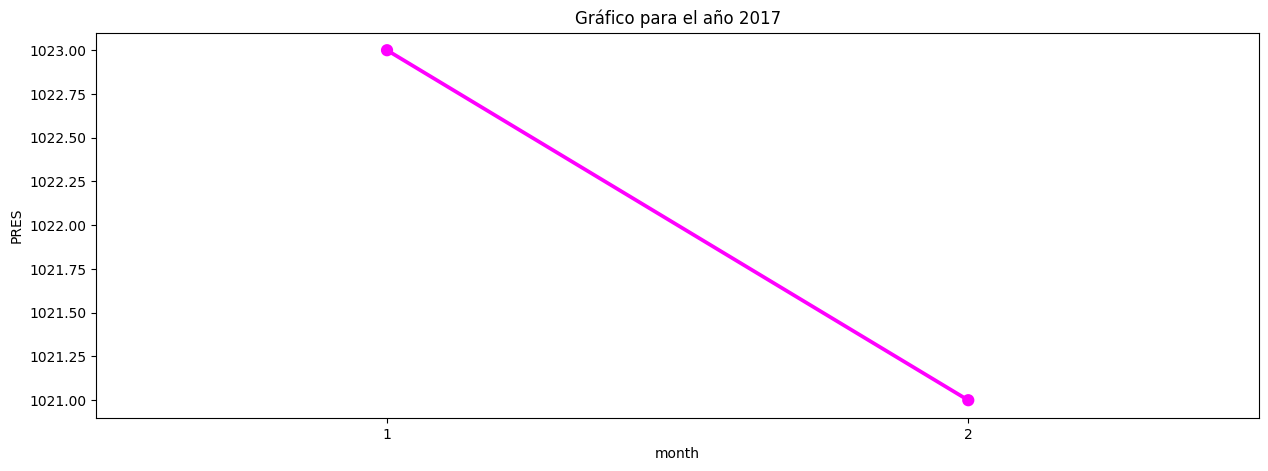

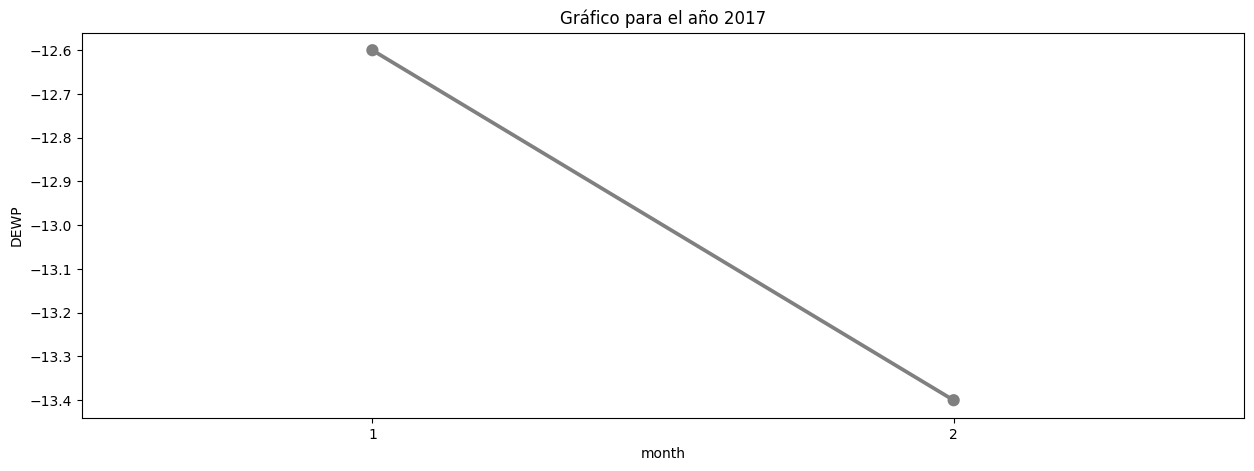

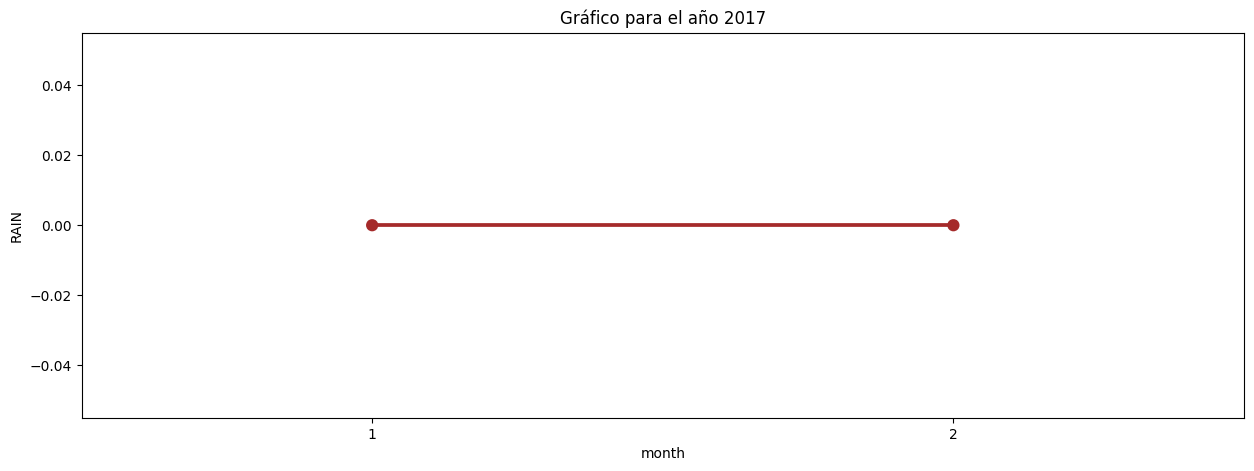

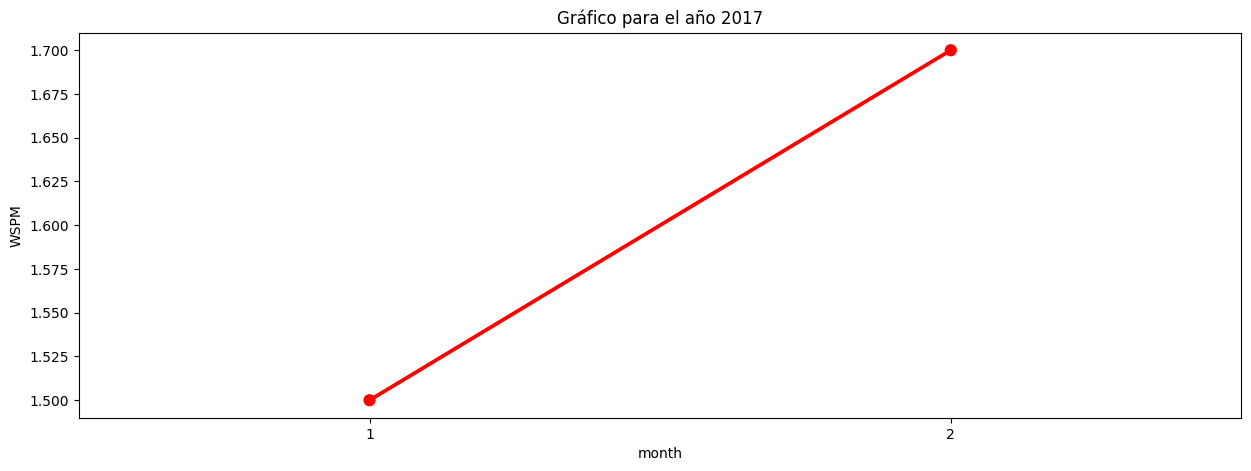

In [145]:
for year in years:
    df_year = df[df['year']==year]
    for i, colum in enumerate(columns_all):
        df_aux = df_year[[colum,'month']].groupby(["month"]).median().reset_index().sort_values(by='month',ascending=False)
        f,ax=plt.subplots(figsize=(15,5))
        sns.pointplot(x='month', y=str(colum), data=df_aux, markers='o', color=colors[i % len(colors)])
        plt.title(f'Gráfico para el año {year}')

## Graficas Juntas

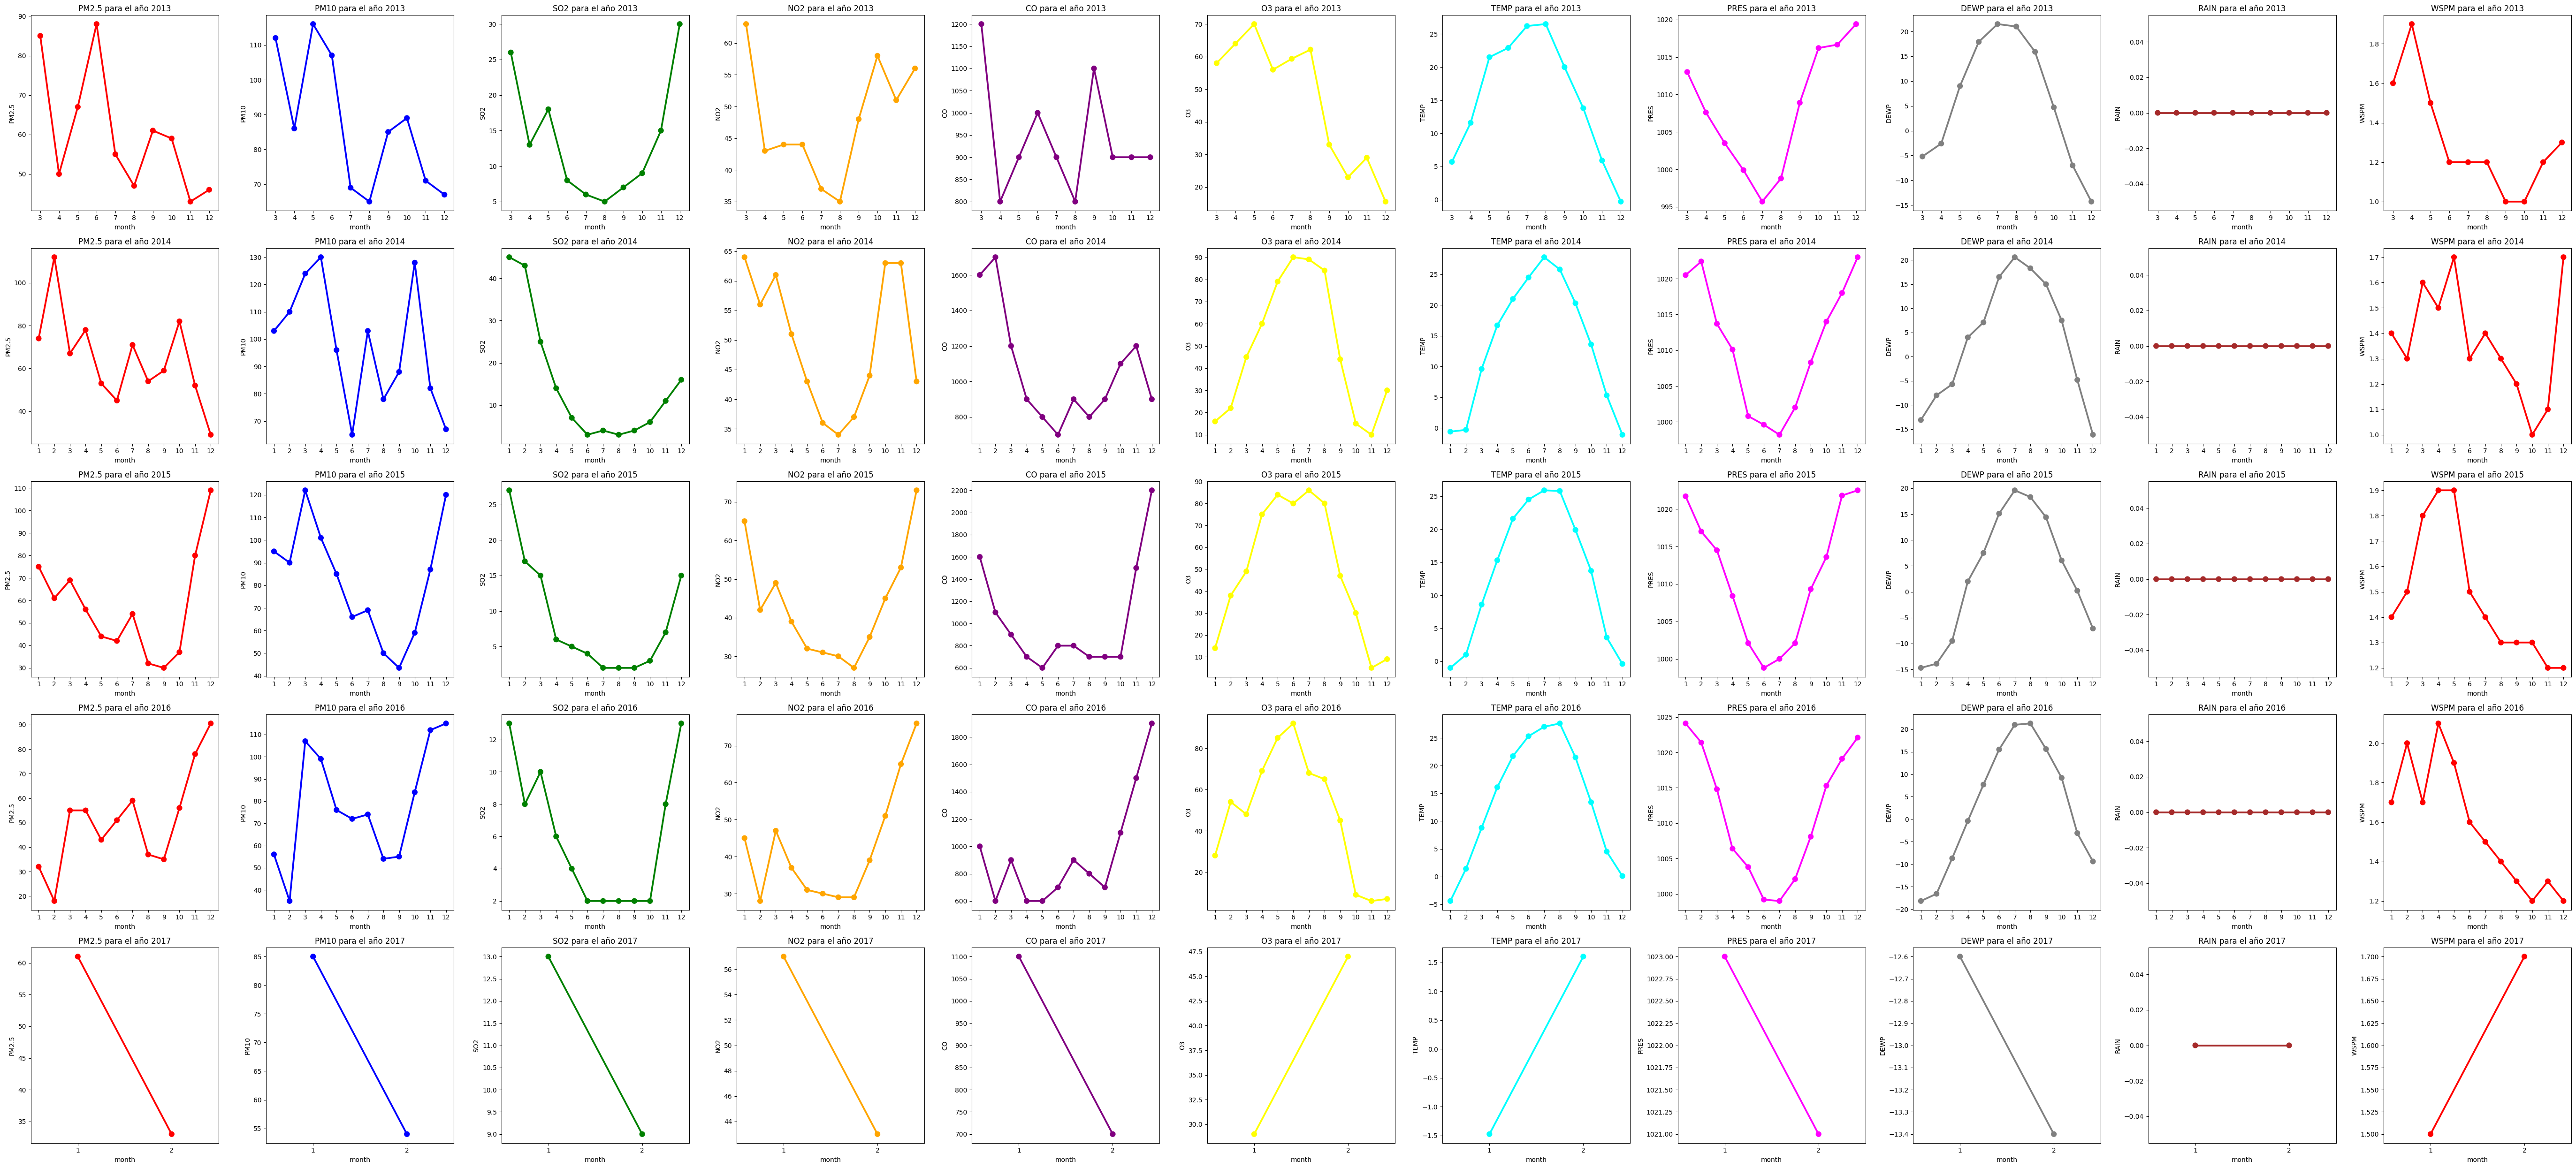

In [146]:
num_plots = len(columns_all)

fig, axes = plt.subplots(len(years), num_plots, figsize=(5*num_plots, 5*len(years)))

for i, year in enumerate(years):
    df_year = df[df['year'] == year]
    for j, colum in enumerate(columns_all):
        df_aux = df_year[[colum, 'month']].groupby(["month"]).median().reset_index().sort_values(by='month', ascending=False)
        ax = axes[i, j]
        sns.pointplot(x='month', y=str(colum), data=df_aux, markers='o', color=colors[j % len(colors)], ax=ax)
        ax.set_title(f'{colum} para el año {year}')

plt.tight_layout()
plt.show()


# Analisis 2017 por Hora

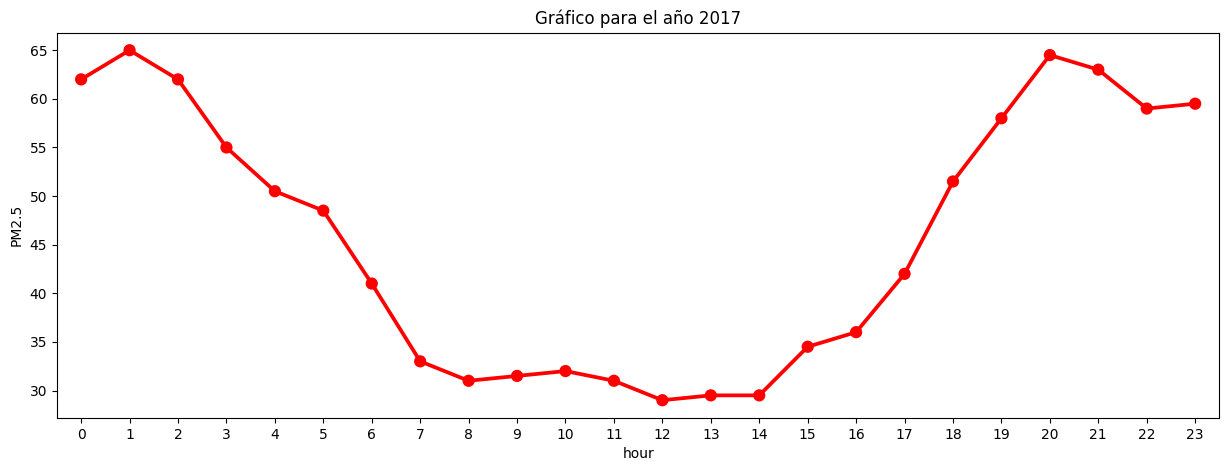

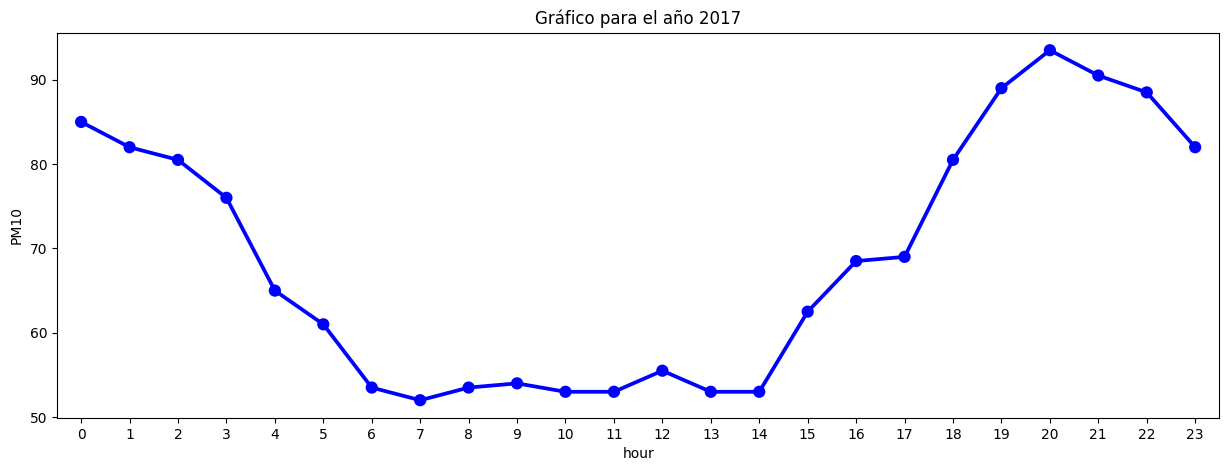

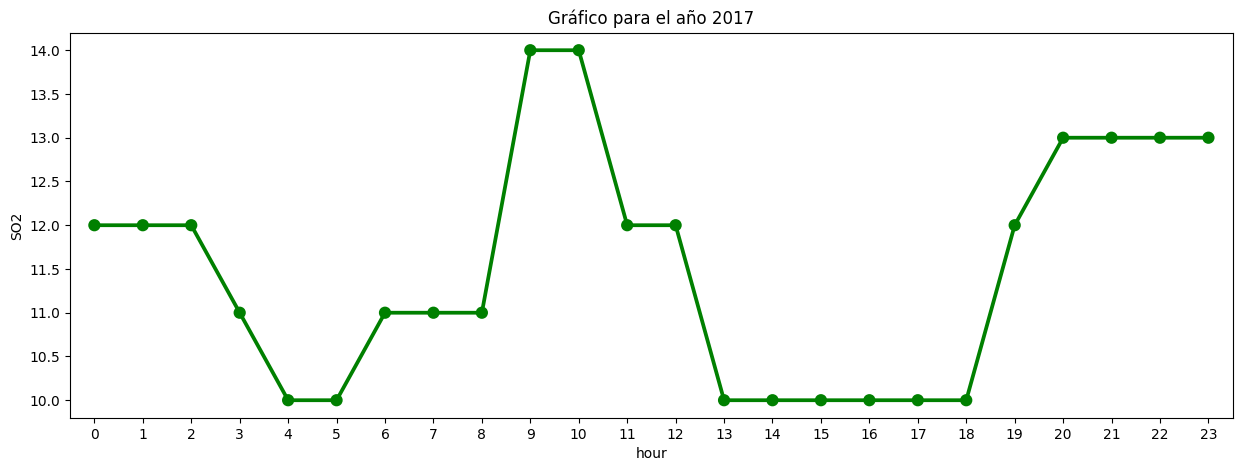

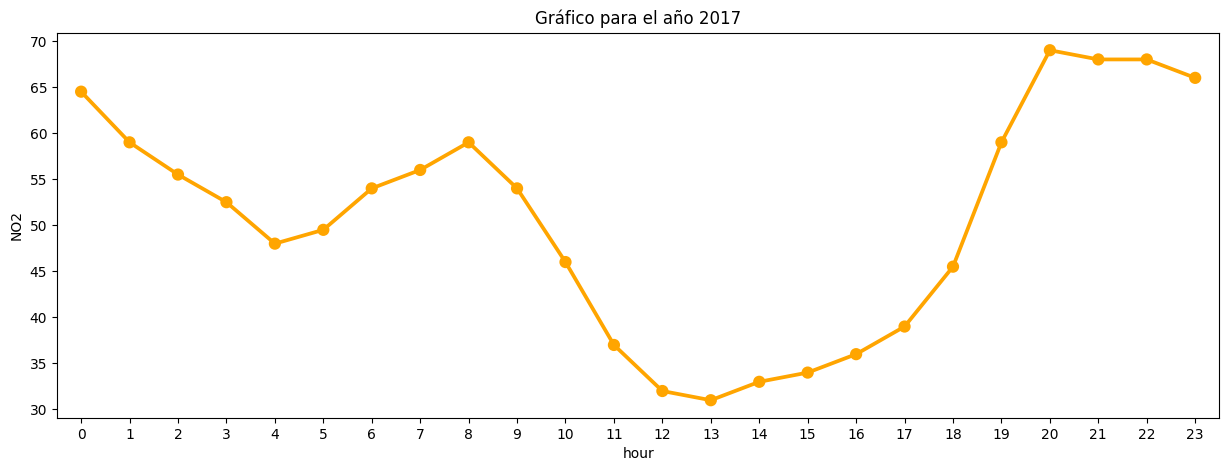

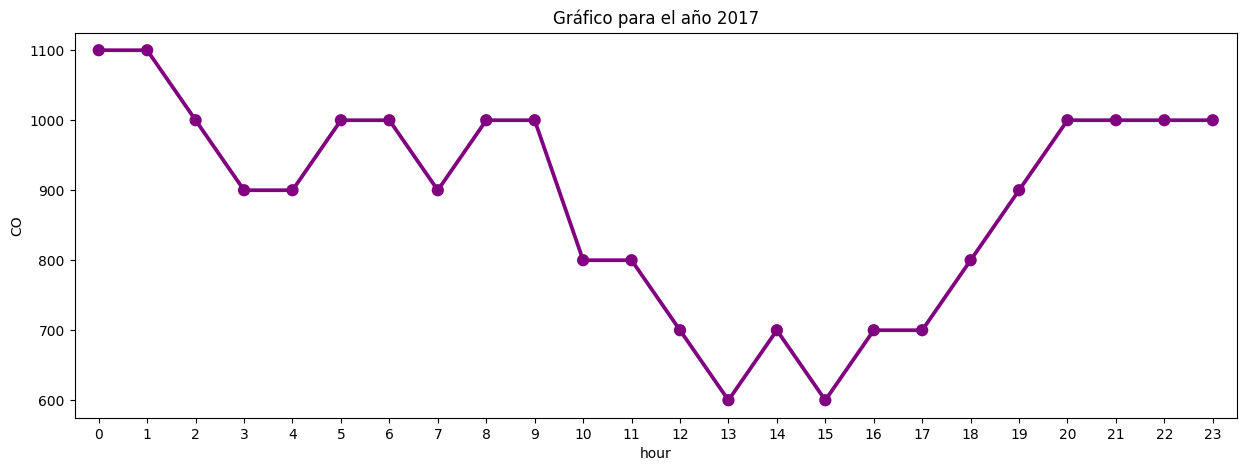

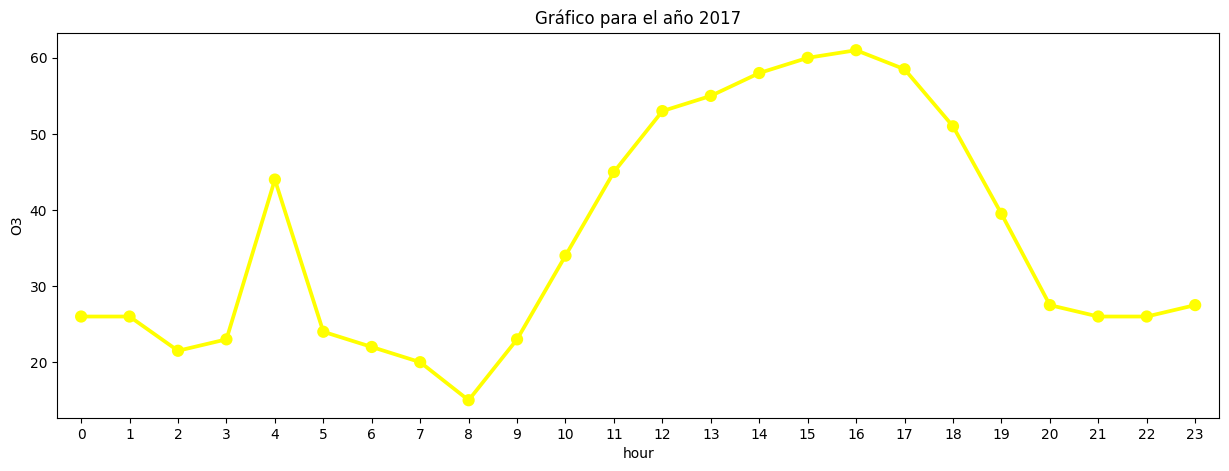

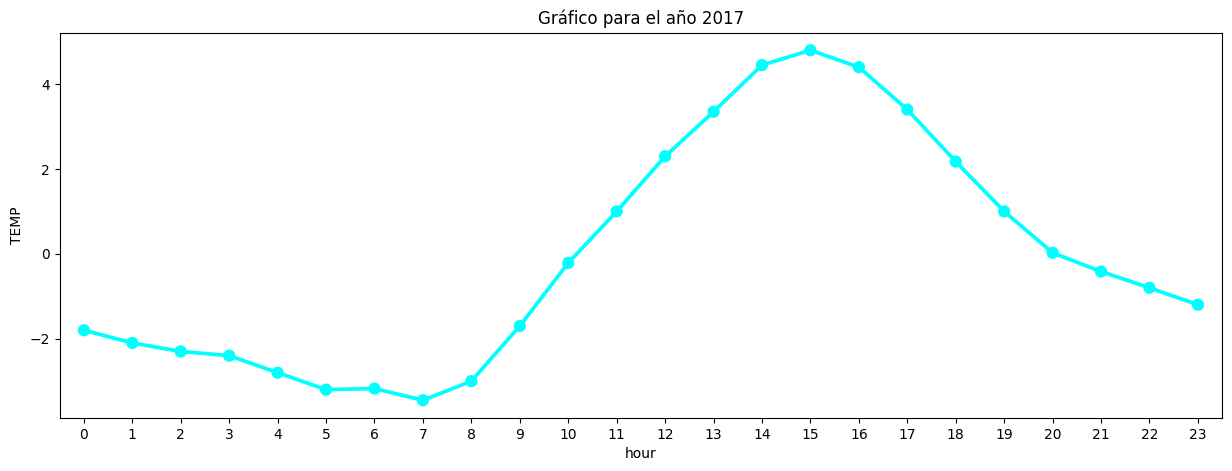

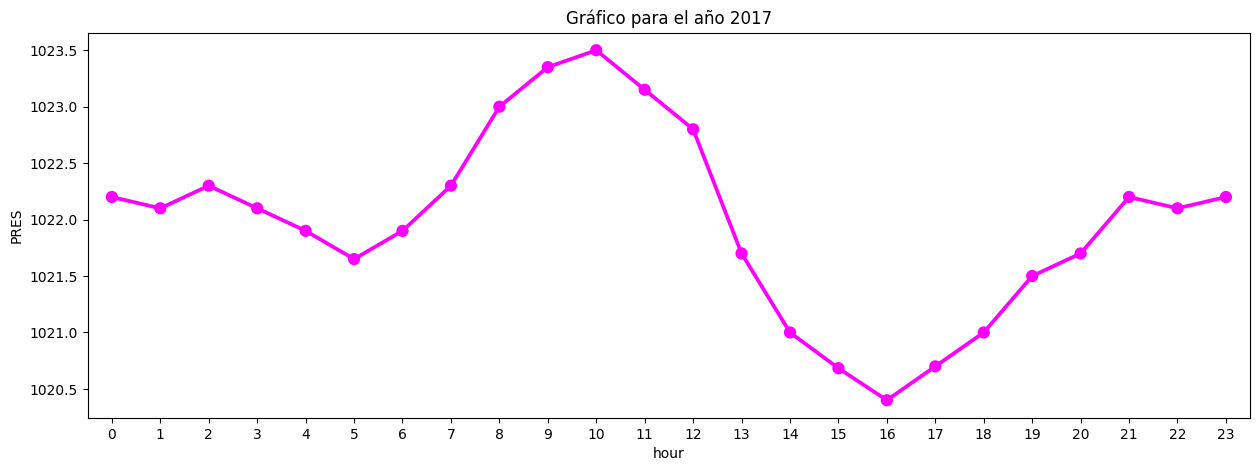

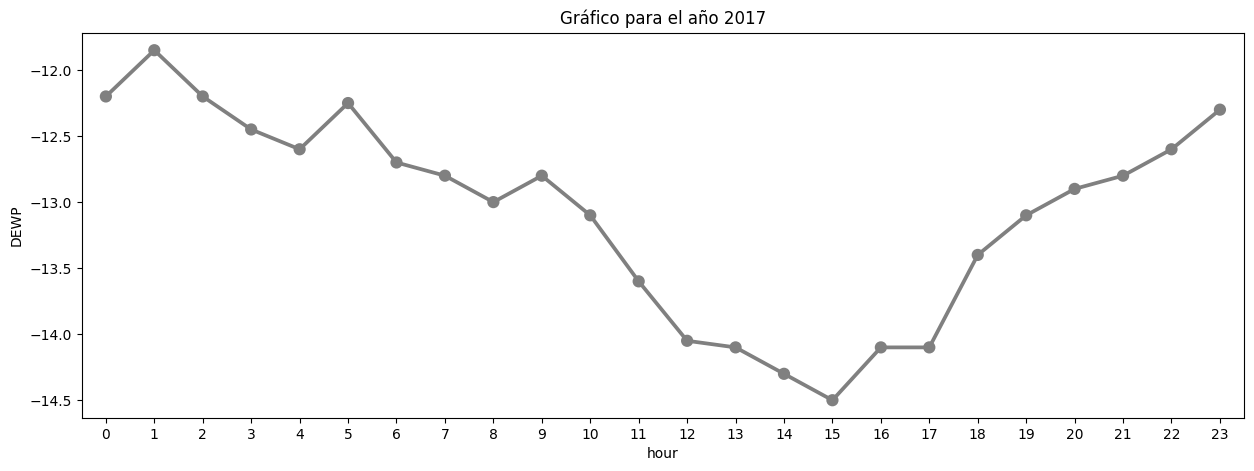

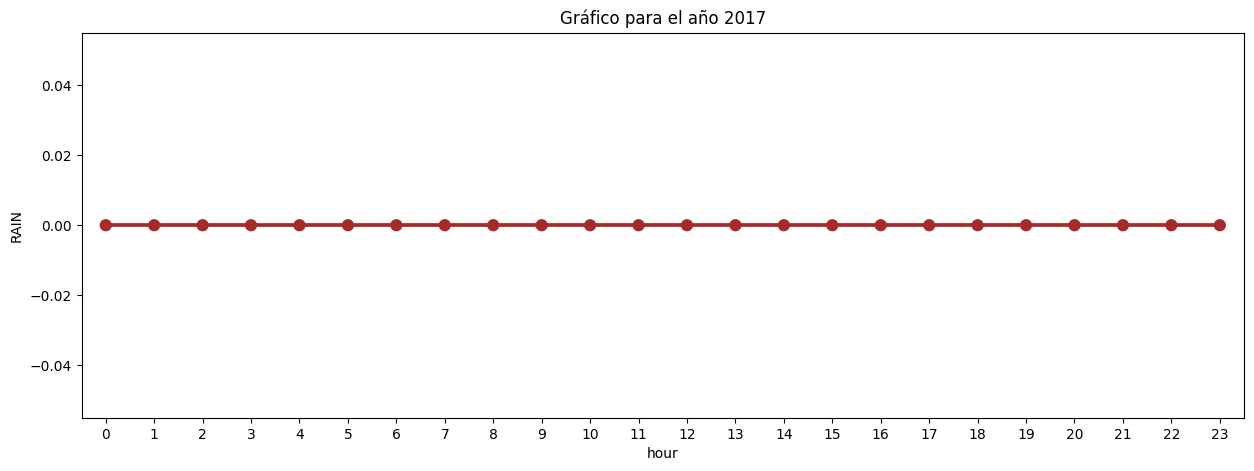

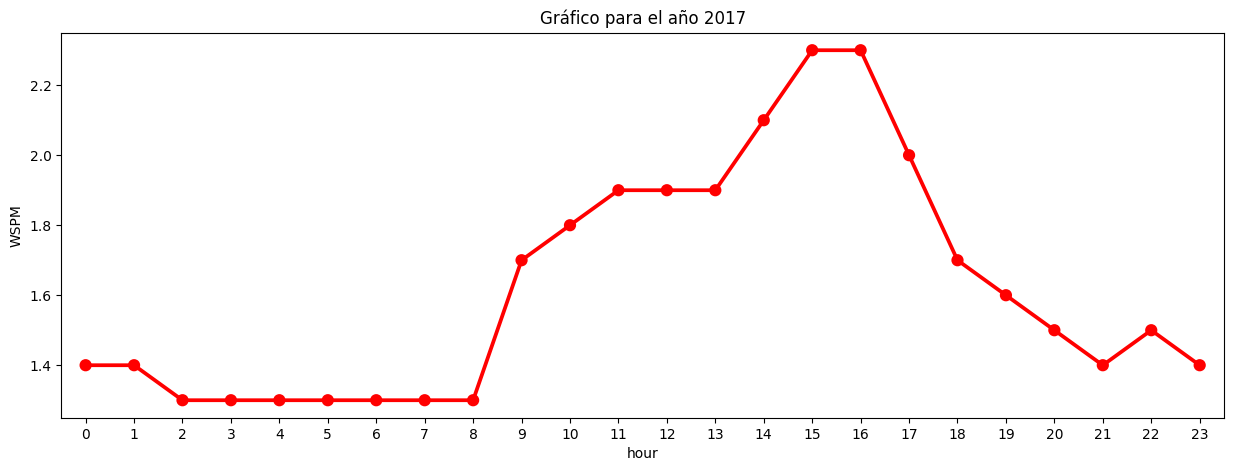

In [147]:
year = 2017

df_year = df[df['year']==year]
for i, colum in enumerate(columns_all):
    df_aux = df_year[[colum,'hour']].groupby(["hour"]).median().reset_index().sort_values(by='hour',ascending=False)
    f,ax=plt.subplots(figsize=(15,5))
    sns.pointplot(x='hour', y=str(colum), data=df_aux, markers='o', color=colors[i % len(colors)])
    plt.title(f'Gráfico para el año {year}')

## Análisis de Contaminantes en día de la semana

In [148]:
df['date']=pd.to_datetime(df[['year', 'month', 'day']])

In [149]:
def day_name(date): 
    dayname = calendar.day_name[date.weekday()]
    return dayname

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 20 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   No       420768 non-null  int64         
 1   year     420768 non-null  int64         
 2   month    420768 non-null  int64         
 3   day      420768 non-null  int64         
 4   hour     420768 non-null  int64         
 5   PM2.5    420768 non-null  float64       
 6   PM10     420768 non-null  float64       
 7   SO2      420768 non-null  float64       
 8   NO2      420768 non-null  float64       
 9   CO       420768 non-null  float64       
 10  O3       420768 non-null  float64       
 11  TEMP     420370 non-null  float64       
 12  PRES     420375 non-null  float64       
 13  DEWP     420365 non-null  float64       
 14  RAIN     420378 non-null  float64       
 15  wd       418946 non-null  object        
 16  WSPM     420450 non-null  float64       
 17  station  420768 

In [151]:
df['day_week'] = df['date'].apply(lambda x: day_name(x))
df.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO  ...  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  ...  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  ...  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  ...  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  ...  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  ...  -2.0   

     PRES  DEWP  RAIN   wd WSPM       station               AQI       date  \
0  1023.0 -18.8   0.0  NNW  4.4  Aotizhongxin  Heavily Polluted 2013-03-01   
1  1023.2 -18.2   0.0    N  4.7  Aotizhongxin  Heavily Polluted 2013-03-01   
2  1023.5 -18.2   0.0  NNW  5.6  Aotizhongxin  Heavily Polluted 2013-03-01   
3  1024.5 -19.4   0.0   NW  3.1  Aotizhongxin  Heavily Polluted 2013-03-01   
4  1025.2 -19.5   0.0    N  2.0  Aotizhongxin  Heavily Polluted 2013-03-01   

  day_week  
0   Friday  
1   Friday  
2   Friday  
3   Friday  
4   Friday  

[5 rows x 21 columns]

In [152]:
days = {'Monday':0, 'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6}

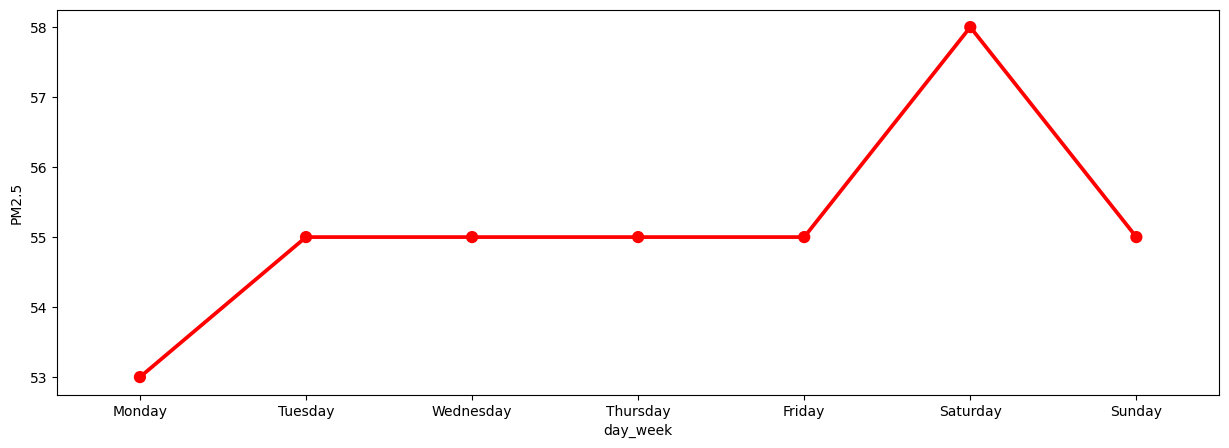

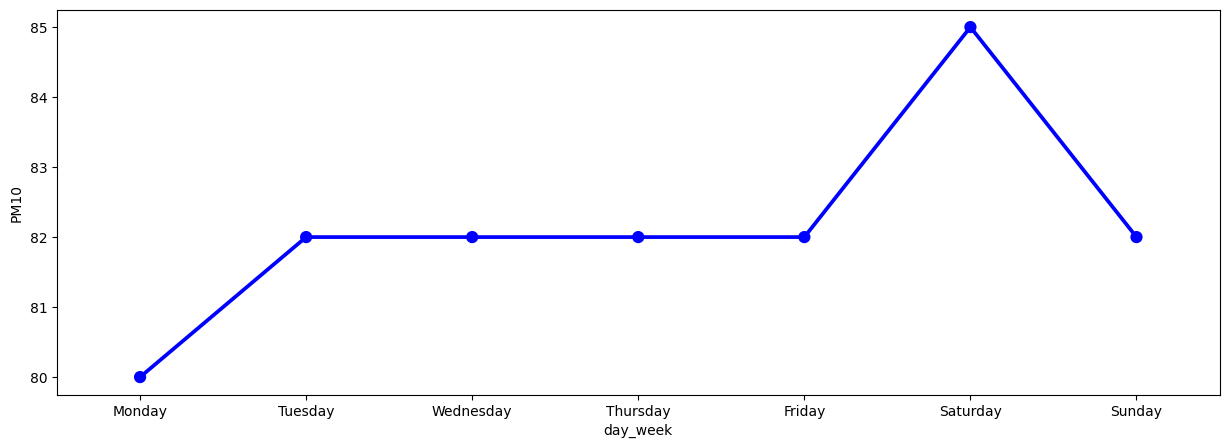

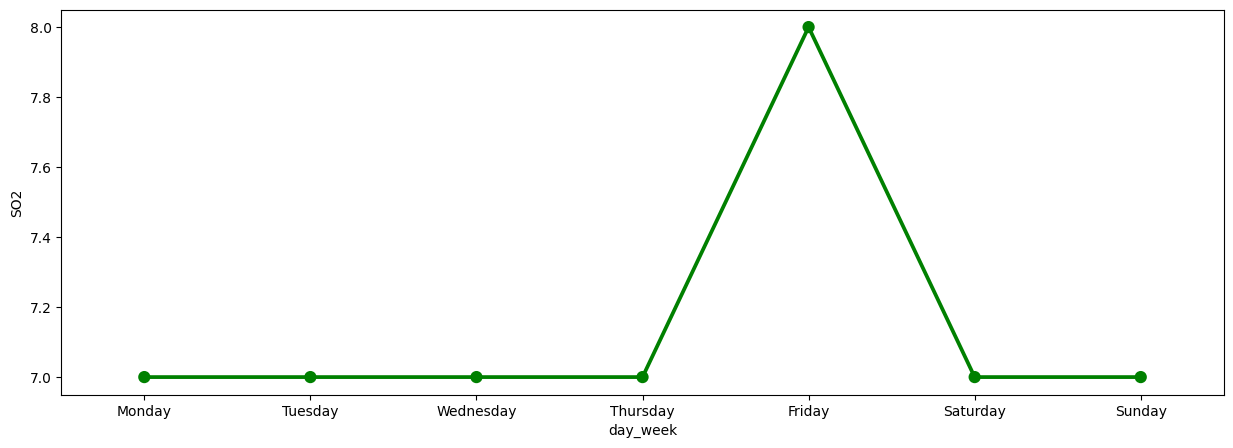

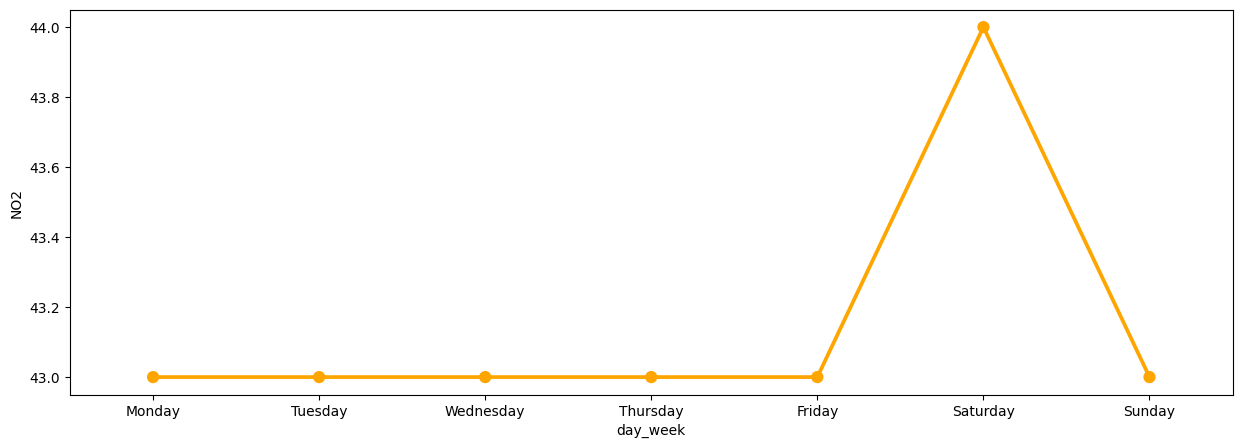

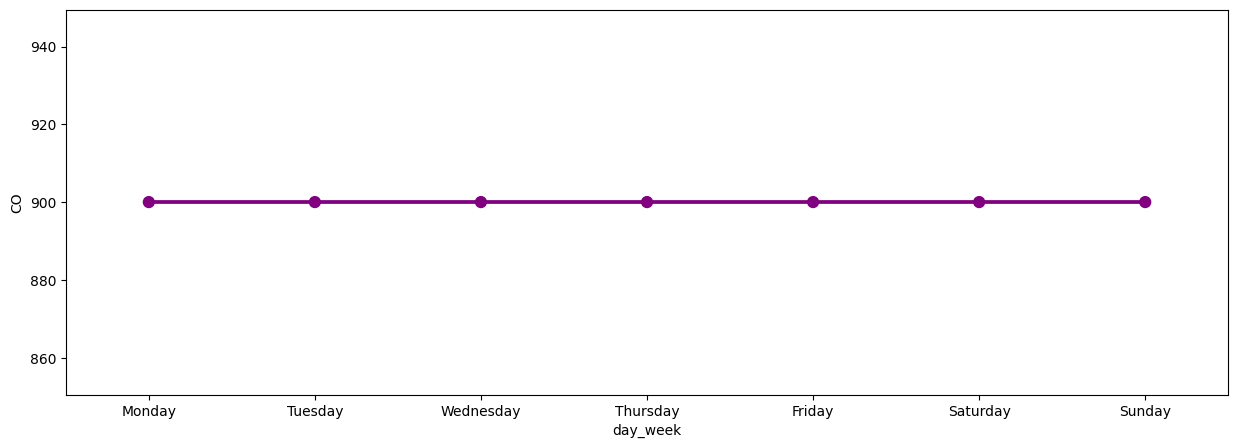

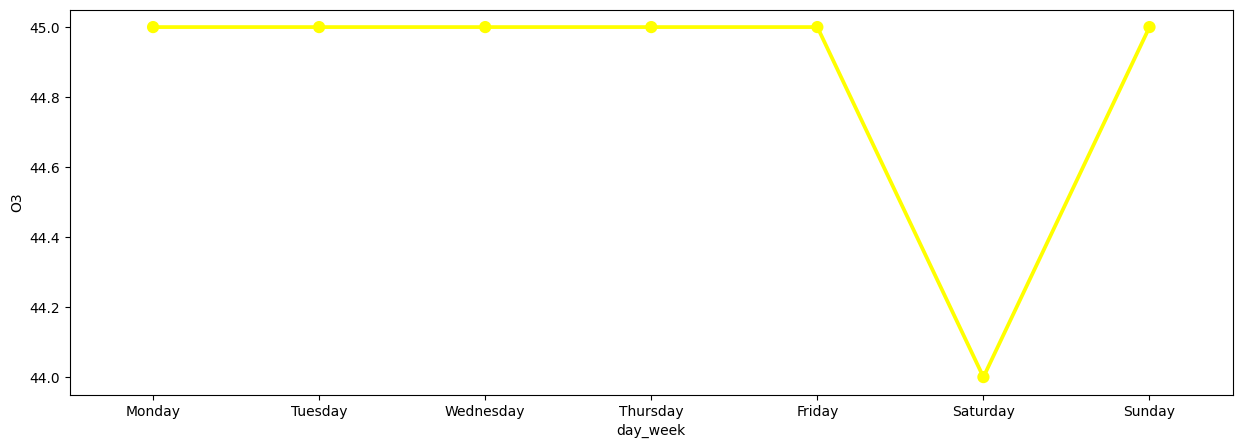

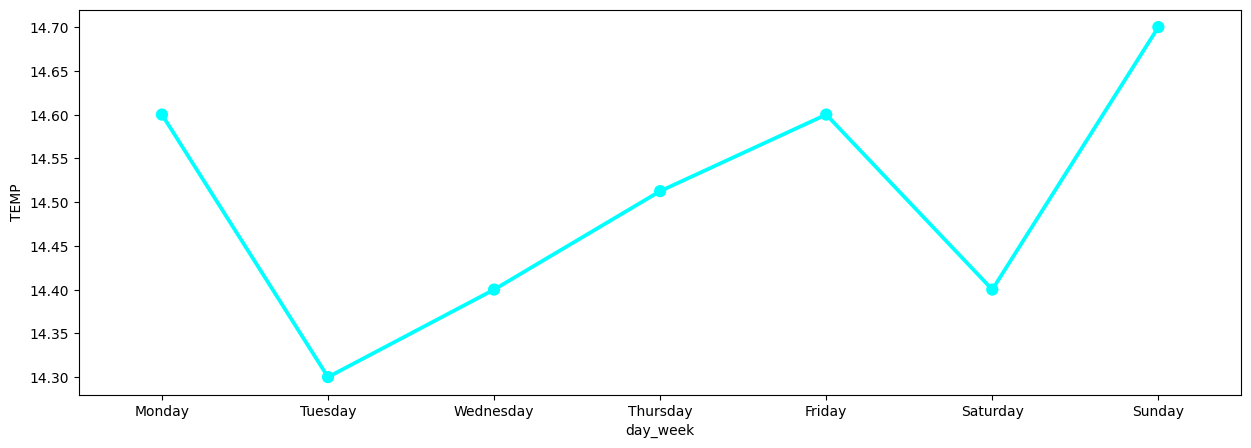

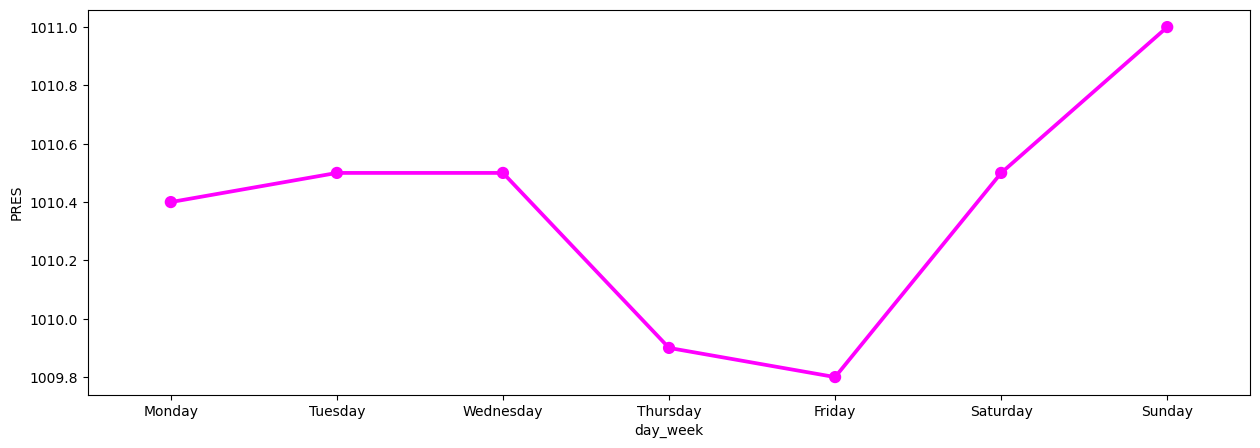

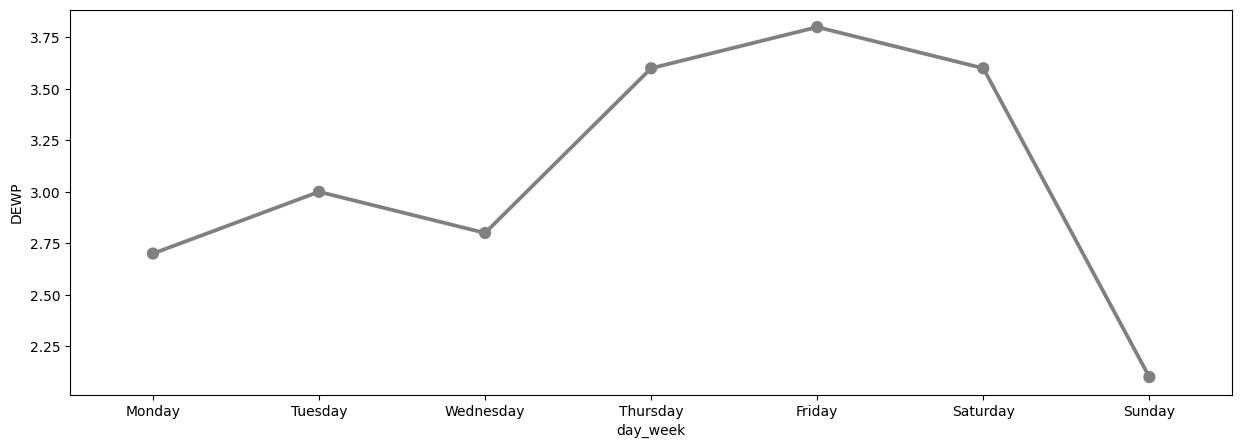

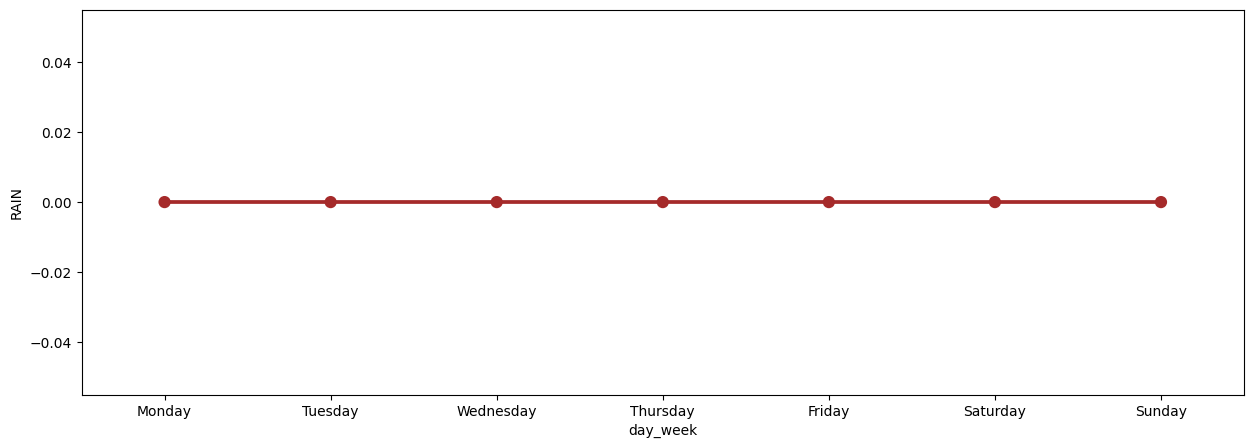

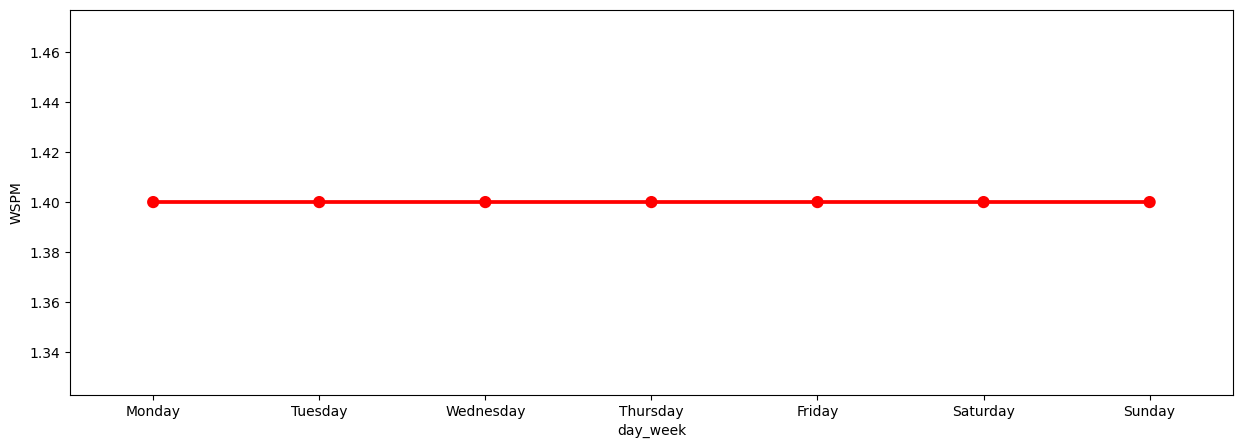

In [153]:
for i, colum in enumerate(columns_all):
    df_aux = df[[colum,'day_week']].groupby(["day_week"]).median().reset_index().sort_values(by='day_week',ascending=True)
    df_aux = df_aux.iloc[df_aux['day_week'].map(days).argsort()]
    f,ax=plt.subplots(figsize=(15,5))
    sns.pointplot(x='day_week', y=str(colum), data=df_aux, markers='o', color=colors[i % len(colors)])

## Diagramas Caja y Bigote

<Axes: xlabel='station', ylabel='SO2'>

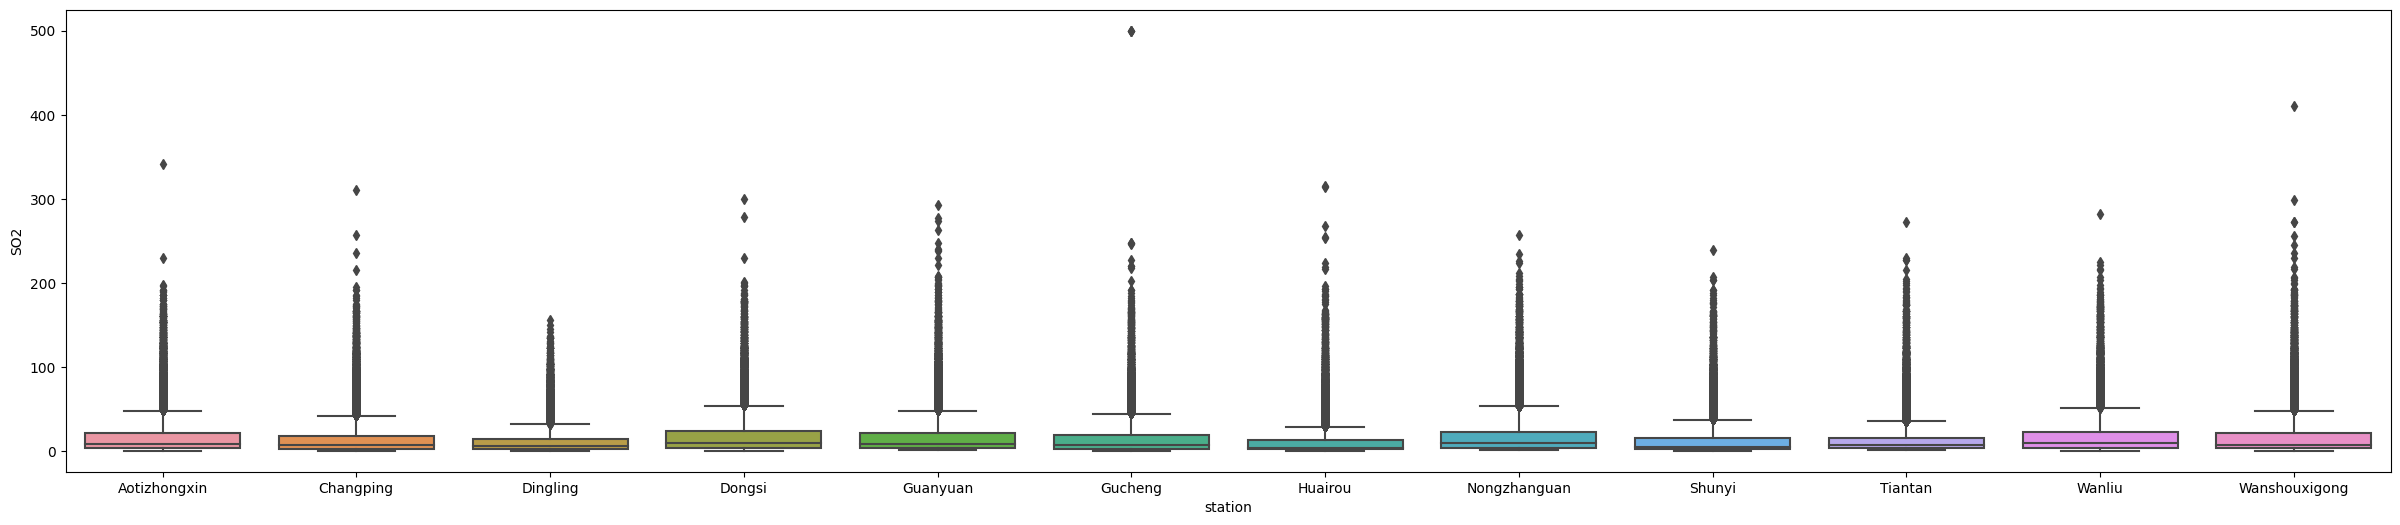

In [154]:
f = plt.figure(figsize=(30,6))
sns.boxplot(x='station', y='SO2', data=df.dropna(axis=0).reset_index())

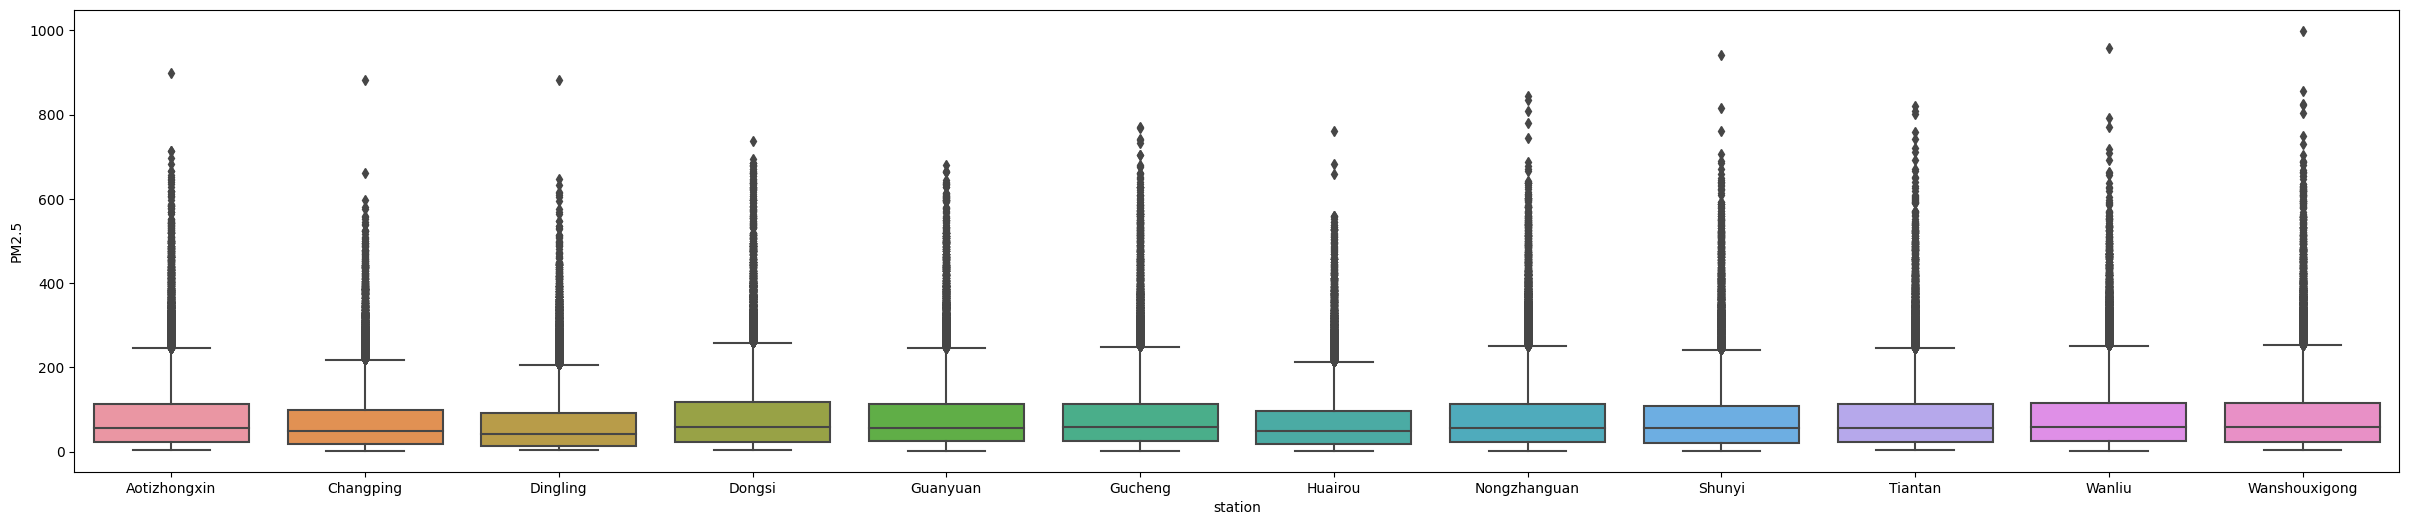

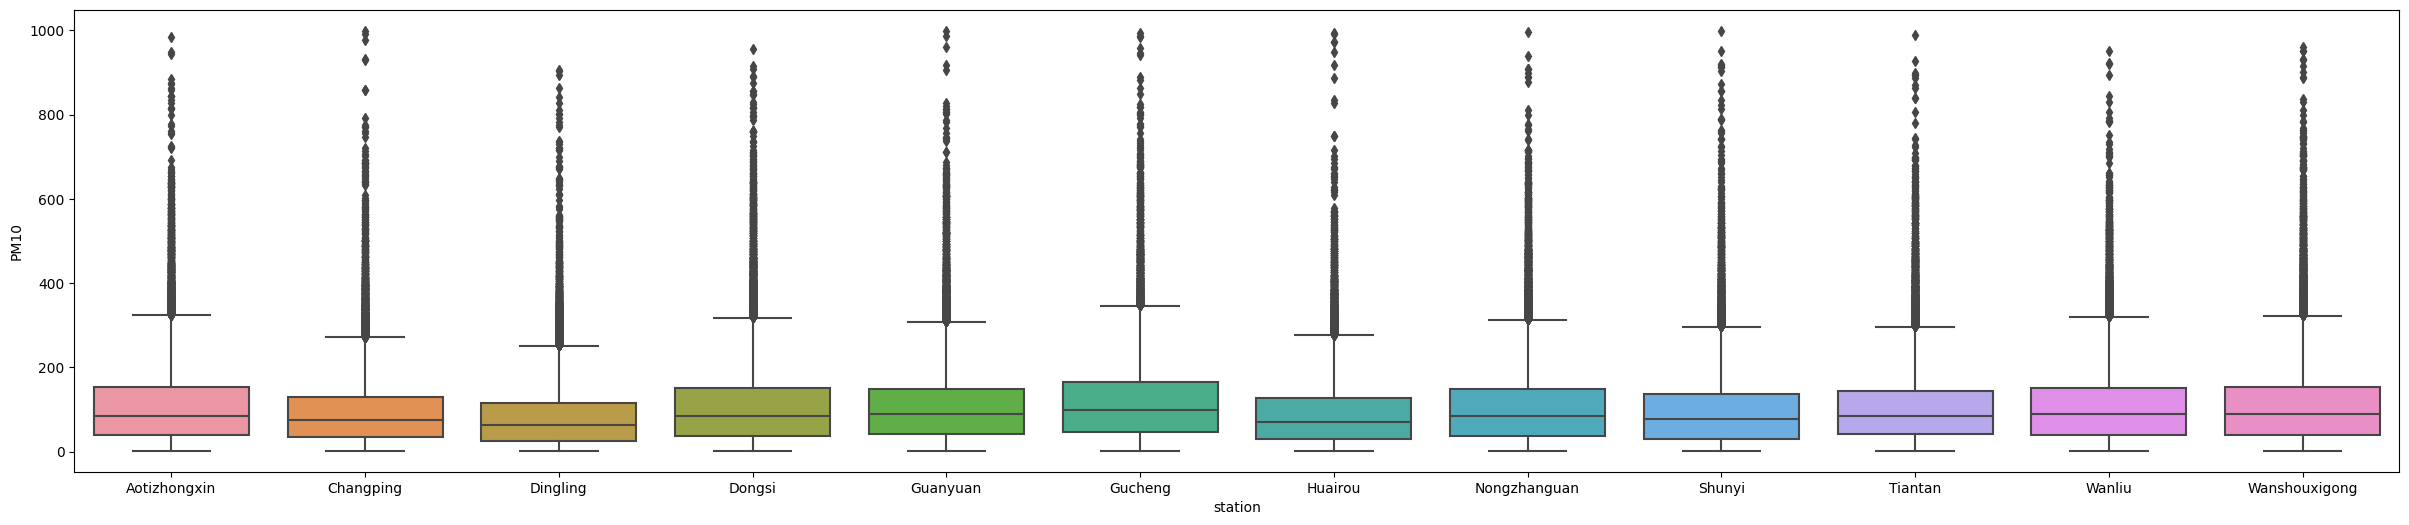

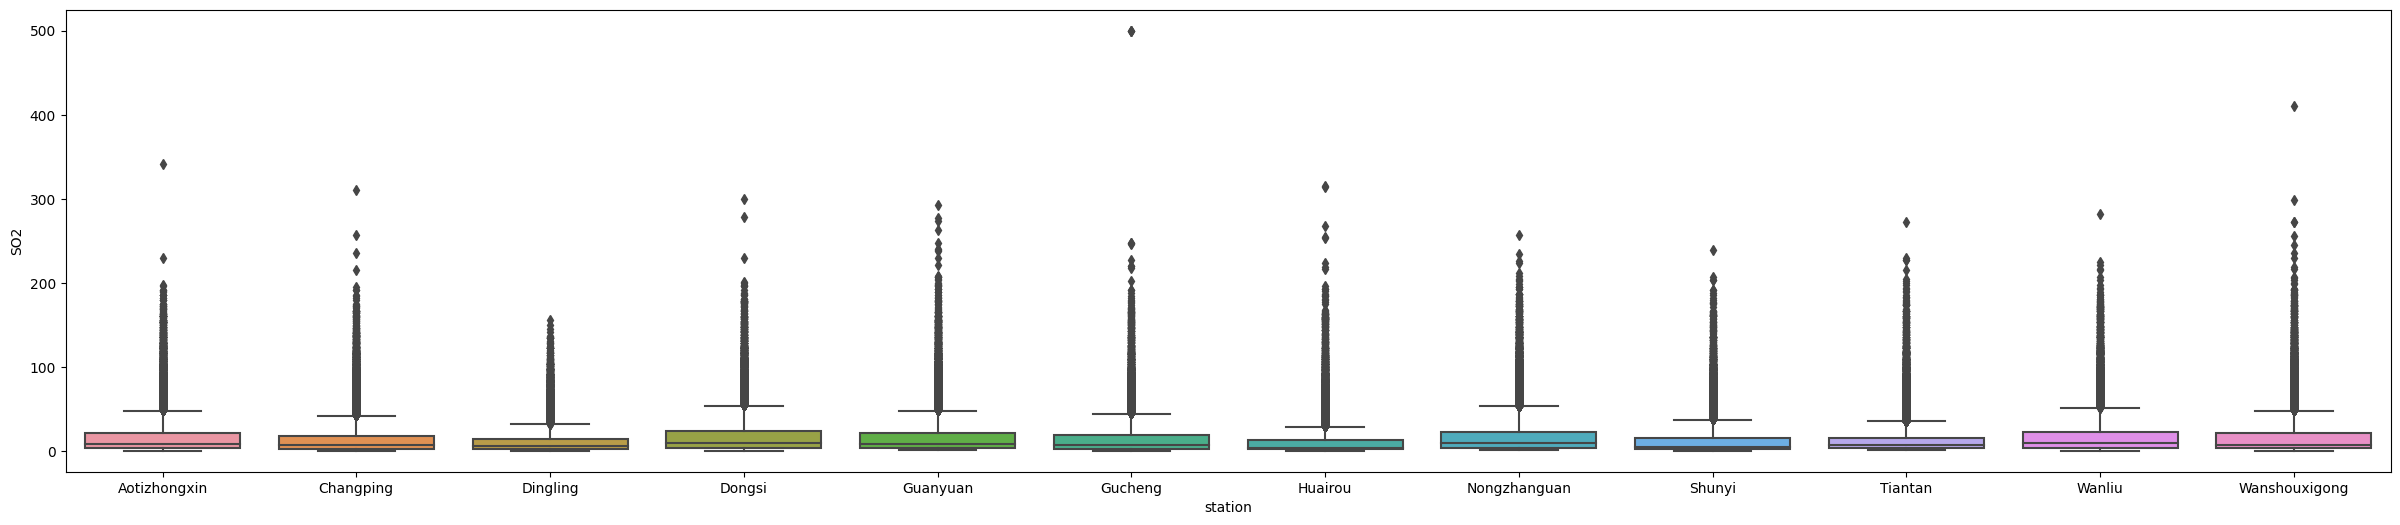

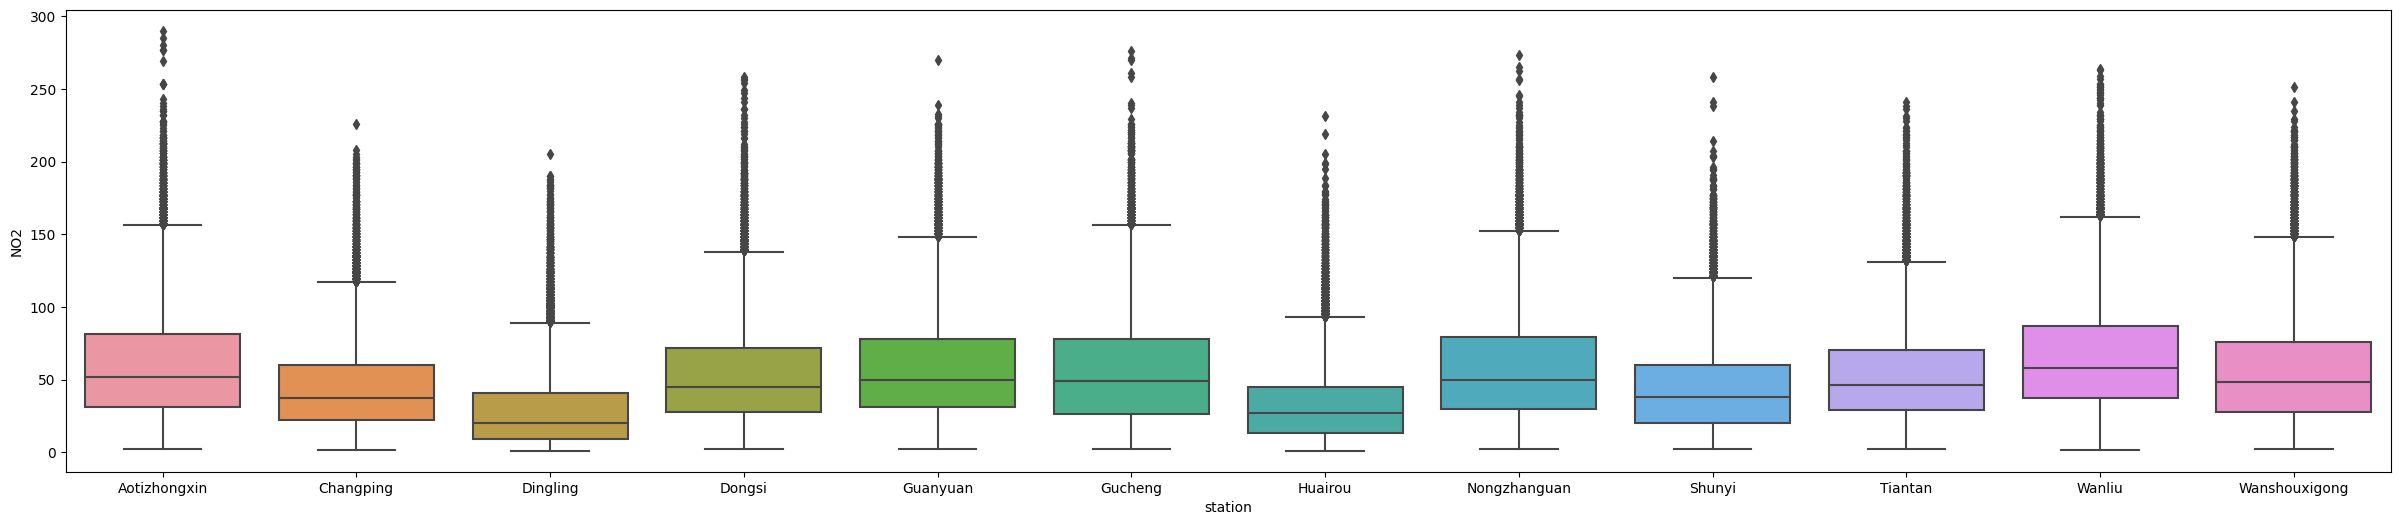

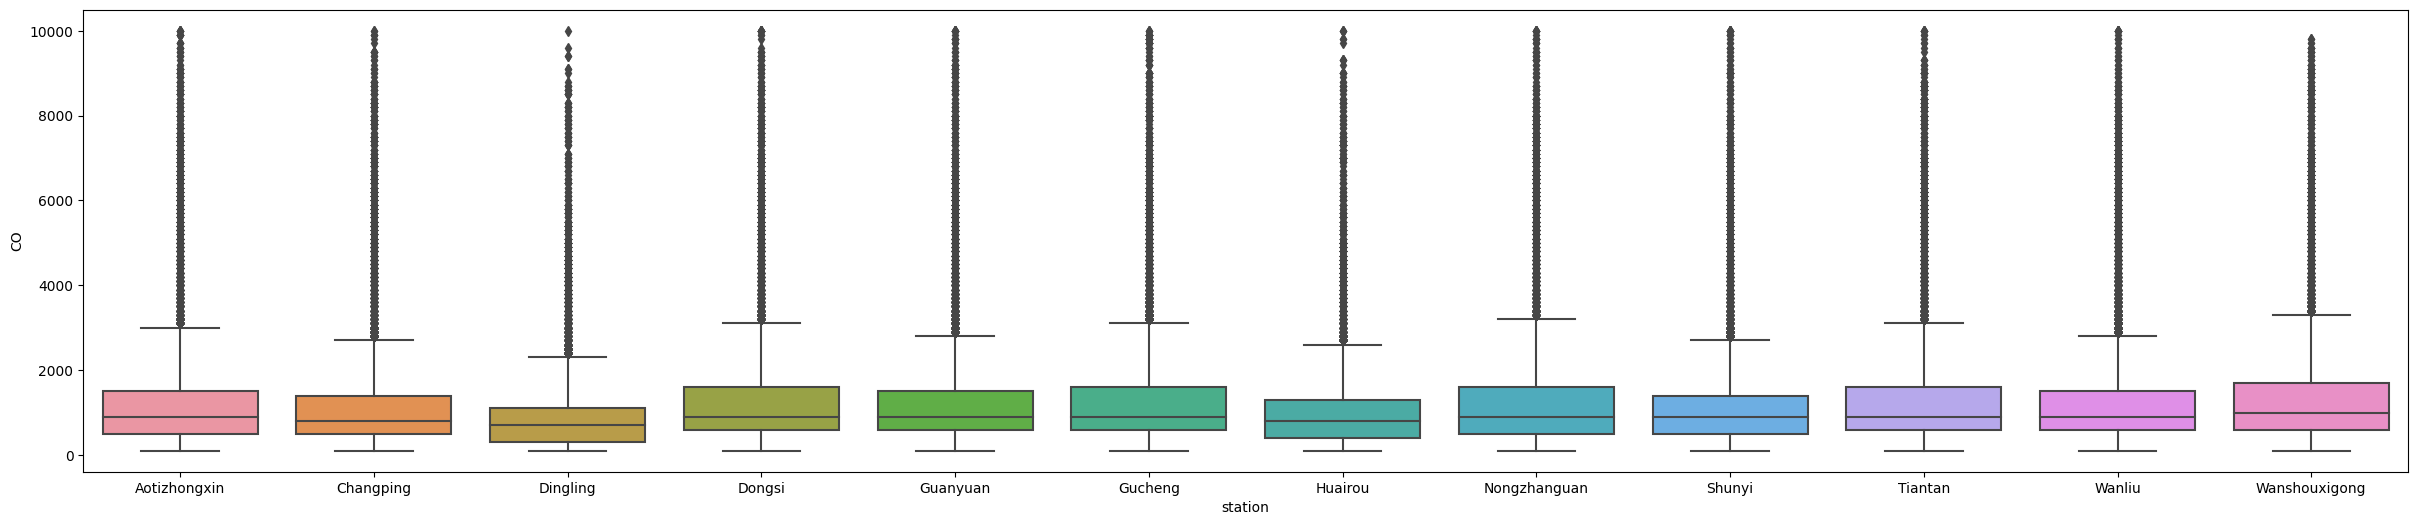

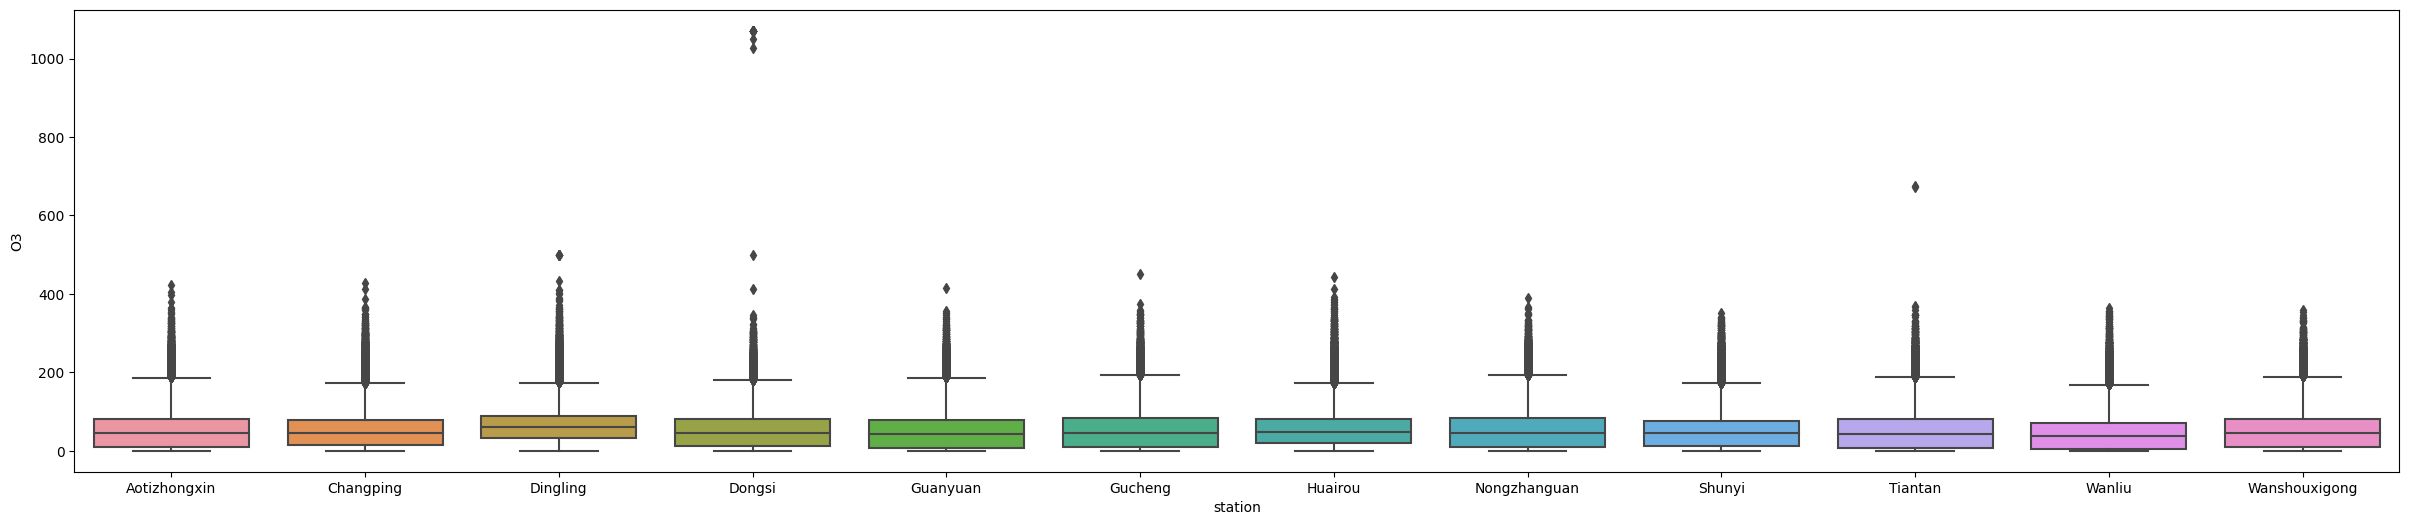

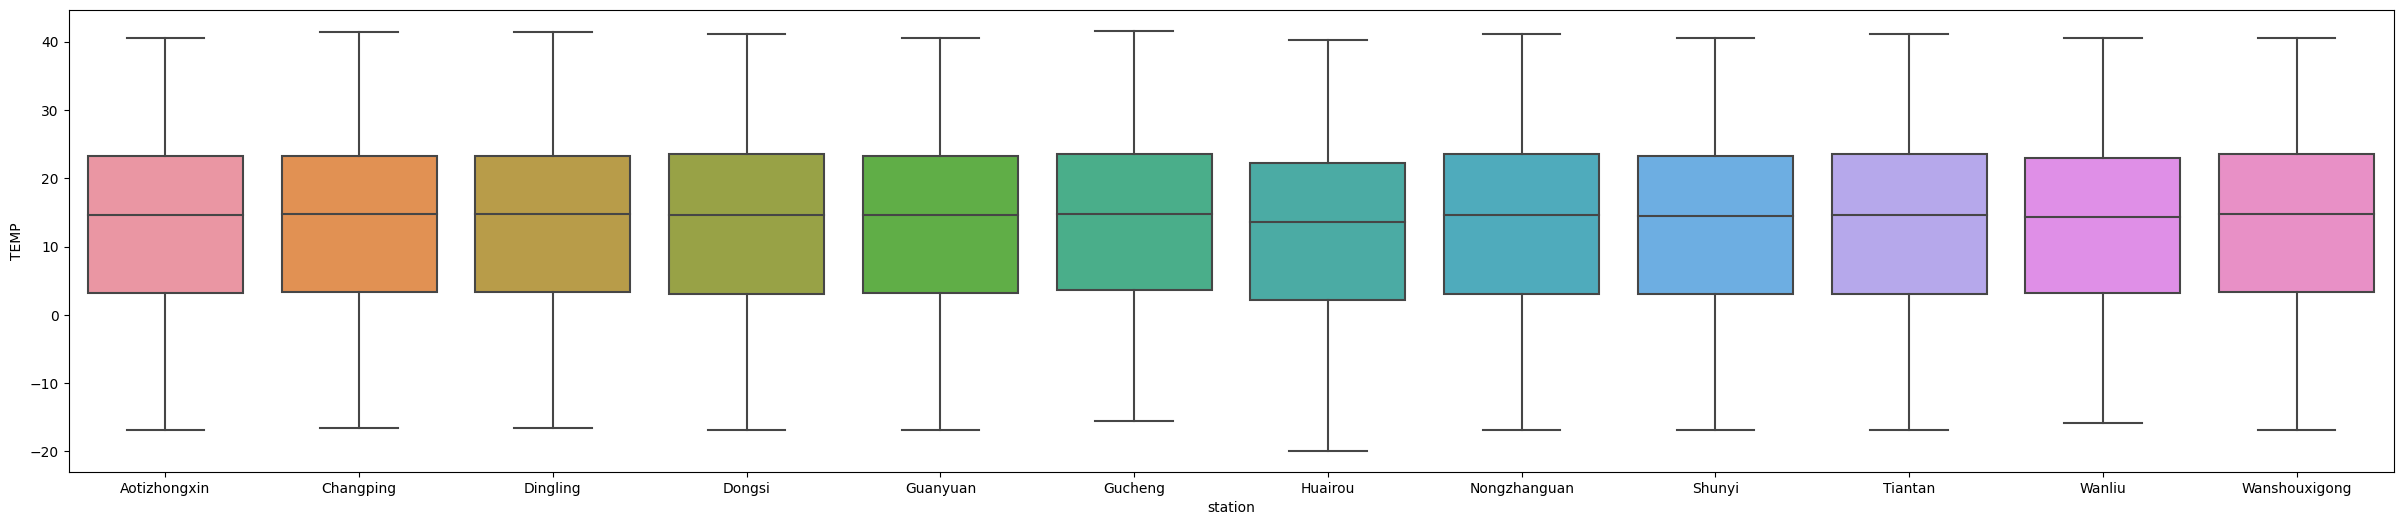

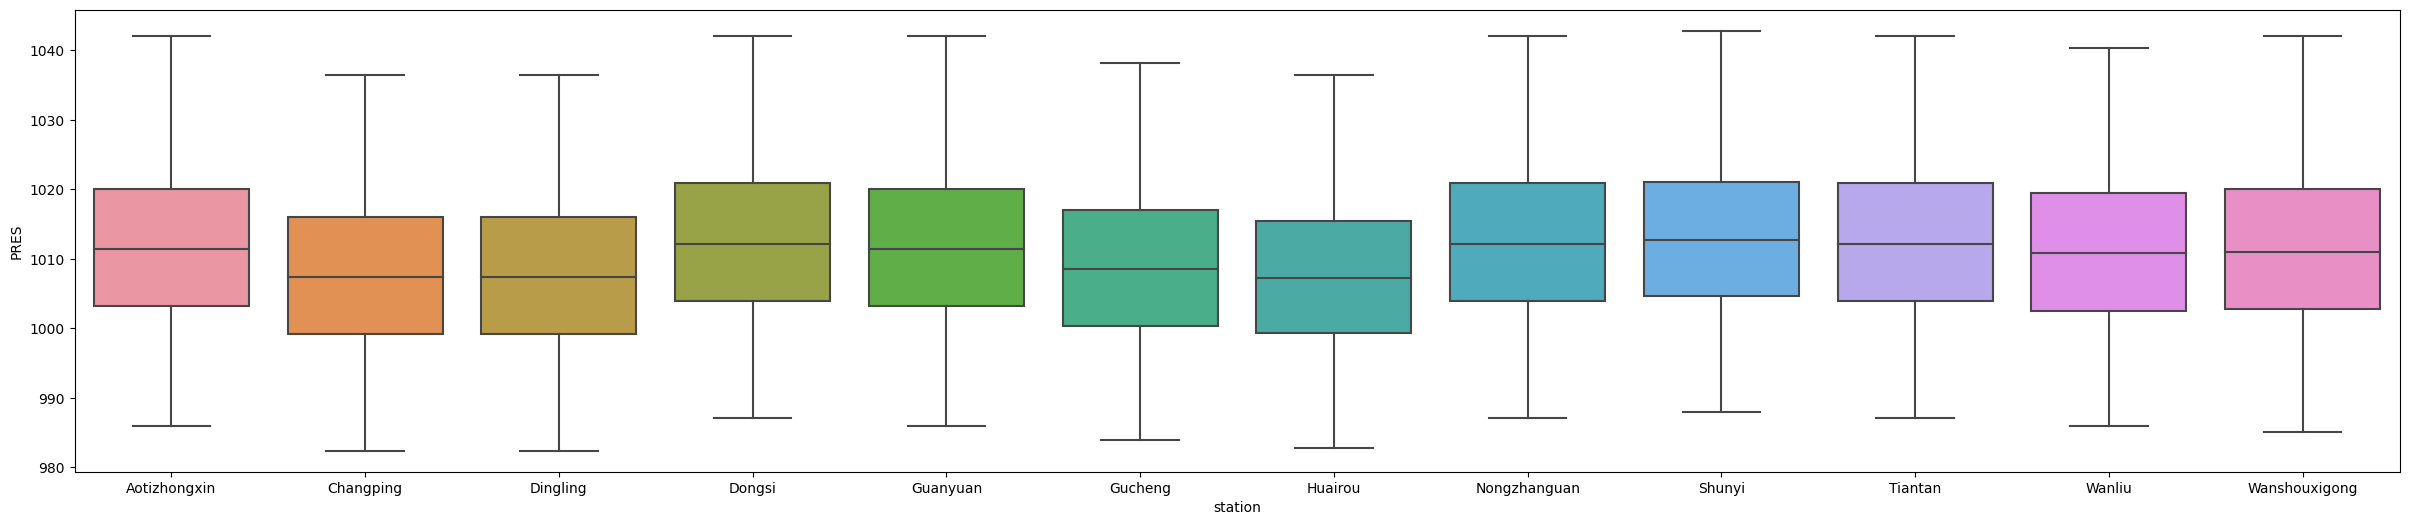

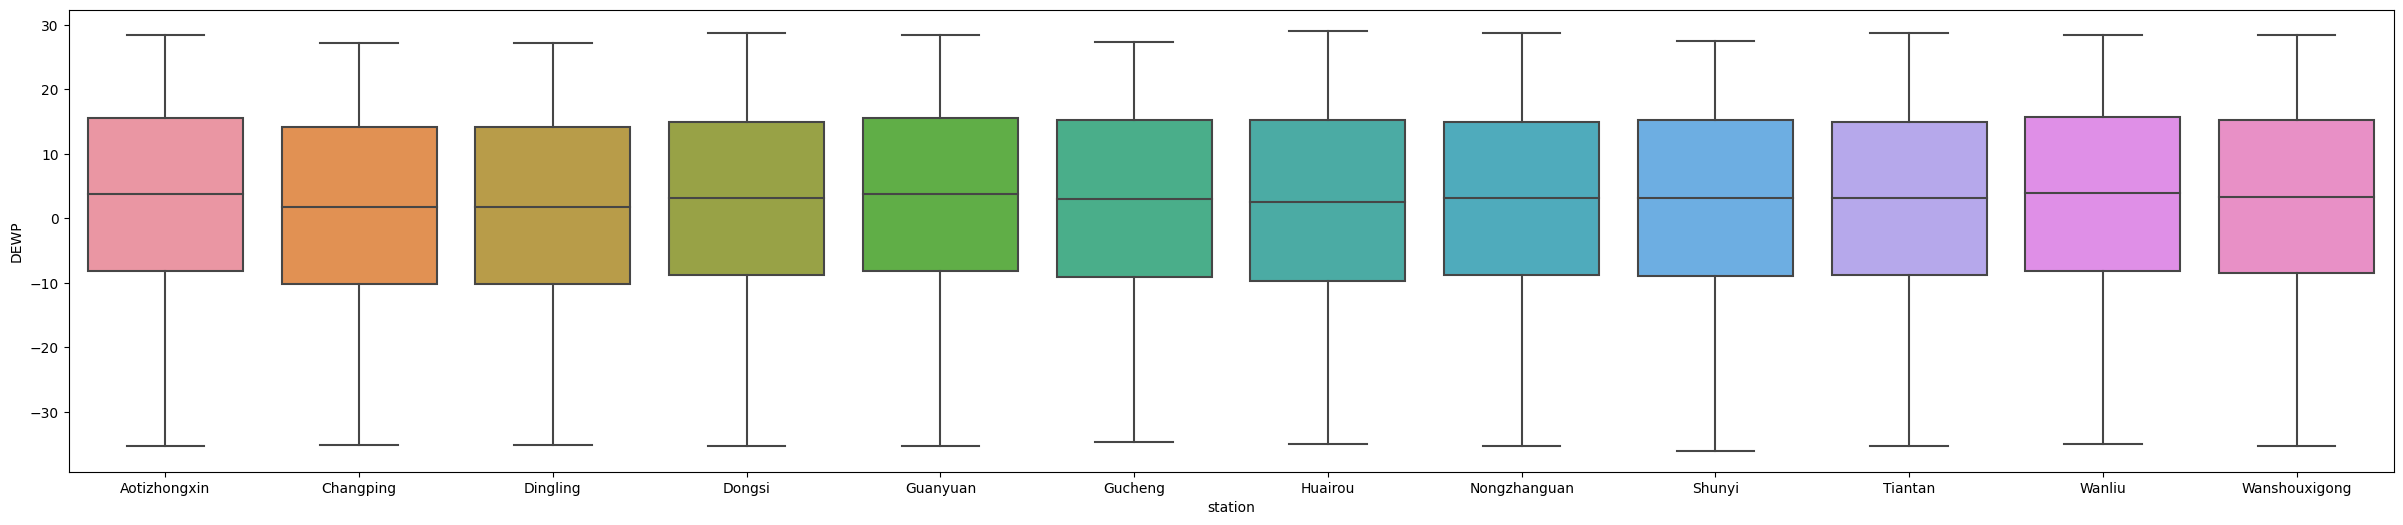

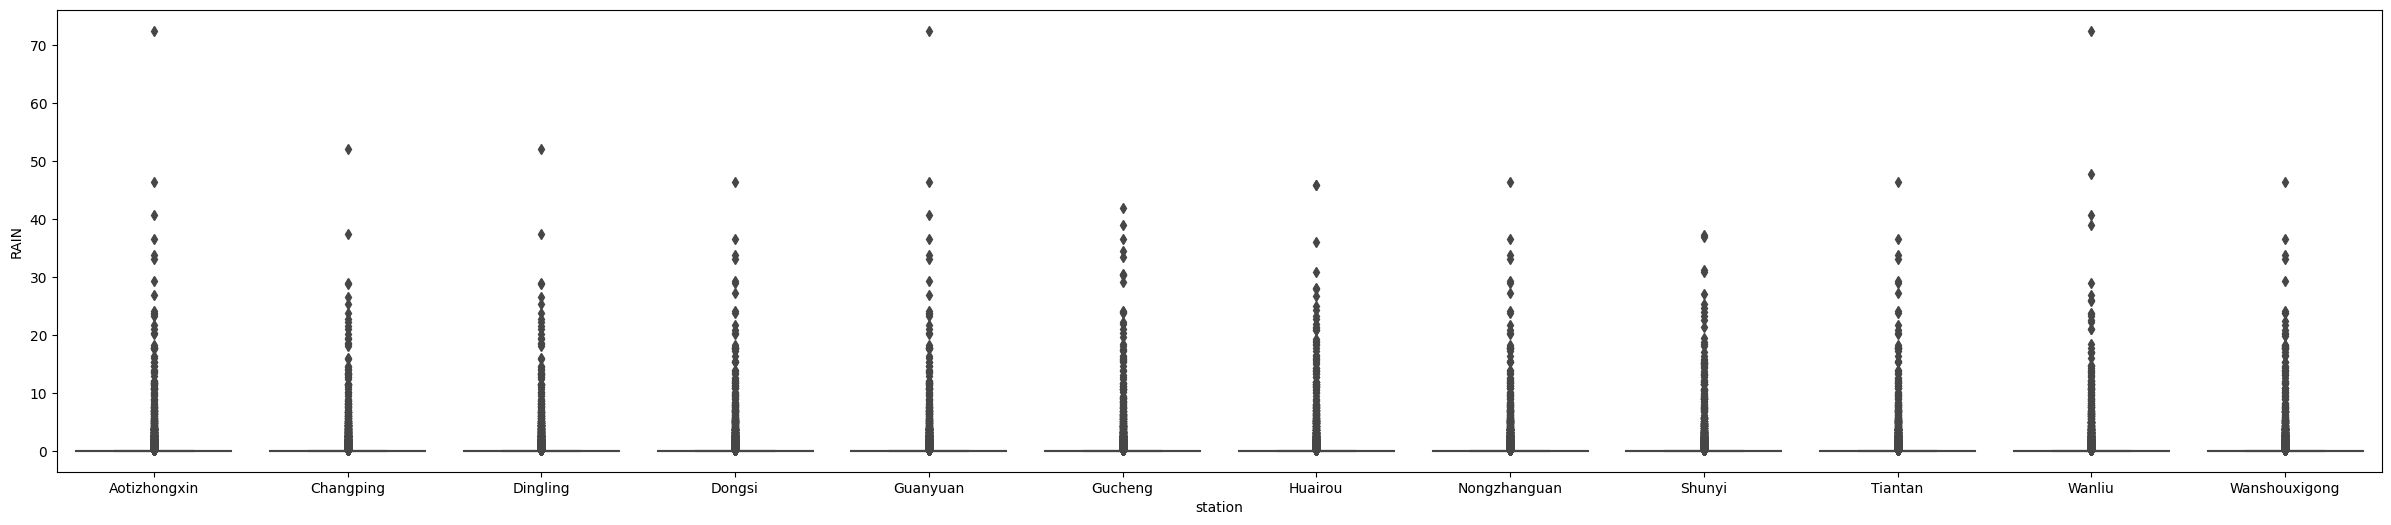

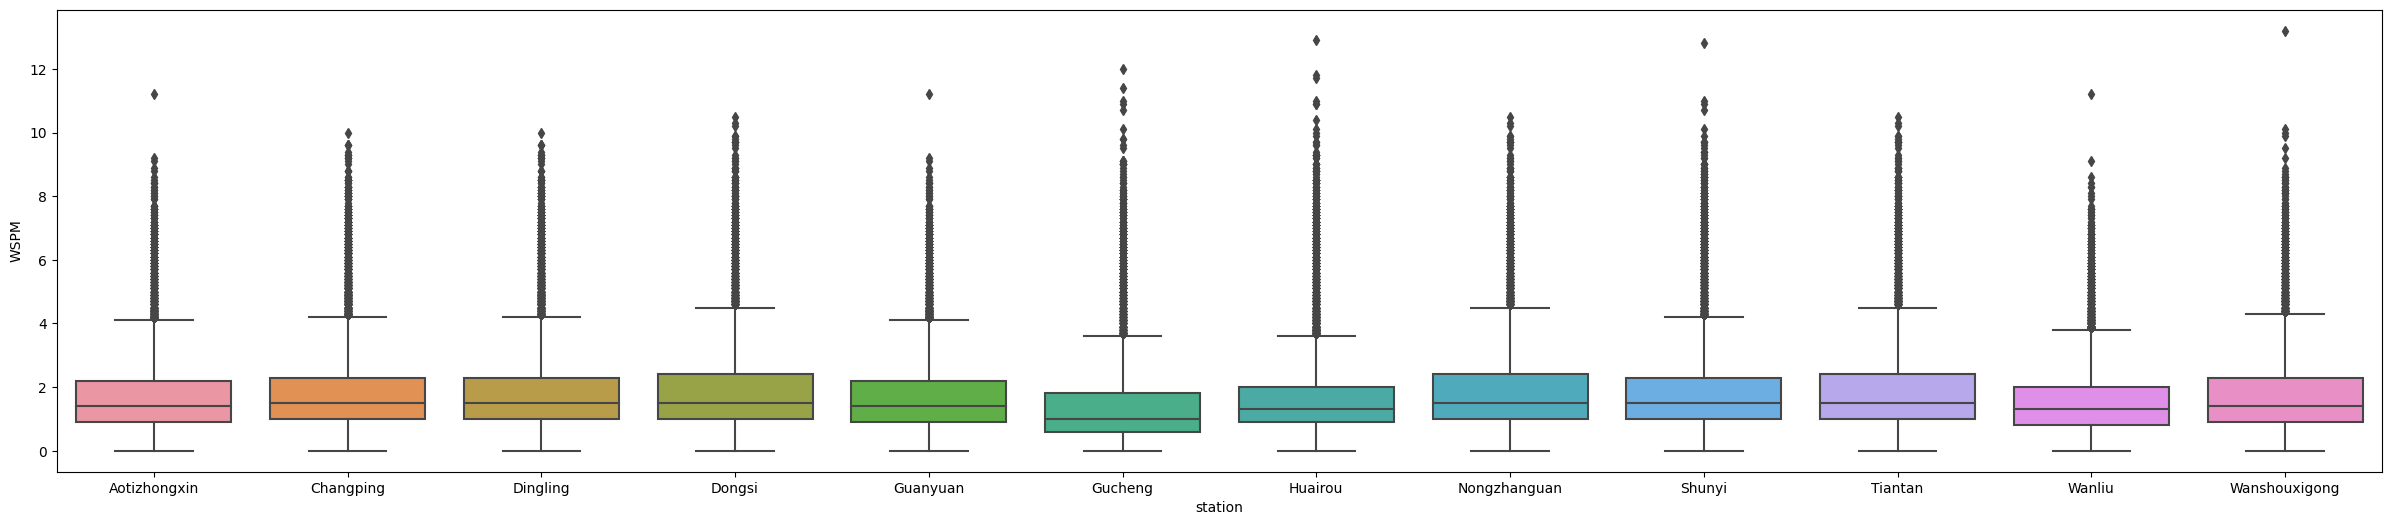

In [155]:
for colum in columns_all:
    f = plt.figure(figsize=(30,6))
    sns.boxplot(x='station', y=str(colum), data=df.dropna(axis=0).reset_index())

In [ ]:
tiempo_fin = time.time()
duracion = tiempo_fin - tiempo_inicio

print("Duración:", duracion, "segundos")
print("Duración:", duracion//60, "minutos")